<a href="https://colab.research.google.com/github/michael-olufemi/bulk_transcriptome/blob/main/norm_of_ScanPy_Test_for_GTEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installs

In [ ]:
!pip install scanpy

     |████████████████████████████████| 10.3MB 5.5MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 122kB 35.2MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 1.2MB 45.5MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp37-none-any.whl size=7012 sha256=ec22a47a4357aa98648aa845581a85b2416e10daf4086d3f3e347b581e6fd1d9
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=92b04b3846bedf6a3fe84998b274376454562f9919ef6b45173e21dcff7a3f39
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=aab10b0e13d9837829635bde6dcac3b26de8cc0501060ddb6abca

In [ ]:
!pip3 install leidenalg

     |████████████████████████████████| 2.4MB 5.7MB/s 
     |████████████████████████████████| 3.2MB 23.4MB/s 


In [ ]:
!pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68502 sha256=4ae86be7340d741fd9639094d000afcb1d1e1a46c97f3941c9797dfdf6d531f8
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


# Imports

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn-paper')

In [ ]:
styles = ['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.9.1 leidenalg==0.8.3


In [ ]:
data = 'https://github.com/josoga2/dataset-repos/blob/main/finOutput.txt?raw=true'
lnc = pd.read_csv(data, index_col='transcript_id')
lnc = lnc.drop('lncRNA', axis=1)
lnc.head(1)

,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2726-SM-5H12C,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3026-SM-5N9CA,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-0011-R10a-SM-DO941,GTEX-1192X-0011-R5a-SM-DNZZA,GTEX-1192X-0011-R6a-SM-DNZZB,GTEX-1192X-0011-R7b-SM-DNZZC,GTEX-1192X-0011-R8b-SM-DO11U,GTEX-1192X-0011-R9b-SM-DO934,GTEX-1192X-3126-SM-5N9BY,GTEX-1192X-3226-SM-5987D,GTEX-11DXW-0011-R1a-SM-DNZZD,GTEX-11DXW-0011-R3b-SM-DNZZE,GTEX-11DXW-0011-R5b-SM-DO11D,GTEX-11DXW-0011-R6a-SM-DO11N,GTEX-11DXW-0011-R7b-SM-DO119,GTEX-11DXW-1026-SM-5H11K,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-0011-R10b-SM-DO12C,GTEX-11DXY-0011-R11a-SM-DNZZN,GTEX-11DXY-0011-R5b-SM-DNZZL,GTEX-11DXY-0011-R6a-SM-DNZZF,GTEX-11DXY-0011-R7a-SM-DO11L,GTEX-11DXY-0011-R8a-SM-DO11M,GTEX-11DXY-3126-SM-5N9BT,GTEX-11DXY-3226-SM-5GIDE,GTEX-11DYG-0011-R10b-SM-DNZZO,GTEX-11DYG-0011-R11a-SM-DNZZP,GTEX-11DYG-0011-R5a-SM-DO928,GTEX-11DYG-0011-R6a-SM-DO936,GTEX-11DYG-0011-R7b-SM-EXUS6,GTEX-11DYG-0011-R8a-SM-DO93F,GTEX-11DYG-2926-SM-5H132,GTEX-11DZ1-0011-R10b-SM-DO943,GTEX-11DZ1-0011-R11b-SM-DO11W,GTEX-11DZ1-0011-R2a-SM-DNZZM,...,GTEX-14PJO-0011-R5a-SM-6AJBZ,GTEX-14PJO-0011-R7a-SM-664NR,GTEX-14PJO-0011-R8a-SM-6AJAL,GTEX-14PJO-0011-R9b-SM-62LE9,GTEX-14PJO-2926-SM-686ZI,GTEX-14PN4-0011-R10b-SM-69LP2,GTEX-14PN4-0011-R11a-SM-686ZW,GTEX-14PN4-0011-R1b-SM-69LP8,GTEX-14PN4-0011-R2a-SM-6EU2Y,GTEX-14PN4-0011-R3b-SM-686ZU,GTEX-14PN4-0011-R4a-SM-686ZT,GTEX-14PN4-0011-R5a-SM-686ZV,GTEX-14PN4-0011-R6b-SM-69LQU,GTEX-14PN4-0011-R7b-SM-69LQQ,GTEX-14PN4-0011-R8a-SM-6EU1H,GTEX-14PN4-0011-R9a-SM-6LLH9,GTEX-14PN4-3026-SM-664O4,GTEX-14PQA-0011-R10a-SM-6AJAA,GTEX-14PQA-0011-R1b-SM-6EU1G,GTEX-14PQA-0011-R3b-SM-69LQO,GTEX-14PQA-0011-R4b-SM-6AJBU,GTEX-14PQA-0011-R5b-SM-6AJC2,GTEX-14PQA-0011-R6b-SM-6AJAM,GTEX-14PQA-0011-R8b-SM-6AJAB,GTEX-15CHQ-0011-R10b-SM-6AJBV,GTEX-15CHQ-0011-R11b-SM-686ZZ,GTEX-15CHQ-0011-R1a-SM-COH27,GTEX-15CHQ-0011-R2b-SM-6AJAD,GTEX-15CHQ-0011-R3b-SM-686ZY,GTEX-15CHQ-0011-R4a-SM-686ZX,GTEX-15CHQ-0011-R5b-SM-6AJAN,GTEX-15CHQ-0011-R6b-SM-69LOX,GTEX-15CHQ-0011-R7b-SM-D4P1Q,GTEX-15CHQ-0011-R8b-SM-CNPO4,GTEX-15CHQ-0011-R9a-SM-6LLHX,GTEX-15DCD-0011-R10b-SM-6LPII,GTEX-15DCD-0011-R11a-SM-D4P1R,GTEX-15DCD-0011-R1b-SM-6LPIJ,GTEX-15DCD-0011-R2b-SM-6LPIE,GTEX-15DCD-0011-R3b-SM-D4P1P
transcript_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENST00000480067.1,0.07,1.01,0.04,0.18,0.17,0.18,0.09,0.08,0.39,0.28,1.1,0.25,1.92,1.27,0.04,0.53,0.13,0.26,0.55,0.59,0.0,0.15,0.08,0.19,0.83,0.33,0.73,0.83,0.07,0.34,0.49,0.16,0.3,1.35,0.39,0.45,0.03,0.14,0.05,0.77,...,0.49,0.53,0.33,3.48,0.31,0.04,0.02,0.22,0.42,0.09,0.4,0.18,0.21,0.28,0.46,1.39,0.19,0.11,1.16,0.19,0.14,0.6,0.13,0.26,0.4,0.18,0.84,1.05,0.56,0.78,0.51,0.08,1.09,0.48,2.22,0.29,0.04,0.36,0.65,0.65


In [ ]:
adata = sc.AnnData(X= lnc)

In [ ]:
adata = adata.T

In [ ]:
adata.var_names_make_unique()

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 19906

# Preprocessing

Selection of highly variable genes per cell

normalizing counts per cell
    finished (0:00:00)


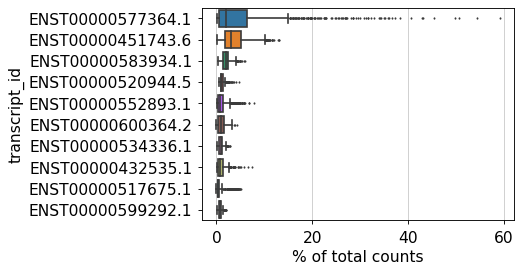

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [ ]:
sc.pp.filter_cells(adata, min_genes=500)

In [ ]:
sc.pp.filter_genes(adata, min_cells=500)

filtered out 14021 genes that are detected in less than 500 cells


In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 5885
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

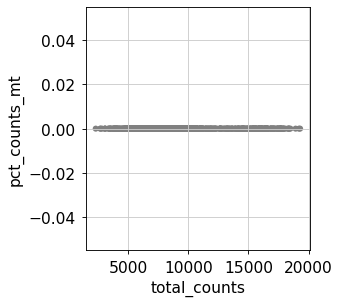

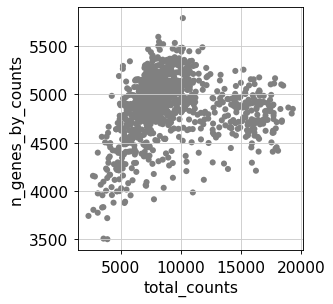

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [ ]:
#Removing unwanted data of interest (mitochondiral genes and bad cells)

#adata = adata[adata.obs.n_genes_by_counts < 20, :]
#adata = adata[adata.obs.pct_counts_mt < 0.01, :]


# Select Highly Variable Data

In [ ]:
#normalize total count data btw 1E0 - 1E4
sc.pp.normalize_total(adata, target_sum=10000)
#log of counts
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [ ]:
import seaborn as sns

In [ ]:
sns.set('paper')

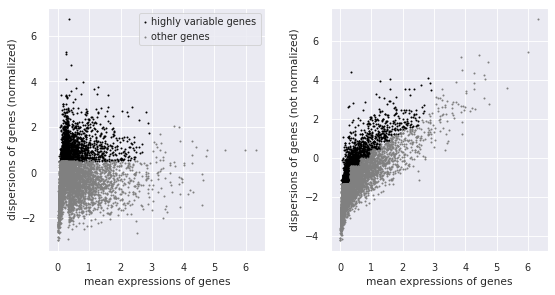

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 5885
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
    finished (0:00:06)


In [ ]:
sc.pp.scale(adata, max_value=10)

# Visualization & Clustering

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


normalizing counts per cell
    finished (0:00:00)


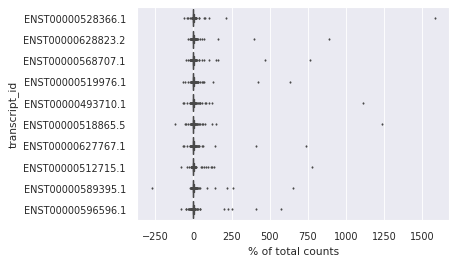

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 1750
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

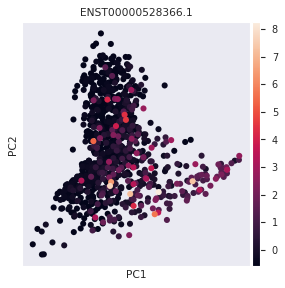

In [ ]:
sc.pl.pca(adata, color=['ENST00000528366.1'])


In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [ ]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


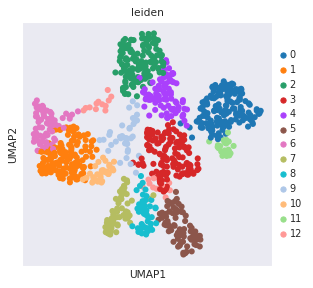

In [ ]:
sc.pl.umap(adata, color=['leiden'], 
           #wspace='0',
           save='figure.png')


In [ ]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:03)


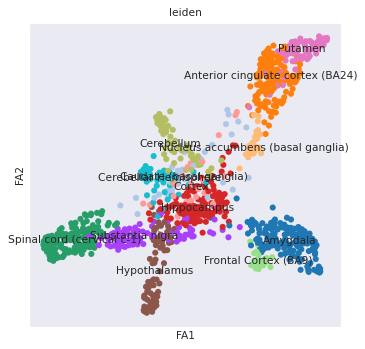

In [ ]:
rcParams['figure.figsize']= 5,5

sc.pl.draw_graph(adata=adata, 
                 color='leiden',
                 legend_loc='on data',
                 legend_fontweight = 'normal',
                 sort_order = True)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


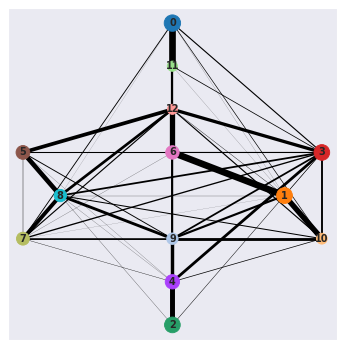

In [ ]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color='leiden', layout='eq_tree', )

In [ ]:
rcParams['figure.figsize']= 10,10

adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden']  == 'Cerebellum')[0]
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color = ['leiden','dpt_pseudotime'], legend_loc='on data', save=True, )

IndexError: ignored

In [ ]:
adata.obs['leiden']

# Using Highly Variable Marker genes to profile individual cells

In [ ]:
adata.write('results_file')

ranking genes
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


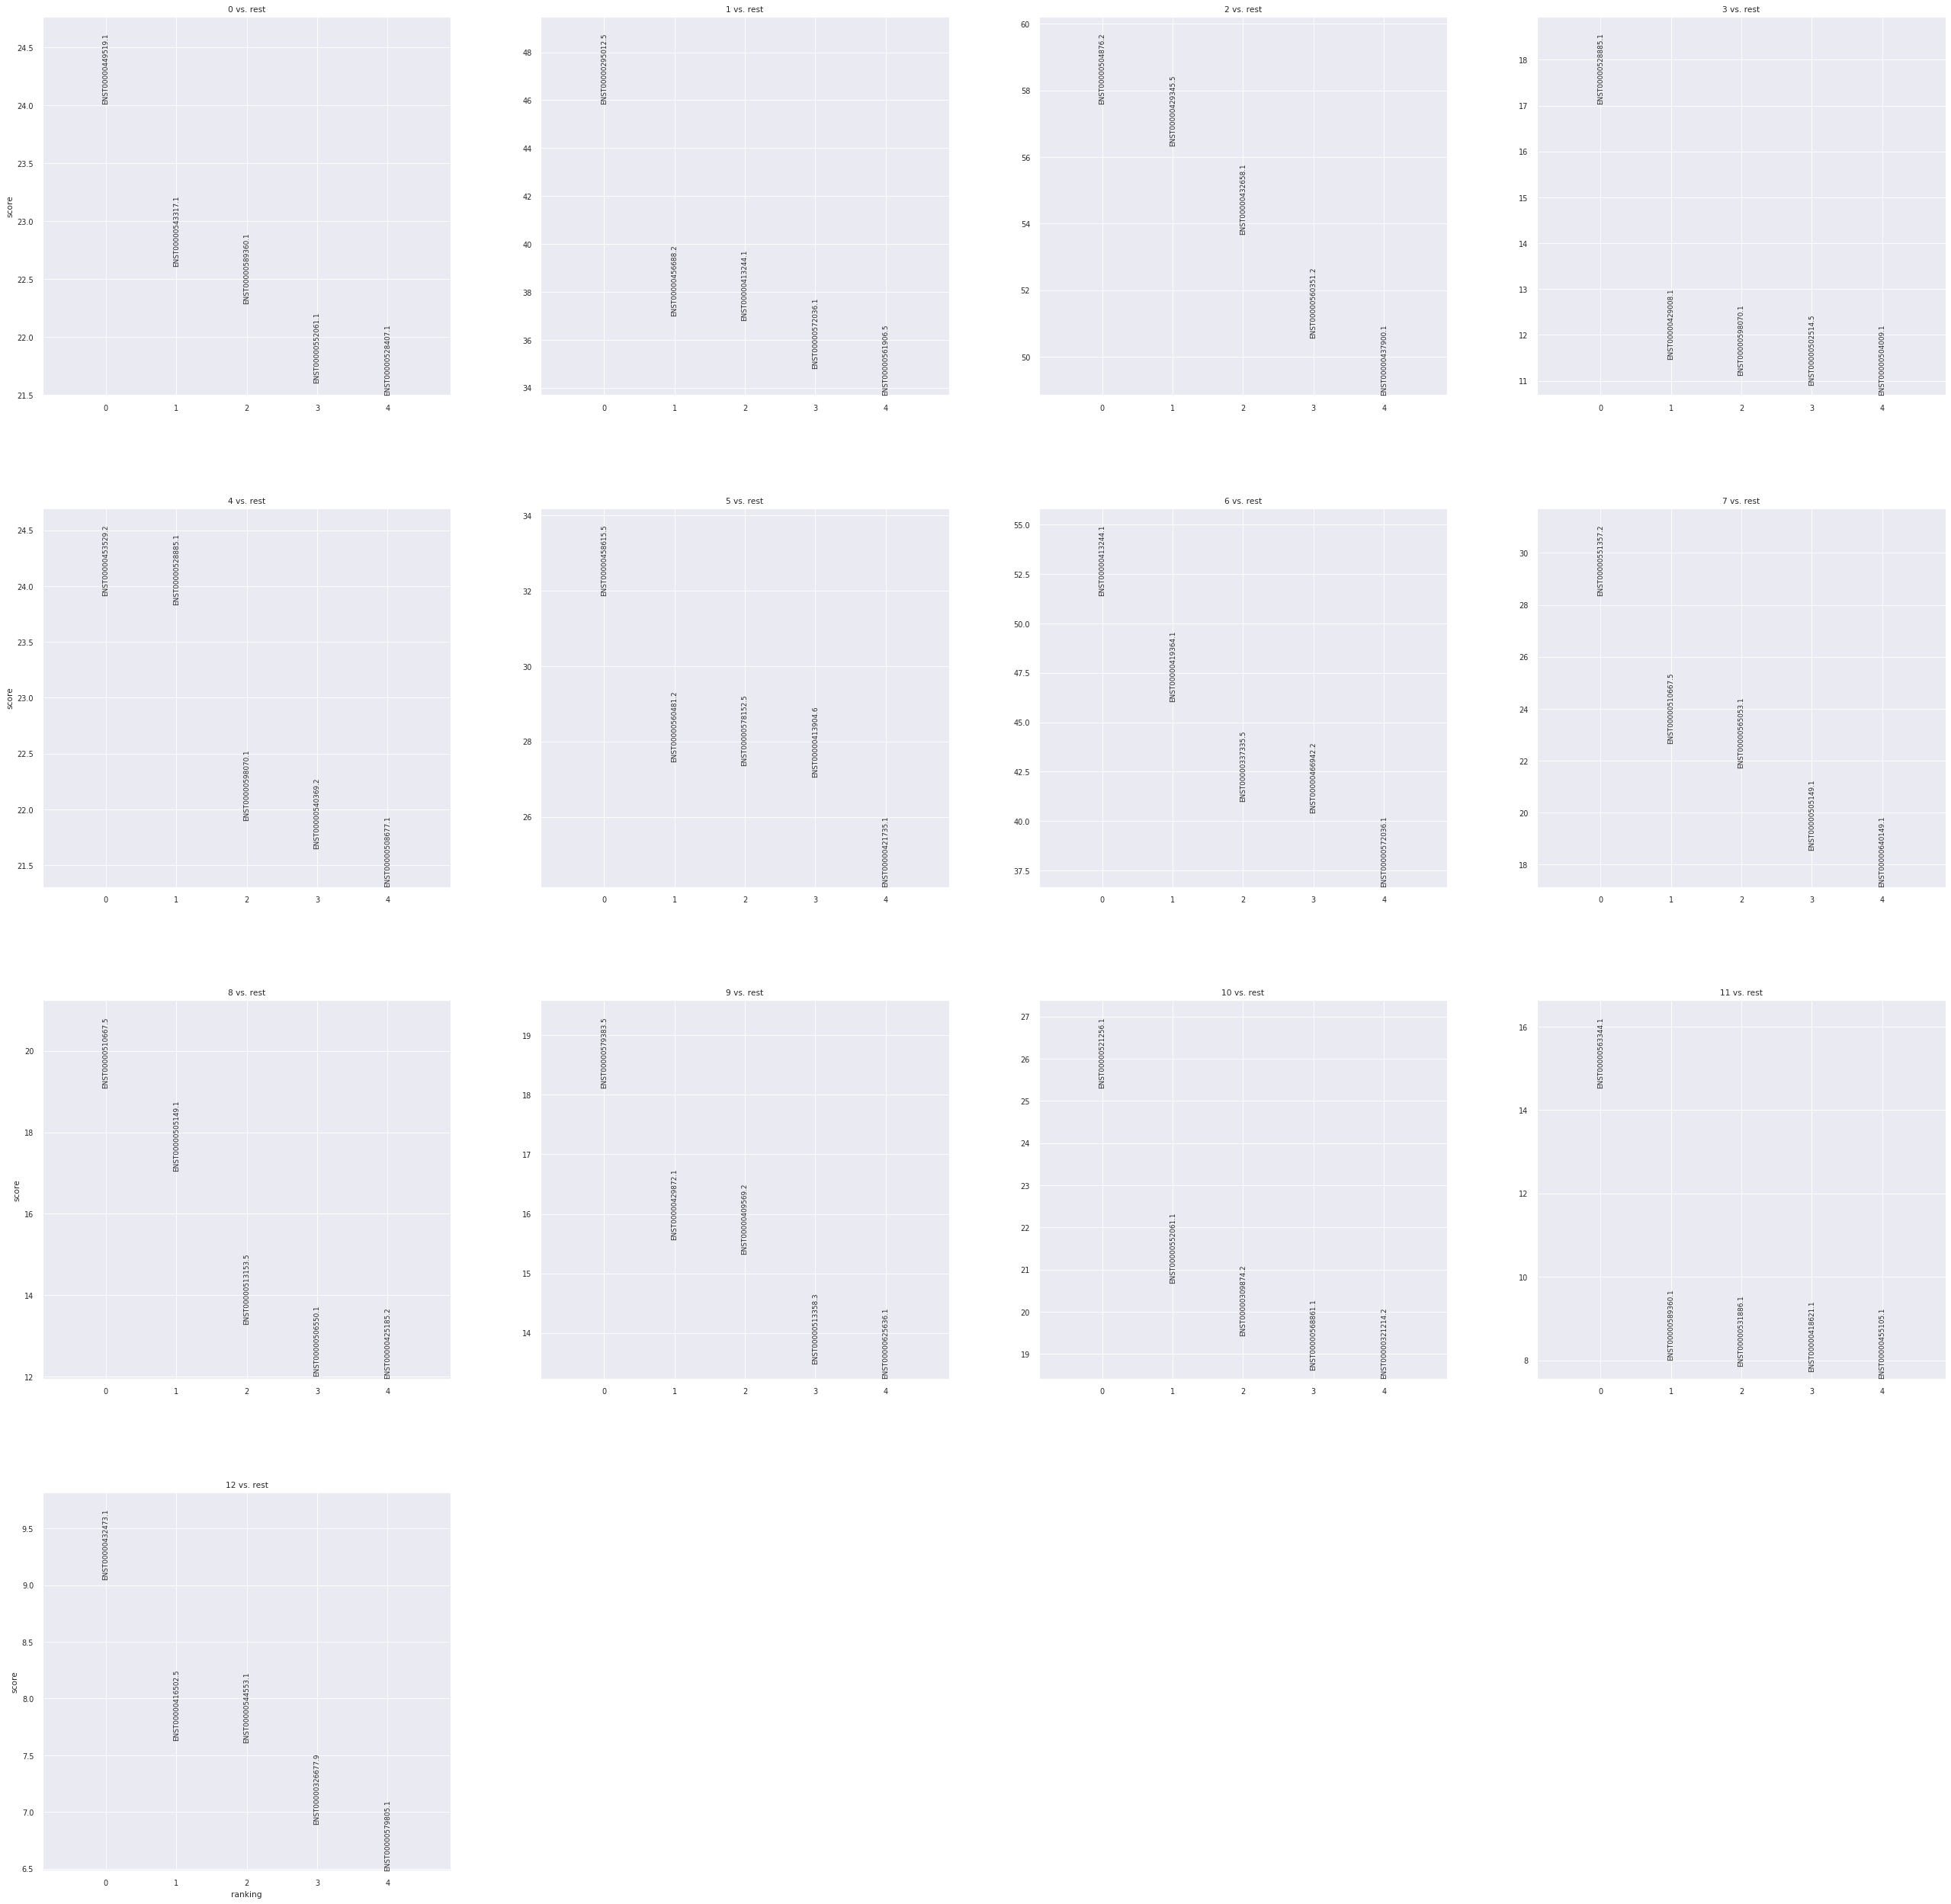

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

In [ ]:
gene_rank = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
#gene_rank.columns = list(marker_genes_def)
gene_rank.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ENST00000449519.1,ENST00000295012.5,ENST00000504876.2,ENST00000528885.1,ENST00000453529.2,ENST00000458615.5,ENST00000413244.1,ENST00000551357.2,ENST00000510667.5,ENST00000579383.5,ENST00000521256.1,ENST00000563344.1,ENST00000432473.1
1,ENST00000543317.1,ENST00000456688.2,ENST00000429345.5,ENST00000429008.1,ENST00000528885.1,ENST00000560481.2,ENST00000419364.1,ENST00000510667.5,ENST00000505149.1,ENST00000429872.1,ENST00000552061.1,ENST00000589360.1,ENST00000416502.5
2,ENST00000589360.1,ENST00000413244.1,ENST00000432658.1,ENST00000598070.1,ENST00000598070.1,ENST00000578152.5,ENST00000337335.5,ENST00000565053.1,ENST00000513153.5,ENST00000409569.2,ENST00000309874.2,ENST00000531886.1,ENST00000544553.1
3,ENST00000552061.1,ENST00000572036.1,ENST00000560351.2,ENST00000502514.5,ENST00000540369.2,ENST00000413904.6,ENST00000466942.2,ENST00000505149.1,ENST00000506550.1,ENST00000513358.3,ENST00000568861.1,ENST00000418621.1,ENST00000326677.9
4,ENST00000528407.1,ENST00000561906.5,ENST00000437900.1,ENST00000504009.1,ENST00000508677.1,ENST00000421735.1,ENST00000572036.1,ENST00000640149.1,ENST00000425185.2,ENST00000625636.1,ENST00000321214.2,ENST00000455105.1,ENST00000579805.1
5,ENST00000376617.3,ENST00000337335.5,ENST00000508677.1,ENST00000323813.3,ENST00000567096.1,ENST00000561111.2,ENST00000437991.1,ENST00000564206.1,ENST00000441268.2,ENST00000567728.1,ENST00000562248.1,ENST00000565152.1,ENST00000566583.5


In [ ]:
gene_rank.shape

(1750, 13)

In [ ]:
gene_rank = gene_rank.head(100).transpose().to_csv('gene_rank.csv')


In [ ]:
#adata = sc.read(results_file)
cell_types = {'3':'Amygdala',
              '11':'Anterior cingulate cortex',
              '12':'Spinal cord',
              '5':'Hippocampus',
              '8':'Substantia nigra',
              '7':'Hypothalamus',
              '9':'Putamen',
              '0':'Cerebellum',
              '10':'Cerebellar hemisphere',
              '1':'Caudate',
              '6':'Nucleus accumbens',
              '2':'Frontal Cortex',
              '4':'Cortex'}

adata.obs['cell type'] = adata.obs['leiden'].map(cell_types).astype('category')

In [ ]:
marker_genes_def = {'Amygdala':'ENST00000528885.1',
                    'Anterior cingulate cortex (BA24)':'ENST00000563344.1',
                    'Spinal cord (cervical c-1)':'ENST00000432473.1',
                    'Hippocampus':'ENST00000458615.5',
                    'Substantia nigra':'ENST00000510667.5',
                    'Hypothalamus':'ENST00000551357.2',
                    'Putamen':'ENST00000579383.5',
                    'Cerebellum':'ENST00000449519.1',
                    'Cerebellar Hemisphere':'ENST00000521256.1',
                    'Caudate (basal ganglia)':'ENST00000295012.5',
                    'Nucleus accumbens (basal ganglia)':'ENST00000413244.1',
                    'Frontal Cortex (BA9)':'ENST00000504876.2',
                    'Cortex':'ENST00000453529.2'}

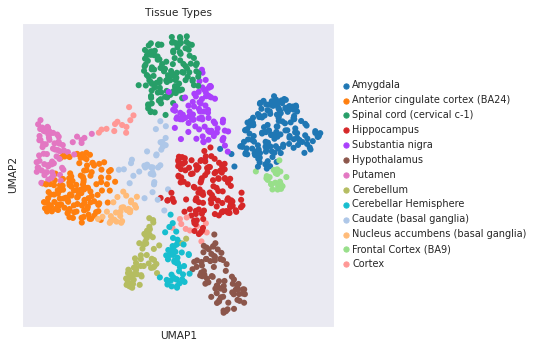

In [ ]:
adata.rename_categories('leiden', list(marker_genes_def))
rcParams['figure.figsize']= 5,5
sc.pl.umap(adata, color=['leiden'], title='Tissue Types')


In [ ]:
adata.write('results_file')

In [ ]:
# USING tSNE

sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:06)


In [ ]:
adata.write('results_file')

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 1750
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'draw_graph', 'paga', 'leiden_sizes', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 1750
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'draw_graph', 'paga', 'leiden_sizes', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
marksgene = list(marker_genes_def)
marksgene

['Amygdala',
 'Anterior cingulate cortex (BA24)',
 'Spinal cord (cervical c-1)',
 'Hippocampus',
 'Substantia nigra',
 'Hypothalamus',
 'Putamen',
 'Cerebellum',
 'Cerebellar Hemisphere',
 'Caudate (basal ganglia)',
 'Nucleus accumbens (basal ganglia)',
 'Frontal Cortex (BA9)',
 'Cortex']

In [ ]:
adata

AnnData object with n_obs × n_vars = 1000 × 1750
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'draw_graph', 'paga', 'leiden_sizes', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


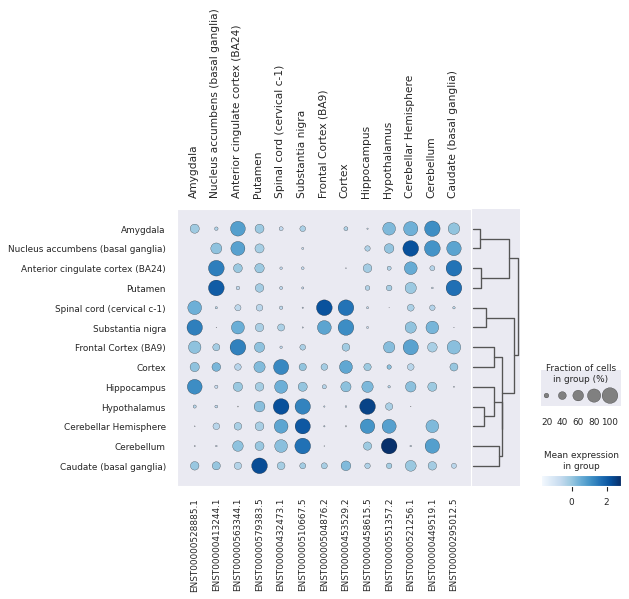

In [ ]:
rcParams['figure.figsize'] = 15,15
sc.pl.dotplot(adata, marker_genes_def, 'leiden', dendrogram=True, 
              save='dotplot.png', cmap='Blues')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell type']`
categories: Cerebellum, Caudate, Frontal Cortex, etc.
var_group_labels: Amygdala, Anterior cingulate cortex (BA24), Spinal cord (cervical c-1), etc.


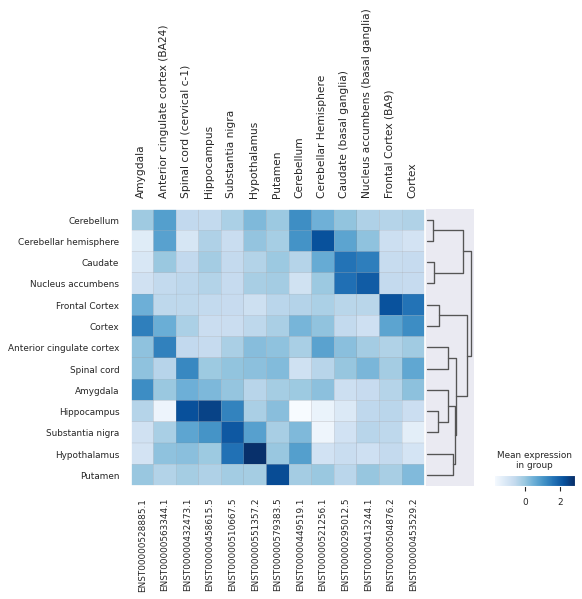

In [ ]:
rcParams['figure.figsize'] = 15,15
sc.pl.matrixplot(adata, marker_genes_def, 'cell type', dendrogram=True,
                 save='dotplot.png', 
                 cmap='Blues')

In [ ]:
#sc.pl.umap(adata, color=['ENST00000453529.2'])


In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head()

,Amygdala_n,Amygdala_p,Anterior cingulate cortex (BA24)_n,Anterior cingulate cortex (BA24)_p,Spinal cord (cervical c-1)_n,Spinal cord (cervical c-1)_p,Hippocampus_n,Hippocampus_p,Substantia nigra_n,Substantia nigra_p,Hypothalamus_n,Hypothalamus_p,Putamen_n,Putamen_p,Cerebellum_n,Cerebellum_p,Cerebellar Hemisphere_n,Cerebellar Hemisphere_p,Caudate (basal ganglia)_n,Caudate (basal ganglia)_p,Nucleus accumbens (basal ganglia)_n,Nucleus accumbens (basal ganglia)_p,Frontal Cortex (BA9)_n,Frontal Cortex (BA9)_p,Cortex_n,Cortex_p
0,ENST00000449519.1,1.878896e-71,ENST00000295012.5,3.036027e-160,ENST00000504876.2,1.057056e-118,ENST00000528885.1,7.261559e-39,ENST00000453529.2,4.439818e-60,ENST00000458615.5,4.083047e-50,ENST00000413244.1,1.088012e-118,ENST00000551357.2,7.261915e-38,ENST00000510667.5,4.721875e-26,ENST00000579383.5,1.925809e-20,ENST00000521256.1,4.057325e-24,ENST00000563344.1,2.372156e-14,ENST00000432473.1,4.592459e-09
1,ENST00000543317.1,2.407711e-60,ENST00000456688.2,7.207943e-97,ENST00000429345.5,6.013335e-154,ENST00000429008.1,1.797836e-22,ENST00000528885.1,1.792665e-51,ENST00000560481.2,8.482936e-46,ENST00000419364.1,2.783711e-146,ENST00000510667.5,1.616537e-36,ENST00000505149.1,1.273966e-23,ENST00000429872.1,9.564529e-18,ENST00000552061.1,1.539127e-25,ENST00000589360.1,6.863385e-09,ENST00000416502.5,1.259084e-07
2,ENST00000589360.1,2.264190e-80,ENST00000413244.1,6.410763e-125,ENST00000432658.1,2.340986e-213,ENST00000598070.1,1.035795e-22,ENST00000598070.1,1.356940e-55,ENST00000578152.5,1.707594e-47,ENST00000337335.5,5.010559e-74,ENST00000565053.1,1.514577e-30,ENST00000513153.5,1.880093e-18,ENST00000409569.2,6.752947e-18,ENST00000309874.2,5.125676e-25,ENST00000531886.1,2.575829e-09,ENST00000544553.1,1.348364e-07
3,ENST00000552061.1,1.351150e-54,ENST00000572036.1,1.514409e-99,ENST00000560351.2,3.190780e-120,ENST00000502514.5,9.668276e-21,ENST00000540369.2,3.073923e-52,ENST00000413904.6,2.800219e-48,ENST00000466942.2,8.135448e-64,ENST00000505149.1,2.620993e-29,ENST00000506550.1,2.022800e-17,ENST00000513358.3,1.070671e-15,ENST00000568861.1,2.021324e-23,ENST00000418621.1,6.668364e-08,ENST00000326677.9,5.757921e-07
4,ENST00000528407.1,5.613696e-63,ENST00000561906.5,1.437063e-83,ENST00000437900.1,3.607354e-116,ENST00000504009.1,1.041680e-19,ENST00000508677.1,3.951055e-51,ENST00000421735.1,4.996006e-42,ENST00000572036.1,7.354236e-71,ENST00000640149.1,6.159518e-25,ENST00000425185.2,8.627810e-18,ENST00000625636.1,2.747695e-15,ENST00000321214.2,1.431759e-23,ENST00000455105.1,4.755749e-08,ENST00000579805.1,1.396631e-06


categories: Cerebellum, Caudate, Frontal Cortex, etc.
var_group_labels: Amygdala, Anterior cingulate cortex (BA24), Spinal cord (cervical c-1), etc.


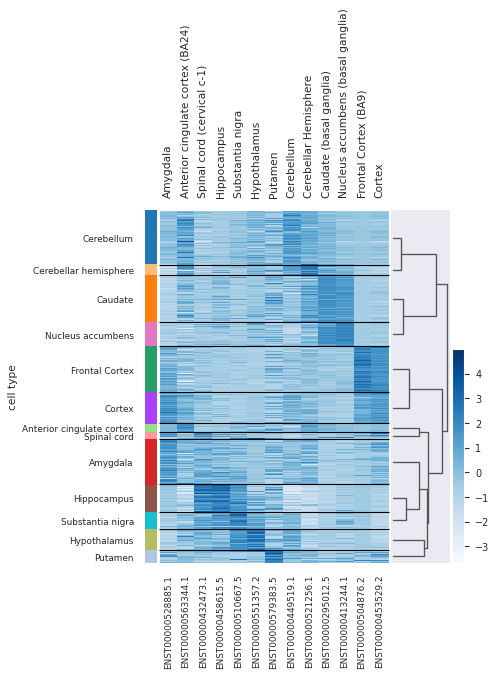

In [ ]:
sc.pl.heatmap(adata, marker_genes_def, groupby='cell type', cmap='Blues', dendrogram=True)

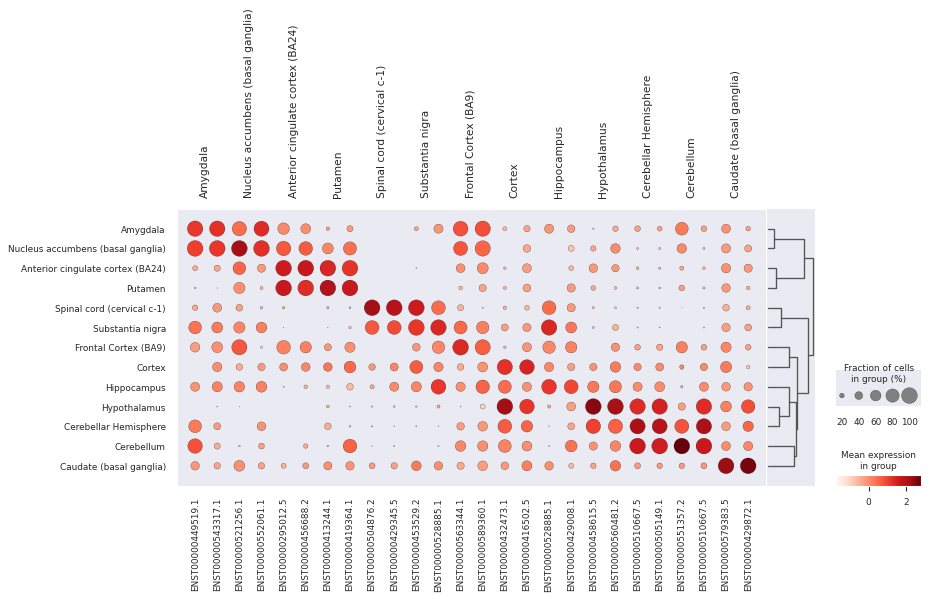

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=2, save='dotplot.png')

categories: Cerebellum, Caudate, Frontal Cortex, etc.
var_group_labels: Amygdala, Anterior cingulate cortex (BA24), Spinal cord (cervical c-1), etc.


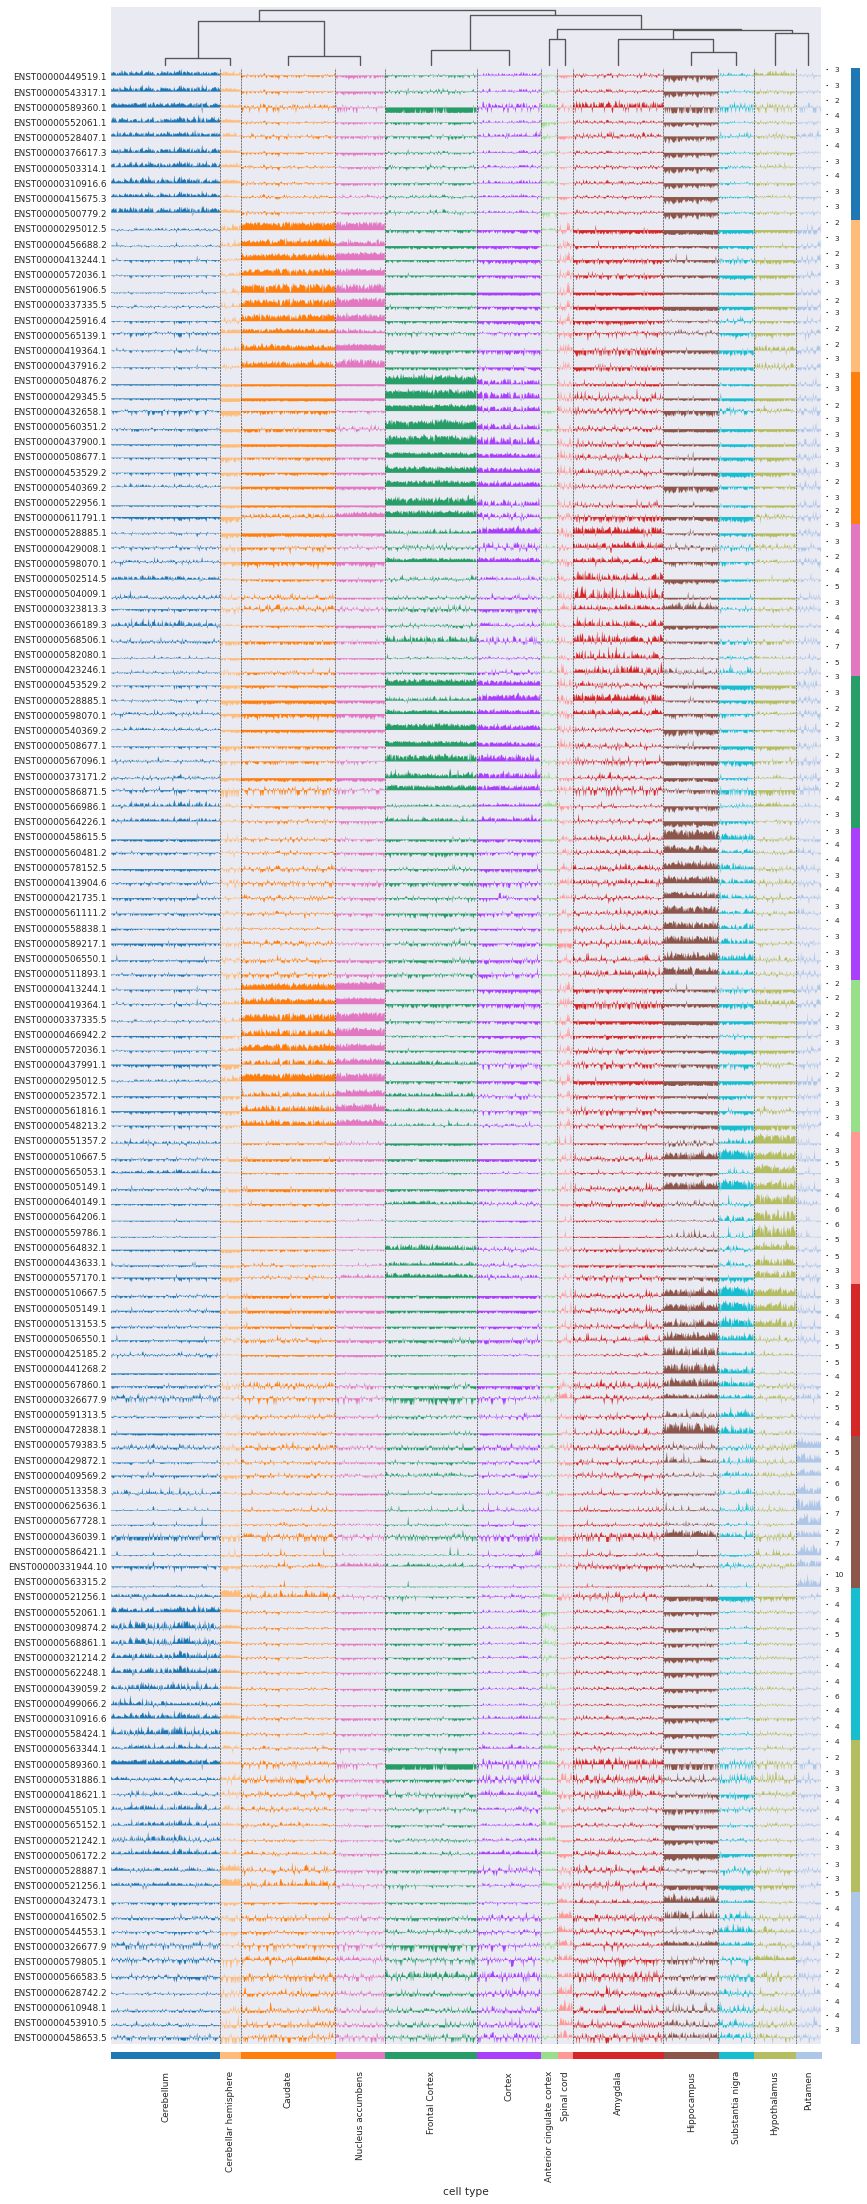

In [ ]:
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell type')

# COEXP

In [ ]:
gtexDF = adata.transpose().to_df()

In [ ]:
gtexDF.head()

,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2726-SM-5H12C,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3026-SM-5N9CA,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-0011-R10a-SM-DO941,GTEX-1192X-0011-R5a-SM-DNZZA,GTEX-1192X-0011-R6a-SM-DNZZB,GTEX-1192X-0011-R7b-SM-DNZZC,GTEX-1192X-0011-R8b-SM-DO11U,GTEX-1192X-0011-R9b-SM-DO934,GTEX-1192X-3126-SM-5N9BY,GTEX-1192X-3226-SM-5987D,GTEX-11DXW-0011-R1a-SM-DNZZD,GTEX-11DXW-0011-R3b-SM-DNZZE,GTEX-11DXW-0011-R5b-SM-DO11D,GTEX-11DXW-0011-R6a-SM-DO11N,GTEX-11DXW-0011-R7b-SM-DO119,GTEX-11DXW-1026-SM-5H11K,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-0011-R10b-SM-DO12C,GTEX-11DXY-0011-R11a-SM-DNZZN,GTEX-11DXY-0011-R5b-SM-DNZZL,GTEX-11DXY-0011-R6a-SM-DNZZF,GTEX-11DXY-0011-R7a-SM-DO11L,GTEX-11DXY-0011-R8a-SM-DO11M,GTEX-11DXY-3126-SM-5N9BT,GTEX-11DXY-3226-SM-5GIDE,GTEX-11DYG-0011-R10b-SM-DNZZO,GTEX-11DYG-0011-R11a-SM-DNZZP,GTEX-11DYG-0011-R5a-SM-DO928,GTEX-11DYG-0011-R6a-SM-DO936,GTEX-11DYG-0011-R7b-SM-EXUS6,GTEX-11DYG-0011-R8a-SM-DO93F,GTEX-11DYG-2926-SM-5H132,GTEX-11DZ1-0011-R10b-SM-DO943,GTEX-11DZ1-0011-R11b-SM-DO11W,GTEX-11DZ1-0011-R2a-SM-DNZZM,...,GTEX-14PJO-0011-R5a-SM-6AJBZ,GTEX-14PJO-0011-R7a-SM-664NR,GTEX-14PJO-0011-R8a-SM-6AJAL,GTEX-14PJO-0011-R9b-SM-62LE9,GTEX-14PJO-2926-SM-686ZI,GTEX-14PN4-0011-R10b-SM-69LP2,GTEX-14PN4-0011-R11a-SM-686ZW,GTEX-14PN4-0011-R1b-SM-69LP8,GTEX-14PN4-0011-R2a-SM-6EU2Y,GTEX-14PN4-0011-R3b-SM-686ZU,GTEX-14PN4-0011-R4a-SM-686ZT,GTEX-14PN4-0011-R5a-SM-686ZV,GTEX-14PN4-0011-R6b-SM-69LQU,GTEX-14PN4-0011-R7b-SM-69LQQ,GTEX-14PN4-0011-R8a-SM-6EU1H,GTEX-14PN4-0011-R9a-SM-6LLH9,GTEX-14PN4-3026-SM-664O4,GTEX-14PQA-0011-R10a-SM-6AJAA,GTEX-14PQA-0011-R1b-SM-6EU1G,GTEX-14PQA-0011-R3b-SM-69LQO,GTEX-14PQA-0011-R4b-SM-6AJBU,GTEX-14PQA-0011-R5b-SM-6AJC2,GTEX-14PQA-0011-R6b-SM-6AJAM,GTEX-14PQA-0011-R8b-SM-6AJAB,GTEX-15CHQ-0011-R10b-SM-6AJBV,GTEX-15CHQ-0011-R11b-SM-686ZZ,GTEX-15CHQ-0011-R1a-SM-COH27,GTEX-15CHQ-0011-R2b-SM-6AJAD,GTEX-15CHQ-0011-R3b-SM-686ZY,GTEX-15CHQ-0011-R4a-SM-686ZX,GTEX-15CHQ-0011-R5b-SM-6AJAN,GTEX-15CHQ-0011-R6b-SM-69LOX,GTEX-15CHQ-0011-R7b-SM-D4P1Q,GTEX-15CHQ-0011-R8b-SM-CNPO4,GTEX-15CHQ-0011-R9a-SM-6LLHX,GTEX-15DCD-0011-R10b-SM-6LPII,GTEX-15DCD-0011-R11a-SM-D4P1R,GTEX-15DCD-0011-R1b-SM-6LPIJ,GTEX-15DCD-0011-R2b-SM-6LPIE,GTEX-15DCD-0011-R3b-SM-D4P1P
transcript_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENST00000480067.1,-0.804860,1.580066,-0.691698,-0.390275,-0.372331,-0.412971,-0.560380,-0.788799,0.242121,-0.080569,1.956874,-0.193668,2.768280,1.861072,-0.638698,0.880145,-0.594251,0.019875,0.835349,1.336653,-0.635524,-0.520116,-0.789995,-0.267781,1.268809,0.038919,1.250455,1.316064,-0.526347,0.115311,0.543508,-0.284590,0.198171,2.259039,0.367904,0.734344,-0.599940,-0.549778,-0.540825,1.284016,...,0.605096,0.946393,0.423557,4.094781,0.077645,-0.990160,-0.803006,-0.124508,0.437198,-0.762115,0.578324,-0.376806,-0.268272,-0.035934,0.546509,2.354179,-0.303972,-0.671994,2.421869,-0.299021,-0.447599,0.918845,-0.593635,0.002635,0.195838,-0.311849,1.266790,1.749172,0.693024,1.344953,0.490224,-0.729141,1.569633,0.443704,3.029971,0.058211,-0.662102,0.688594,1.151616,0.945436
ENST00000601875.1,-1.129653,-0.116452,-1.367492,0.474550,-1.365653,0.544603,-0.478681,2.700824,0.905135,-0.586285,0.785209,1.125956,-1.231100,-0.363106,0.240733,-1.015189,-1.085471,-0.346023,-0.486537,-0.356220,-1.505274,-1.098215,0.272410,0.288362,0.187181,0.554378,-0.065499,-0.357540,-0.499087,1.292514,-1.103864,0.167518,1.103461,-1.136496,2.313985,-0.982354,-0.339730,-1.047290,-1.491371,0.946053,...,1.252228,0.892484,0.712228,0.298849,0.802633,-1.034570,2.996299,-0.968098,2.431631,-1.026885,-0.976321,1.649322,-1.040926,0.784446,1.663441,0.861640,-0.291150,0.199363,0.077856,-0.994187,0.693575,0.378501,-1.098692,-0.989980,0.048973,0.119682,-0.059678,2.165333,1.273909,0.084443,-1.173097,0.614526,-0.056653,0.580467,-0.219414,1.415027,0.697544,0.794294,-1.036437,1.160111
ENST00000523683.1,0.061507,1.115123,0.358722,1.232747,-0.798404,0.498425,

In [ ]:
#gtexDF.to_csv('normGtexDF.tsv', sep='\t')

In [ ]:
#retain the same columns

tissueMRNA = pd.read_csv('tissueMRNA', sep='\t', index_col='transcript_id')
tissExt =  tissueMRNA[[#'transcript_id',
                       'GTEX-1117F-3226-SM-5N9CT',
 'GTEX-111FC-3126-SM-5GZZ2',
 'GTEX-111FC-3326-SM-5GZYV',
 'GTEX-1128S-2726-SM-5H12C',
 'GTEX-1128S-2826-SM-5N9DI',
 'GTEX-117XS-3026-SM-5N9CA',
 'GTEX-117XS-3126-SM-5GIDP',
 'GTEX-1192X-0011-R10a-SM-DO941',
 'GTEX-1192X-0011-R5a-SM-DNZZA',
 'GTEX-1192X-0011-R6a-SM-DNZZB',
 'GTEX-1192X-0011-R7b-SM-DNZZC',
 'GTEX-1192X-0011-R8b-SM-DO11U',
 'GTEX-1192X-0011-R9b-SM-DO934',
 'GTEX-1192X-3126-SM-5N9BY',
 'GTEX-1192X-3226-SM-5987D',
 'GTEX-11DXW-0011-R1a-SM-DNZZD',
 'GTEX-11DXW-0011-R3b-SM-DNZZE',
 'GTEX-11DXW-0011-R5b-SM-DO11D',
 'GTEX-11DXW-0011-R6a-SM-DO11N',
 'GTEX-11DXW-0011-R7b-SM-DO119',
 'GTEX-11DXW-1026-SM-5H11K',
 'GTEX-11DXW-1126-SM-5H12Q',
 'GTEX-11DXY-0011-R10b-SM-DO12C',
 'GTEX-11DXY-0011-R11a-SM-DNZZN',
 'GTEX-11DXY-0011-R5b-SM-DNZZL',
 'GTEX-11DXY-0011-R6a-SM-DNZZF',
 'GTEX-11DXY-0011-R7a-SM-DO11L',
 'GTEX-11DXY-0011-R8a-SM-DO11M',
 'GTEX-11DXY-3126-SM-5N9BT',
 'GTEX-11DXY-3226-SM-5GIDE',
 'GTEX-11DYG-0011-R10b-SM-DNZZO',
 'GTEX-11DYG-0011-R11a-SM-DNZZP',
 'GTEX-11DYG-0011-R5a-SM-DO928',
 'GTEX-11DYG-0011-R6a-SM-DO936',
 'GTEX-11DYG-0011-R7b-SM-EXUS6',
 'GTEX-11DYG-0011-R8a-SM-DO93F',
 'GTEX-11DYG-2926-SM-5H132',
 'GTEX-11DZ1-0011-R10b-SM-DO943',
 'GTEX-11DZ1-0011-R11b-SM-DO11W',
 'GTEX-11DZ1-0011-R2a-SM-DNZZM',
 'GTEX-11DZ1-0011-R3a-SM-DNZYY',
 'GTEX-11DZ1-0011-R5a-SM-DO11J',
 'GTEX-11DZ1-0011-R6b-SM-DNZZG',
 'GTEX-11DZ1-0011-R7a-SM-DNZZH',
 'GTEX-11DZ1-0011-R8b-SM-DNZZI',
 'GTEX-11DZ1-0011-R9a-SM-DO933',
 'GTEX-11DZ1-2926-SM-5A5KI',
 'GTEX-11EI6-0011-R10a-SM-DO93R',
 'GTEX-11EI6-0011-R11a-SM-DO11V',
 'GTEX-11EI6-0011-R1a-SM-DO93L',
 'GTEX-11EI6-0011-R8a-SM-DO93M',
 'GTEX-11EI6-2926-SM-5985U',
 'GTEX-11EI6-3026-SM-5GZZO',
 'GTEX-11EMC-0011-R10a-SM-DNZZJ',
 'GTEX-11EMC-0011-R11b-SM-DNZZK',
 'GTEX-11EMC-0011-R2b-SM-DO114',
 'GTEX-11EMC-0011-R8b-SM-DO91Z',
 'GTEX-11EMC-0011-R9b-SM-DO921',
 'GTEX-11EMC-3226-SM-5EGKW',
 'GTEX-11EMC-3326-SM-5P9JH',
 'GTEX-11GS4-0011-R1a-SM-DO129',
 'GTEX-11GS4-0011-R2a-SM-DO942',
 'GTEX-11GS4-3126-SM-5A5LH',
 'GTEX-11GSO-0011-R1b-SM-57WD3',
 'GTEX-11GSO-0011-R2a-SM-57WDF',
 'GTEX-11GSO-0011-R3b-SM-57WB2',
 'GTEX-11GSO-2926-SM-5HL73',
 'GTEX-11GSO-3026-SM-5Q5AL',
 'GTEX-11GSP-0011-R10a-SM-5NQ7J',
 'GTEX-11GSP-0011-R11b-SM-5NQ7V',
 'GTEX-11GSP-0011-R1a-SM-9QEJ3',
 'GTEX-11GSP-0011-R2b-SM-9QEGE',
 'GTEX-11GSP-0011-R3a-SM-9QEGF',
 'GTEX-11GSP-0011-R5a-SM-57WBE',
 'GTEX-11GSP-0011-R6b-SM-57WBQ',
 'GTEX-11GSP-0011-R7b-SM-57WC3',
 'GTEX-11GSP-0011-R8b-SM-5NQ79',
 'GTEX-11GSP-0011-R9b-SM-5NQ77',
 'GTEX-11GSP-3126-SM-5A5LL',
 'GTEX-11GSP-3226-SM-5986O',
 'GTEX-11H98-0011-R10b-SM-5NQ98',
 'GTEX-11H98-0011-R11b-SM-5NQ6U',
 'GTEX-11H98-0011-R5b-SM-57WCF',
 'GTEX-11H98-0011-R8a-SM-5NQ8V',
 'GTEX-11NUK-0011-R4a-SM-DO12B',
 'GTEX-11NUK-0011-R5a-SM-DO93N',
 'GTEX-11NUK-0011-R6a-SM-DO93O',
 'GTEX-11NUK-0011-R7a-SM-DO93P',
 'GTEX-11NUK-2926-SM-5A5MD',
 'GTEX-11NUK-3026-SM-5986K',
 'GTEX-11NV4-0011-R5a-SM-5NQ88',
 'GTEX-11NV4-0011-R6a-SM-57WD5',
 'GTEX-11NV4-0011-R7a-SM-57WDH',
 'GTEX-11NV4-2126-SM-5N9DS',
 'GTEX-11NV4-2226-SM-5BC4T',
 'GTEX-11O72-0011-R5a-SM-DO922',
 'GTEX-11O72-0011-R6a-SM-DNZZQ',
 'GTEX-11O72-2826-SM-5HL6W',
 'GTEX-11O72-2926-SM-5BC4V',
 'GTEX-11OC5-0626-SM-5HL6M',
 'GTEX-11OC5-0726-SM-5P9JK',
 'GTEX-11OF3-0011-R11a-SM-57WCR',
 'GTEX-11OF3-0011-R5a-SM-57WB4',
 'GTEX-11OF3-0011-R6b-SM-57WBG',
 'GTEX-11OF3-0011-R7a-SM-57WCG',
 'GTEX-11OF3-0011-R8b-SM-57WCS',
 'GTEX-11OF3-2926-SM-5HL78',
 'GTEX-11ONC-0011-R1a-SM-57WD4',
 'GTEX-11ONC-0011-R4b-SM-DO93H',
 'GTEX-11ONC-0011-R5b-SM-DO93I',
 'GTEX-11ONC-0011-R6a-SM-DO12A',
 'GTEX-11ONC-0011-R7b-SM-DO93J',
 'GTEX-11ONC-0011-R8b-SM-5NQ87',
 'GTEX-11ONC-0011-R9b-SM-5NQ8J',
 'GTEX-11ONC-2926-SM-5P9JM',
 'GTEX-11ONC-3026-SM-5985W',
 'GTEX-11PRG-0011-R10b-SM-DO93G',
 'GTEX-11PRG-0011-R11b-SM-DNZZY',
 'GTEX-11PRG-0011-R2a-SM-69LQ5',
 'GTEX-11PRG-0011-R4a-SM-DNZZR',
 'GTEX-11PRG-0011-R5b-SM-DNZZS',
 'GTEX-11PRG-0011-R6b-SM-DO923',
 'GTEX-11PRG-0011-R7a-SM-DNZZT',
 'GTEX-11PRG-2826-SM-5BC54',
 'GTEX-11PRG-2926-SM-5987A',
 'GTEX-11TTK-0011-R10b-SM-DO925',
 'GTEX-11TTK-0011-R11b-SM-DO112',
 'GTEX-11TTK-0011-R4a-SM-DNZZU',
 'GTEX-11TTK-0011-R5a-SM-DNZZV',
 'GTEX-11TTK-0011-R6b-SM-DNZZW',
 'GTEX-11TTK-0011-R7b-SM-DNZZZ',
 'GTEX-11TTK-0011-R8b-SM-DO111',
 'GTEX-11TTK-2826-SM-5GU5K',
 'GTEX-11TTK-2926-SM-5PNYP',
 'GTEX-11TUW-0011-R10a-SM-DO924',
 'GTEX-11TUW-0011-R1a-SM-DO92S',
 'GTEX-11TUW-0011-R2b-SM-DO92T',
 'GTEX-11UD1-0011-R1b-SM-5BC7D',
 'GTEX-11UD1-0011-R2b-SM-5BC6O',
 'GTEX-11UD1-0011-R3a-SM-5BC6S',
 'GTEX-11UD1-0011-R5b-SM-5P9FP',
 'GTEX-11UD2-0011-R9b-SM-DO926',
 'GTEX-11WQC-0011-R10a-SM-57WCT',
 'GTEX-11WQC-0011-R11b-SM-57WD6',
 'GTEX-11WQC-0011-R1b-SM-DO932',
 'GTEX-11WQC-0011-R2a-SM-DO927',
 'GTEX-11WQC-0011-R3a-SM-DO11T',
 'GTEX-11WQC-0011-R5a-SM-5BC74',
 'GTEX-11WQC-0011-R6a-SM-5BC77',
 'GTEX-11WQC-0011-R7b-SM-5BC7A',
 'GTEX-11WQC-0011-R8b-SM-57WCH',
 'GTEX-11WQK-0011-R10a-SM-5BC6R',
 'GTEX-11WQK-0011-R3b-SM-DO93K',
 'GTEX-11WQK-0011-R8a-SM-5BC7C',
 'GTEX-11WQK-0011-R9b-SM-5BC6N',
 'GTEX-11WQK-3026-SM-5EQL6',
 'GTEX-11ZTS-0011-R10a-SM-DO93S',
 'GTEX-11ZTS-0011-R11a-SM-DO113',
 'GTEX-11ZTS-0011-R1a-SM-5BC71',
 'GTEX-11ZTS-0011-R2b-SM-5BC75',
 'GTEX-11ZTS-0011-R3a-SM-5BC78',
 'GTEX-11ZTS-0011-R8a-SM-57WDI',
 'GTEX-11ZTS-0011-R9b-SM-DO93Q',
 'GTEX-11ZTS-3226-SM-5EGID',
 'GTEX-11ZU8-0011-R4a-SM-5BC6Y',
 'GTEX-11ZUS-0011-R11b-SM-5BC7B',
 'GTEX-11ZUS-0011-R8a-SM-5BC73',
 'GTEX-11ZUS-0011-R9b-SM-5BC76',
 'GTEX-11ZUS-2826-SM-5EQKW',
 'GTEX-11ZUS-2926-SM-5FQSL',
 'GTEX-11ZVC-0011-R1b-SM-5BC6M',
 'GTEX-11ZVC-0011-R3a-SM-5BC6V',
 'GTEX-11ZVC-0011-R4a-SM-5BC6Z',
 'GTEX-11ZVC-0011-R9a-SM-57WC5',
 'GTEX-11ZVC-3026-SM-59HJM',
 'GTEX-12126-0011-R10b-SM-5BC6T',
 'GTEX-12126-0011-R11a-SM-5BC6X',
 'GTEX-12126-0011-R9b-SM-5BC6P',
 'GTEX-12126-0926-SM-5FQTW',
 'GTEX-12126-1026-SM-5P9JJ',
 'GTEX-1212Z-0011-R1b-SM-5BC72',
 'GTEX-12584-0011-R6a-SM-5NQ7C',
 'GTEX-1269C-3126-SM-5EGI6',
 'GTEX-12WSA-0011-R10b-SM-5P9ET',
 'GTEX-12WSA-0011-R2a-SM-57WDK',
 'GTEX-12WSA-0011-R4a-SM-57WB7',
 'GTEX-12WSA-0011-R5b-SM-5GU5I',
 'GTEX-12WSA-0011-R7b-SM-5GU5U',
 'GTEX-12WSA-0011-R8a-SM-5P9EX',
 'GTEX-12WSA-2926-SM-5EQ4D',
 'GTEX-12WSC-0011-R10a-SM-5GU57',
 'GTEX-12WSC-0011-R11a-SM-5GU5J',
 'GTEX-12WSC-0011-R3a-SM-5P9F1',
 'GTEX-12WSC-0011-R5b-SM-5CVNS',
 'GTEX-12WSC-0011-R6b-SM-5LU99',
 'GTEX-12WSC-0011-R7b-SM-5LU9L',
 'GTEX-12WSC-0011-R9a-SM-5GU4U',
 'GTEX-12WSC-2926-SM-5BC5Z',
 'GTEX-12WSC-3026-SM-5GCNF',
 'GTEX-12WSD-0011-R11a-SM-9OSVC',
 'GTEX-12WSD-0011-R1b-SM-5LZVY',
 'GTEX-12WSD-0011-R2a-SM-5LZWB',
 'GTEX-12WSD-0011-R3b-SM-5LZWN',
 'GTEX-12WSD-0011-R4b-SM-5LZUA',
 'GTEX-12WSD-0011-R5b-SM-5CVNG',
 'GTEX-12WSD-0011-R6b-SM-5P9JU',
 'GTEX-12WSD-0011-R7b-SM-5PNWE',
 'GTEX-12WSD-0011-R9a-SM-5GU6W',
 'GTEX-12WSD-3026-SM-5LZU7',
 'GTEX-12WSD-3126-SM-5HL7P',
 'GTEX-12WSE-0011-R10b-SM-5P9JV',
 'GTEX-12WSE-0011-R11b-SM-5P9JW',
 'GTEX-12WSE-0011-R1b-SM-5GU4V',
 'GTEX-12WSE-0011-R6b-SM-5LZV5',
 'GTEX-12WSE-0011-R7a-SM-5PNWF',
 'GTEX-12WSE-2926-SM-5RQJ9',
 'GTEX-12WSF-0011-R10a-SM-5LZVH',
 'GTEX-12WSF-0011-R11a-SM-5LZVT',
 'GTEX-12WSF-0011-R1a-SM-5DUVI',
 'GTEX-12WSF-0011-R2a-SM-5DUVU',
 'GTEX-12WSF-0011-R3a-SM-5DUW7',
 'GTEX-12WSF-0011-R4b-SM-5HL88',
 'GTEX-12WSF-0011-R5a-SM-5HL8K',
 'GTEX-12WSF-0011-R6b-SM-5HL8W',
 'GTEX-12WSF-0011-R7b-SM-5HL99',
 'GTEX-12WSF-3126-SM-6M478',
 'GTEX-12WSH-0011-R10a-SM-5LZUS',
 'GTEX-12WSH-0011-R11a-SM-5LZVM',
 'GTEX-12WSH-0011-R1a-SM-5GU5V',
 'GTEX-12WSH-0011-R2a-SM-5GU68',
 'GTEX-12WSH-0011-R4a-SM-5GU6K',
 'GTEX-12WSH-0011-R5b-SM-5P9F3',
 'GTEX-12WSH-0011-R6b-SM-5P9F4',
 'GTEX-12WSH-0011-R9b-SM-5LZUG',
 'GTEX-12WSH-3026-SM-5CVNI',
 'GTEX-12WSH-3126-SM-5LZW8',
 'GTEX-12WSI-0011-R11b-SM-5P9EZ',
 'GTEX-12WSI-0011-R7b-SM-5GU78',
 'GTEX-12WSM-0011-R10a-SM-5DUWV',
 'GTEX-12WSM-0011-R11a-SM-5DUX8',
 'GTEX-12WSM-0011-R1a-SM-5LZW6',
 'GTEX-12WSM-0011-R3b-SM-5LZWI',
 'GTEX-12WSM-0011-R5a-SM-5EQ4Y',
 'GTEX-12WSM-0011-R6b-SM-5EQ6N',
 'GTEX-12WSM-0011-R7b-SM-5EGLD',
 'GTEX-12WSM-0011-R8a-SM-5DUWJ',
 'GTEX-12WSM-2126-SM-5GCOC',
 'GTEX-12ZZW-0011-R10b-SM-5HL9X',
 'GTEX-12ZZW-0011-R3a-SM-5DUWW',
 'GTEX-12ZZW-0011-R4a-SM-5DUX9',
 'GTEX-12ZZW-0011-R5a-SM-5DUVN',
 'GTEX-12ZZW-0011-R6a-SM-5DUVZ',
 'GTEX-12ZZW-0011-R7a-SM-5DUWC',
 'GTEX-12ZZW-2926-SM-5LZUP',
 'GTEX-12ZZX-0011-R10b-SM-5DUWK',
 'GTEX-12ZZX-0011-R11a-SM-5DUVJ',
 'GTEX-12ZZX-0011-R1a-SM-5EQ6B',
 'GTEX-12ZZX-0011-R2a-SM-5EGLG',
 'GTEX-12ZZX-0011-R3b-SM-5EGLH',
 'GTEX-12ZZX-0011-R5a-SM-5HL89',
 'GTEX-12ZZX-0011-R6a-SM-5HL8L',
 'GTEX-12ZZX-0011-R7b-SM-5DUVV',
 'GTEX-12ZZX-0011-R8a-SM-5DUW8',
 'GTEX-12ZZX-2826-SM-5BC6K',
 'GTEX-12ZZX-2926-SM-5GCOQ',
 'GTEX-12ZZY-0011-R10b-SM-5HL7W',
 'GTEX-12ZZY-0011-R5a-SM-5EGL9',
 'GTEX-12ZZY-0011-R6b-SM-5EGLA',
 'GTEX-12ZZY-0011-R7a-SM-5EGLB',
 'GTEX-12ZZY-2926-SM-5DUXO',
 'GTEX-12ZZY-3026-SM-5GCOU',
 'GTEX-12ZZZ-0011-R10a-SM-5P9HC',
 'GTEX-12ZZZ-0011-R11a-SM-5EGLC',
 'GTEX-12ZZZ-0011-R3b-SM-5DUXK',
 'GTEX-12ZZZ-0011-R4b-SM-5DUV7',
 'GTEX-12ZZZ-0011-R5a-SM-5EQ4M',
 'GTEX-12ZZZ-0011-R6b-SM-5EQ5B',
 'GTEX-12ZZZ-0011-R7b-SM-5EGLE',
 'GTEX-12ZZZ-3026-SM-5BC67',
 'GTEX-12ZZZ-3126-SM-5LZU6',
 'GTEX-13112-0011-R1b-SM-5HL7K',
 'GTEX-13112-0011-R3b-SM-5HL9L',
 'GTEX-13112-0011-R4b-SM-5DUXL',
 'GTEX-13112-0011-R5b-SM-5DUV8',
 'GTEX-13112-0011-R6b-SM-5DUVK',
 'GTEX-13112-0011-R7b-SM-5DUVW',
 'GTEX-13112-0011-R8b-SM-664OV',
 'GTEX-13112-2926-SM-5DUWT',
 'GTEX-1313W-0011-R10b-SM-5DUXA',
 'GTEX-1313W-0011-R11a-SM-5DUXN',
 'GTEX-1313W-0011-R1b-SM-5EQ4A',
 'GTEX-1313W-0011-R2a-SM-5EGLF',
 'GTEX-1313W-0011-R3a-SM-5EGLI',
 'GTEX-1313W-0011-R4b-SM-5KLZV',
 'GTEX-1313W-0011-R5b-SM-5L3EP',
 'GTEX-1313W-0011-R6a-SM-5K7XO',
 'GTEX-1313W-0011-R7b-SM-5DUWL',
 'GTEX-1313W-0011-R8a-SM-5DUVM',
 'GTEX-1313W-3026-SM-5LZUZ',
 'GTEX-1313W-3126-SM-5LZUI',
 'GTEX-131XH-0011-R10a-SM-5EGLJ',
 'GTEX-131XH-0011-R11a-SM-5EGLN',
 'GTEX-131XH-0011-R1a-SM-5DUWA',
 'GTEX-131XH-0011-R2b-SM-5DUVY',
 'GTEX-131XH-0011-R3b-SM-5DUWM',
 'GTEX-131XH-0011-R4b-SM-5DUWB',
 'GTEX-131XH-0011-R6a-SM-5KM2G',
 'GTEX-131XH-0011-R8a-SM-5EGLL',
 'GTEX-131XH-2926-SM-5LZU4',
 'GTEX-131XW-0011-R10a-SM-5DUVA',
 'GTEX-131XW-0011-R11a-SM-5DUV9',
 'GTEX-131XW-0011-R6b-SM-5K7XY',
 'GTEX-131XW-0011-R8a-SM-5DUWY',
 'GTEX-131XW-0011-R9a-SM-5N9EO',
 'GTEX-131XW-3126-SM-5LZUC',
 'GTEX-131YS-0011-R10b-SM-5EQ5N',
 'GTEX-131YS-0011-R11b-SM-5EGLM',
 'GTEX-131YS-0011-R1a-SM-5DUXC',
 'GTEX-131YS-0011-R3b-SM-5DUXB',
 'GTEX-131YS-0011-R4a-SM-5DUVL',
 'GTEX-131YS-0011-R5b-SM-5K7YB',
 'GTEX-131YS-0011-R7a-SM-5IJDA',
 'GTEX-131YS-0011-R9b-SM-5EQLY',
 'GTEX-131YS-3026-SM-5EGHY',
 'GTEX-131YS-3126-SM-5KLYT',
 'GTEX-132Q8-0011-R10b-SM-5DUWZ',
 'GTEX-132Q8-0011-R11b-SM-5DUW9',
 'GTEX-132Q8-0011-R1a-SM-5EGLK',
 'GTEX-132Q8-0011-R2b-SM-5EQ5Z',
 'GTEX-132Q8-0011-R5a-SM-5IJDM',
 'GTEX-132Q8-0011-R6a-SM-5K7YN',
 'GTEX-132Q8-0011-R7b-SM-5N9F1',
 'GTEX-132Q8-0011-R8b-SM-5DUWX',
 'GTEX-132Q8-2926-SM-5IFFP',
 'GTEX-132Q8-3026-SM-5PNVG',
 'GTEX-1399T-0011-R11a-SM-5J2O1',
 'GTEX-1399T-0011-R1b-SM-5DUWN',
 'GTEX-1399T-0011-R2b-SM-5DUXM',
 'GTEX-1399T-0011-R4b-SM-5DUVX',
 'GTEX-1399T-0011-R5b-SM-5IJDK',
 'GTEX-1399T-0011-R6b-SM-5K7YL',
 'GTEX-1399T-0011-R8b-SM-5IJD8',
 'GTEX-1399T-3026-SM-5KLZC',
 'GTEX-1399T-3126-SM-5IJFS',
 'GTEX-139T4-0011-R9b-SM-5HL6S',
 'GTEX-139T8-0011-R1a-SM-5HL75',
 'GTEX-139T8-0011-R3b-SM-5HL4R',
 'GTEX-139T8-0011-R4a-SM-5HL54',
 'GTEX-139T8-0011-R5b-SM-5J1MO',
 'GTEX-139T8-1026-SM-5J2MC',
 'GTEX-139TS-0011-R10a-SM-5K7TU',
 'GTEX-139TS-0011-R2b-SM-5J1MX',
 'GTEX-139TS-0011-R5b-SM-5J2MZ',
 'GTEX-139TS-0011-R6a-SM-5J2OB',
 'GTEX-139TS-0011-R7a-SM-5K7X7',
 'GTEX-139TS-0011-R8a-SM-5J1NP',
 'GTEX-139TS-3126-SM-5LZWX',
 'GTEX-139TT-0011-R11b-SM-5LZV1',
 'GTEX-139TT-0011-R1a-SM-5LZVD',
 'GTEX-139TT-0011-R3b-SM-5K7VL',
 'GTEX-139TT-0011-R5b-SM-5K7W8',
 'GTEX-139TT-0011-R6b-SM-5J2ON',
 'GTEX-139TT-0011-R7b-SM-5J2MN',
 'GTEX-139TT-2626-SM-5LZUB',
 'GTEX-139TU-0011-R5b-SM-5L3E1',
 'GTEX-139UW-0011-R11a-SM-5IJGN',
 'GTEX-139UW-0011-R9b-SM-5LZYT',
 'GTEX-13CF2-0011-R11b-SM-5LZXO',
 'GTEX-13CF2-0011-R1a-SM-5LZY1',
 'GTEX-13CF2-0011-R2a-SM-5L3DC',
 'GTEX-13CF2-0011-R3b-SM-5LZZ6',
 'GTEX-13CF2-0011-R5a-SM-5LZWS',
 'GTEX-13CF2-0011-R7b-SM-5K7UV',
 'GTEX-13CF2-0011-R8b-SM-5IJCX',
 'GTEX-13CF2-3026-SM-5IFFX',
 'GTEX-13CIG-0011-R3b-SM-5K7XF',
 'GTEX-13CIG-0011-R5b-SM-5L3F2',
 'GTEX-13CIG-0011-R8b-SM-5LZX5',
 'GTEX-13CIG-0011-R9a-SM-5K7VU',
 'GTEX-13CZV-0011-R10b-SM-5LZYD',
 'GTEX-13CZV-0011-R11b-SM-5N9FN',
 'GTEX-13CZV-0011-R3a-SM-5KM27',
 'GTEX-13CZV-0011-R4b-SM-5J2NY',
 'GTEX-13CZV-0011-R5a-SM-5K7XA',
 'GTEX-13CZV-0011-R7b-SM-5LZXH',
 'GTEX-13CZV-0011-R9a-SM-5LZXT',
 'GTEX-13FHO-0011-R10b-SM-5J2MM',
 'GTEX-13FHO-0011-R11b-SM-5LZYQ',
 'GTEX-13FHO-0011-R1b-SM-5KLZG',
 'GTEX-13FHO-0011-R3b-SM-5K7YA',
 'GTEX-13FHO-0011-R5b-SM-5LZZ3',
 'GTEX-13FHO-0011-R6b-SM-5LZX1',
 'GTEX-13FHO-0011-R7b-SM-5LZXD',
 'GTEX-13FHO-2926-SM-5L3ES',
 'GTEX-13FHO-3026-SM-5J1O9',
 'GTEX-13FHP-0011-R11b-SM-5LZXP',
 'GTEX-13FHP-0011-R1b-SM-5K7XL',
 'GTEX-13FHP-0011-R5b-SM-5LZY2',
 'GTEX-13FHP-0011-R6b-SM-5LZY6',
 'GTEX-13FHP-0011-R7b-SM-5LZYI',
 'GTEX-13FHP-2926-SM-5IJG9',
 'GTEX-13FHP-3026-SM-5IJBS',
 'GTEX-13FLV-0011-R10b-SM-5LZZ2',
 'GTEX-13FLV-0011-R11a-SM-5LZZ7',
 'GTEX-13FLV-0011-R3b-SM-5LZYP',
 'GTEX-13FLV-0011-R4a-SM-5LZYU',
 'GTEX-13FLV-0011-R5a-SM-5LZWT',
 'GTEX-13FLV-0011-R6a-SM-5KLZ4',
 'GTEX-13FLV-0011-R7b-SM-5K7WW',
 'GTEX-13FLV-0011-R8a-SM-5LZZE',
 'GTEX-13FLV-0011-R9b-SM-5L3DA',
 'GTEX-13FLW-0011-R10b-SM-5LZZF',
 'GTEX-13FLW-0011-R1b-SM-5LZX2',
 'GTEX-13FLW-0011-R5a-SM-5LZX6',
 'GTEX-13FLW-0011-R6b-SM-5L3EN',
 'GTEX-13FLW-0011-R7b-SM-5L3EZ',
 'GTEX-13FLW-0011-R8b-SM-5J1MZ',
 'GTEX-13FLW-1426-SM-5K7YE',
 'GTEX-13FTY-0011-R11a-SM-5IJEA',
 'GTEX-13FTY-0011-R1a-SM-5LZXE',
 'GTEX-13FTY-0011-R9b-SM-5KM2U',
 'GTEX-13FTZ-0011-R10b-SM-5KLZS',
 'GTEX-13FXS-0011-R10a-SM-5J2MA',
 'GTEX-13FXS-0011-R11a-SM-5L3DM',
 'GTEX-13FXS-0011-R1a-SM-5K7U6',
 'GTEX-13FXS-0011-R2b-SM-5K7XX',
 'GTEX-13FXS-0011-R5b-SM-5LZYE',
 'GTEX-13FXS-0011-R6b-SM-5L3F7',
 'GTEX-13FXS-0011-R7a-SM-5L3FC',
 'GTEX-13FXS-0011-R8a-SM-5J1MN',
 'GTEX-13FXS-0011-R9a-SM-5K7UI',
 'GTEX-13FXS-3026-SM-5LZYO',
 'GTEX-13FXS-3126-SM-5J2NN',
 'GTEX-13G51-0011-R10b-SM-5LZYF',
 'GTEX-13G51-0011-R11b-SM-5J2NE',
 'GTEX-13G51-0011-R1a-SM-5LZYR',
 'GTEX-13G51-0011-R2b-SM-5LZXS',
 'GTEX-13G51-0011-R5a-SM-5L3EB',
 'GTEX-13G51-0011-R6b-SM-5LZX4',
 'GTEX-13G51-0011-R7b-SM-5LZXG',
 'GTEX-13G51-0011-R8b-SM-5LZZ4',
 'GTEX-13G51-3026-SM-5IJB8',
 'GTEX-13G51-3126-SM-5IJG7',
 'GTEX-13IVO-0011-R10a-SM-5LZY3',
 'GTEX-13IVO-0011-R3b-SM-5IJBJ',
 'GTEX-13IVO-0011-R6b-SM-5K7X9',
 'GTEX-13IVO-0011-R8a-SM-5L3DY',
 'GTEX-13IVO-2926-SM-5L3CZ',
 'GTEX-13JUV-0011-R10b-SM-5LZXR',
 'GTEX-13JUV-0011-R11a-SM-5LZYH',
 'GTEX-13JUV-0011-R1a-SM-5LZY4',
 'GTEX-13JUV-0011-R5a-SM-5LZY5',
 'GTEX-13JUV-0011-R6b-SM-5LZYG',
 'GTEX-13JUV-0011-R7b-SM-5LZZG',
 'GTEX-13JUV-0011-R9a-SM-5LZX3',
 'GTEX-13JUV-2926-SM-5LZX7',
 'GTEX-13JUV-3026-SM-5K7WX',
 'GTEX-13JVG-0011-R10b-SM-5KM2P',
 'GTEX-13JVG-0011-R11a-SM-5KM53',
 'GTEX-13JVG-0011-R1a-SM-5KM32',
 'GTEX-13JVG-0011-R3b-SM-5LZXF',
 'GTEX-13JVG-0011-R4a-SM-5MR4C',
 'GTEX-13JVG-0011-R5a-SM-5MR4O',
 'GTEX-13JVG-0011-R6a-SM-5MR3E',
 'GTEX-13JVG-0011-R7b-SM-5MR3Q',
 'GTEX-13JVG-0011-R8a-SM-5KM3E',
 'GTEX-13JVG-3126-SM-5L3FH',
 'GTEX-13JVG-3226-SM-5IJGJ',
 'GTEX-13N1W-0011-R10b-SM-5MR4H',
 'GTEX-13N1W-0011-R1b-SM-5MR4T',
 'GTEX-13N1W-0011-R3a-SM-5MR5E',
 'GTEX-13N1W-0011-R4a-SM-5MR52',
 'GTEX-13N1W-0011-R5b-SM-5MR5Q',
 'GTEX-13N1W-0011-R6a-SM-5MR43',
 'GTEX-13N1W-0011-R7b-SM-5MR4F',
 'GTEX-13N1W-0011-R8a-SM-5MR56',
 'GTEX-13N1W-0011-R9b-SM-5MR4R',
 'GTEX-13N2G-0011-R10a-SM-5MR34',
 'GTEX-13N2G-0011-R11a-SM-5MR3F',
 'GTEX-13N2G-0011-R1b-SM-5MR3G',
 'GTEX-13N2G-0011-R2a-SM-5MR4Q',
 'GTEX-13N2G-0011-R3b-SM-5MR5G',
 'GTEX-13N2G-0011-R4b-SM-5MR54',
 'GTEX-13N2G-0011-R6b-SM-5MR3P',
 'GTEX-13N2G-0011-R7a-SM-5MR42',
 'GTEX-13N2G-0011-R9b-SM-5MR4E',
 'GTEX-13N2G-3126-SM-5IJGL',
 'GTEX-13NYB-0011-R10a-SM-5KM43',
 'GTEX-13NYB-0011-R11a-SM-5KM3Q',
 'GTEX-13NYB-0011-R1b-SM-5KM4F',
 'GTEX-13NYB-0011-R2a-SM-5MR3C',
 'GTEX-13NYB-0011-R3b-SM-A9SM4',
 'GTEX-13NYB-0011-R4b-SM-9QEGJ',
 'GTEX-13NYB-0011-R5a-SM-5MR45',
 'GTEX-13NYB-0011-R6b-SM-5MR51',
 'GTEX-13NYB-0011-R7a-SM-5MR5D',
 'GTEX-13NYB-0011-R8a-SM-5KM4R',
 'GTEX-13NYB-0011-R9b-SM-5MR5P',
 'GTEX-13NYB-3026-SM-5IJD7',
 'GTEX-13NYB-3226-SM-5J2ND',
 'GTEX-13NYC-2826-SM-5K7WR',
 'GTEX-13NYS-0011-R10a-SM-5MR4S',
 'GTEX-13NYS-0011-R11b-SM-5MR4P',
 'GTEX-13NYS-0011-R1b-SM-5MR55',
 'GTEX-13NYS-0011-R2b-SM-5MR4G',
 'GTEX-13NYS-0011-R3b-SM-5MR41',
 'GTEX-13NYS-0011-R4b-SM-5MR3O',
 'GTEX-13NYS-0011-R5a-SM-5MR4D',
 'GTEX-13NYS-0011-R6b-SM-5MR3R',
 'GTEX-13NYS-0011-R8a-SM-5MR5H',
 'GTEX-13NYS-0011-R9b-SM-5MR44',
 'GTEX-13NYS-3126-SM-5KLYV',
 'GTEX-13NZ8-0011-R1b-SM-5KM3V',
 'GTEX-13NZ8-0011-R8b-SM-5KM48',
 'GTEX-13NZA-0011-R10b-SM-5KM54',
 'GTEX-13NZA-0011-R11b-SM-5KM4W',
 'GTEX-13NZA-0011-R1b-SM-5LUAF',
 'GTEX-13NZA-0011-R5b-SM-5KM4K',
 'GTEX-13NZA-0011-R8b-SM-5KM2Q',
 'GTEX-13NZA-0011-R9b-SM-5MR5I',
 'GTEX-13O1R-0011-R9b-SM-5KM33',
 'GTEX-13O3O-0011-R10a-SM-5LUA9',
 'GTEX-13O3O-0011-R11b-SM-5KM4G',
 'GTEX-13O3O-0011-R1b-SM-5KM2K',
 'GTEX-13O3O-0011-R2b-SM-5P9H1',
 'GTEX-13O3O-0011-R3b-SM-5KM3R',
 'GTEX-13O3O-0011-R4b-SM-5KM3F',
 'GTEX-13O3O-0011-R5b-SM-5KM44',
 'GTEX-13O3O-0011-R6b-SM-5P9GY',
 'GTEX-13O3O-0011-R7b-SM-5P9GZ',
 'GTEX-13O3O-0011-R8b-SM-5LUAL',
 'GTEX-13O3O-3026-SM-5KM42',
 'GTEX-13O3O-3126-SM-5KM3H',
 'GTEX-13O3Q-0011-R10b-SM-5KM39',
 'GTEX-13O3Q-0011-R11b-SM-5KM2W',
 'GTEX-13O3Q-0011-R1b-SM-5KM3L',
 'GTEX-13O3Q-0011-R2b-SM-5KM3K',
 'GTEX-13O3Q-0011-R3a-SM-5P9H3',
 'GTEX-13O3Q-0011-R4a-SM-5P9H2',
 'GTEX-13O3Q-0011-R5b-SM-5P9H4',
 'GTEX-13O3Q-0011-R6a-SM-5KM2V',
 'GTEX-13O3Q-0011-R7a-SM-5KM38',
 'GTEX-13O3Q-0011-R8b-SM-5KM2J',
 'GTEX-13O3Q-2926-SM-5KM45',
 'GTEX-13O3Q-3026-SM-5IJGD',
 'GTEX-13OVH-0011-R11b-SM-5KM4X',
 'GTEX-13OVH-0011-R3a-SM-5KM49',
 'GTEX-13OVH-0011-R4a-SM-5KM3W',
 'GTEX-13OVH-0011-R5b-SM-5KM4L',
 'GTEX-13OVH-0011-R6b-SM-5LUAX',
 'GTEX-13OVH-0011-R8b-SM-5MR35',
 'GTEX-13OVH-2926-SM-5IJFH',
 'GTEX-13OVH-3026-SM-5MR4N',
 'GTEX-13OVJ-0011-R10b-SM-5L3HT',
 'GTEX-13OVJ-0011-R11a-SM-5P9H8',
 'GTEX-13OVJ-0011-R1b-SM-5L3I6',
 'GTEX-13OVJ-0011-R2b-SM-5L3GP',
 'GTEX-13OVJ-0011-R4b-SM-5P9H5',
 'GTEX-13OVJ-0011-R5a-SM-5P9H7',
 'GTEX-13OVJ-0011-R6b-SM-5L3GH',
 'GTEX-13OVJ-0011-R7a-SM-5L3G1',
 'GTEX-13OVJ-0011-R8b-SM-5L3FS',
 'GTEX-13OVJ-0011-R9b-SM-5L3GD',
 'GTEX-13OVJ-2726-SM-5IJG6',
 'GTEX-13OVJ-2826-SM-5L3GW',
 'GTEX-13OVL-0011-R10a-SM-5L3GS',
 'GTEX-13OVL-0011-R11b-SM-5L3G7',
 'GTEX-13OVL-0011-R1a-SM-5L3H5',
 'GTEX-13OVL-0011-R3b-SM-5L3I8',
 'GTEX-13OVL-0011-R4b-SM-5L3HV',
 'GTEX-13OVL-0011-R5b-SM-5L3FU',
 'GTEX-13OVL-0011-R6a-SM-5L3G4',
 'GTEX-13OVL-0011-R7a-SM-5P9GW',
 'GTEX-13OVL-0011-R8a-SM-5L3HH',
 'GTEX-13OVL-0011-R9a-SM-5P9GX',
 'GTEX-13OVL-3026-SM-5IJF1',
 'GTEX-13OW5-0011-R11b-SM-5L3GG',
 'GTEX-13OW5-0011-R1b-SM-5L3GE',
 'GTEX-13OW5-0011-R3a-SM-5L3I5',
 'GTEX-13OW5-0011-R4b-SM-5L3HS',
 'GTEX-13OW5-0011-R5b-SM-5L3FR',
 'GTEX-13OW5-0011-R6b-SM-5O9BW',
 'GTEX-13OW5-0011-R7a-SM-5O9C9',
 'GTEX-13OW5-0011-R8a-SM-5L3GQ',
 'GTEX-13OW5-0011-R9b-SM-5O9CL',
 'GTEX-13OW5-3126-SM-5MR3Y',
 'GTEX-13OW6-0011-R10a-SM-5L3HE',
 'GTEX-13OW6-0011-R11a-SM-5L3H2',
 'GTEX-13OW6-0011-R1a-SM-5L3HQ',
 'GTEX-13OW6-0011-R2a-SM-5L3HG',
 'GTEX-13OW6-0011-R4a-SM-5O9DX',
 'GTEX-13OW6-0011-R5a-SM-5O9BK',
 'GTEX-13OW6-0011-R6b-SM-5L3GR',
 'GTEX-13OW6-0011-R7b-SM-5L3H4',
 'GTEX-13OW6-0011-R8a-SM-5L3GF',
 'GTEX-13OW6-2926-SM-5KM29',
 'GTEX-13OW6-3026-SM-5J2MI',
 'GTEX-13OW7-0011-R10a-SM-5L3H3',
 'GTEX-13OW7-0011-R11a-SM-5O9DY',
 'GTEX-13OW7-0011-R1b-SM-5L3HF',
 'GTEX-13OW7-0011-R3a-SM-5O9DA',
 'GTEX-13OW7-0011-R4b-SM-5O9CX',
 'GTEX-13OW7-0011-R5b-SM-5O9DM',
 'GTEX-13OW7-0011-R8b-SM-5L3HR',
 'GTEX-13OW7-2926-SM-5MR3Z',
 'GTEX-13OW7-3026-SM-5L3GY',
 'GTEX-13OW8-0011-R10a-SM-5L3H6',
 'GTEX-13OW8-0011-R11a-SM-5L3GT',
 'GTEX-13OW8-0011-R1a-SM-5L3HI',
 'GTEX-13OW8-0011-R2a-SM-5L3G2',
 'GTEX-13OW8-0011-R3a-SM-5L3I4',
 'GTEX-13OW8-0011-R4a-SM-9WG6V',
 'GTEX-13OW8-0011-R5b-SM-5L3FQ',
 'GTEX-13OW8-0011-R6b-SM-5L3I3',
 'GTEX-13OW8-0011-R7a-SM-5L3FP',
 'GTEX-13OW8-0011-R8a-SM-5L3G5',
 'GTEX-13OW8-2826-SM-5L3GC',
 'GTEX-13OW8-2926-SM-5L3FV',
 'GTEX-13PDP-0011-R1a-SM-5PNX5',
 'GTEX-13PDP-0011-R2b-SM-5O9DH',
 'GTEX-13PDP-0011-R6b-SM-5O9D5',
 'GTEX-13PDP-0011-R8b-SM-5O9CS',
 'GTEX-13PL6-0011-R5b-SM-5O9BI',
 'GTEX-13PL6-0011-R6a-SM-5O9C5',
 'GTEX-13PL6-0011-R9b-SM-5O9CH',
 'GTEX-13PL6-3126-SM-5LUAR',
 'GTEX-13PLJ-0011-R11b-SM-5O9BS',
 'GTEX-13PLJ-0011-R3a-SM-5O9DT',
 'GTEX-13PLJ-0011-R5a-SM-5O9BG',
 'GTEX-13PLJ-0011-R9b-SM-5O9DV',
 'GTEX-13PVQ-0011-R11a-SM-5O9DU',
 'GTEX-13PVQ-0011-R3b-SM-5O9D6',
 'GTEX-13PVQ-0011-R4a-SM-5O9CT',
 'GTEX-13PVQ-0011-R5b-SM-5O9DI',
 'GTEX-13PVQ-0011-R7a-SM-5L3G3',
 'GTEX-13PVQ-0011-R9b-SM-5LU3B',
 'GTEX-13PVQ-2926-SM-5L3HJ',
 'GTEX-13PVQ-3026-SM-5SI93',
 'GTEX-13QIC-0011-R10a-SM-5O9C7',
 'GTEX-13QIC-0011-R11b-SM-5O9BU',
 'GTEX-13QIC-0011-R1a-SM-5O9CJ',
 'GTEX-13QIC-0011-R3a-SM-5P9HT',
 'GTEX-13QIC-0011-R4a-SM-5PNX8',
 'GTEX-13QIC-0011-R8b-SM-5O9CV',
 'GTEX-13QIC-2926-SM-5J2NF',
 'GTEX-13QIC-3026-SM-5LU58',
 'GTEX-13QJC-0011-R10a-SM-5SI63',
 'GTEX-13QJC-0011-R1b-SM-5S2UU',
 'GTEX-13QJC-0011-R2b-SM-5PNUN',
 'GTEX-13QJC-0011-R6a-SM-5S2VI',
 'GTEX-13QJC-0011-R7b-SM-5PNUM',
 'GTEX-13QJC-0011-R8b-SM-5S2U6',
 'GTEX-13QJC-0011-R9b-SM-5PNX3',
 'GTEX-13RTJ-0011-R10b-SM-5O9CW',
 'GTEX-13RTJ-0011-R11a-SM-5O9CK',
 'GTEX-13RTJ-0011-R1a-SM-5O9D9',
 'GTEX-13RTJ-0011-R2a-SM-5PNW9',
 'GTEX-13RTJ-0011-R3a-SM-5PNX7',
 'GTEX-13RTJ-0011-R4b-SM-5PNX1',
 'GTEX-13RTJ-0011-R5a-SM-5P9HR',
 'GTEX-13RTJ-0011-R6a-SM-5SI74',
 'GTEX-13RTJ-0011-R7b-SM-5P9JS',
 'GTEX-13RTJ-0011-R8b-SM-5O9DL',
 'GTEX-13RTJ-0011-R9a-SM-5Q5AY',
 'GTEX-13RTJ-3126-SM-5S2Q4',
 'GTEX-13RTL-0011-R1a-SM-5PNZ8',
 'GTEX-13RTL-0011-R3a-SM-5P9JP',
 'GTEX-13S7M-0011-R10b-SM-5PNZB',
 'GTEX-13S7M-0011-R11b-SM-5P9HU',
 'GTEX-13S7M-0011-R1b-SM-5PNZE',
 'GTEX-13S7M-0011-R3a-SM-5PNX2',
 'GTEX-13S7M-0011-R5b-SM-5P9HS',
 'GTEX-13S7M-0011-R6b-SM-5O9D8',
 'GTEX-13S7M-0011-R7a-SM-5O9DK',
 'GTEX-13S7M-0011-R9a-SM-5O9DW',
 'GTEX-13S7M-3026-SM-5S2QQ',
 'GTEX-13S7M-3126-SM-5RQJQ',
 'GTEX-13SLW-0011-R10a-SM-5S2UI',
 'GTEX-13SLW-0011-R11a-SM-5SI8Q',
 'GTEX-13SLW-0011-R1a-SM-5S2W7',
 'GTEX-13SLW-0011-R2b-SM-5O9C6',
 'GTEX-13SLW-0011-R3b-SM-5SI6Y',
 'GTEX-13SLW-0011-R4b-SM-5S2W2',
 'GTEX-13SLW-0011-R5b-SM-5SI6Z',
 'GTEX-13SLW-0011-R6a-SM-5O9BH',
 'GTEX-13SLW-0011-R8b-SM-5SI64',
 'GTEX-13SLW-0011-R9a-SM-5O9BT',
 'GTEX-13SLX-0011-R10a-SM-5P9HV',
 'GTEX-13SLX-0011-R11b-SM-5O9C8',
 'GTEX-13SLX-0011-R2b-SM-5S2VP',
 'GTEX-13SLX-0011-R4a-SM-5O9BJ',
 'GTEX-13SLX-0011-R5a-SM-5O9BV',
 'GTEX-13SLX-0011-R6a-SM-5PNX4',
 'GTEX-13SLX-0011-R8b-SM-5PNWZ',
 'GTEX-13SLX-0011-R9b-SM-5SI6X',
 'GTEX-13SLX-3126-SM-5S2Q5',
 'GTEX-13SLX-3226-SM-5YYA6',
 'GTEX-13VXU-0011-R11b-SM-5O9DJ',
 'GTEX-13VXU-0011-R3b-SM-5O9CU',
 'GTEX-13VXU-0011-R4b-SM-5O9CI',
 'GTEX-13VXU-0011-R5a-SM-5O9D7',
 'GTEX-13VXU-0011-R6a-SM-5SI71',
 'GTEX-13VXU-0011-R7b-SM-5SI72',
 'GTEX-13VXU-0011-R9b-SM-5SI73',
 'GTEX-13VXU-2926-SM-5LU5C',
 'GTEX-13VXU-3026-SM-5LU3K',
 'GTEX-13X6I-0011-R10a-SM-5PNWI',
 'GTEX-13X6I-0011-R11a-SM-5P9HN',
 'GTEX-13X6I-0011-R1b-SM-5PNZC',
 'GTEX-13X6I-0011-R2b-SM-5PNWQ',
 'GTEX-13X6I-0011-R3b-SM-5P9HM',
 'GTEX-13X6I-0011-R4b-SM-5PNU9',
 'GTEX-13X6I-0011-R5a-SM-5PNWW',
 'GTEX-13X6I-0011-R7b-SM-5PNWP',
 'GTEX-13X6I-0011-R8a-SM-5PNZF',
 'GTEX-13X6I-0011-R9b-SM-5PNZJ',
 'GTEX-13X6I-2926-SM-5Q5C3',
 'GTEX-13X6J-0011-R10b-SM-5PNWA',
 'GTEX-13X6J-0011-R11a-SM-5P9HE',
 'GTEX-13X6J-0011-R3b-SM-5P9K5',
 'GTEX-13X6J-0011-R4b-SM-5P9K4',
 'GTEX-13X6J-0011-R5b-SM-5PNWT',
 'GTEX-13X6J-0011-R6a-SM-5PNUB',
 'GTEX-13X6J-0011-R7b-SM-5PNUC',
 'GTEX-13X6J-0011-R8b-SM-5PNUA',
 'GTEX-13X6J-2926-SM-7EPGP',
 'GTEX-13X6J-3026-SM-5Q5CU',
 'GTEX-13X6K-0011-R10a-SM-5P9JR',
 'GTEX-13X6K-0011-R11a-SM-5P9F5',
 'GTEX-13X6K-0011-R2b-SM-5P9K3',
 'GTEX-13X6K-0011-R3b-SM-5PNUD',
 'GTEX-13X6K-0011-R4b-SM-5P9HO',
 'GTEX-13X6K-0011-R5b-SM-5PNUE',
 'GTEX-13X6K-0011-R6a-SM-5P9K6',
 'GTEX-13X6K-0011-R7b-SM-5P9K7',
 'GTEX-13X6K-0011-R8b-SM-5PNZ4',
 'GTEX-13X6K-2826-SM-5O9DS',
 'GTEX-13X6K-2926-SM-5Q5D5',
 'GTEX-1445S-0011-R10a-SM-5PNWB',
 'GTEX-1445S-0011-R2b-SM-5PNUH',
 'GTEX-1445S-0011-R3a-SM-5P9HY',
 'GTEX-1445S-0011-R4a-SM-5PNWN',
 'GTEX-1445S-0011-R5a-SM-5PNUS',
 'GTEX-1445S-0011-R6b-SM-5PNUF',
 'GTEX-1445S-0011-R7b-SM-5PNUG',
 'GTEX-1445S-0011-R8a-SM-5PNWX',
 'GTEX-1445S-3026-SM-5O9BR',
 'GTEX-144FL-3026-SM-5O99C',
 'GTEX-144GL-0011-R11b-SM-5P9F6',
 'GTEX-144GL-0011-R1a-SM-5PNZ5',
 'GTEX-144GL-0011-R3a-SM-5P9HP',
 'GTEX-144GL-0011-R4a-SM-5PNUI',
 'GTEX-144GL-0011-R5b-SM-5PNUJ',
 'GTEX-144GL-0011-R6a-SM-5P9HW',
 'GTEX-144GL-0011-R7b-SM-5P9HX',
 'GTEX-144GL-0011-R8a-SM-5Q5B1',
 'GTEX-144GL-2926-SM-5O99F',
 'GTEX-144GL-3026-SM-5Q5CW',
 'GTEX-144GO-0011-R1a-SM-5PNWO',
 'GTEX-144GO-0011-R5a-SM-5PNUR',
 'GTEX-144GO-0011-R6b-SM-5S2V7',
 'GTEX-144GO-0011-R7b-SM-5S2TT',
 'GTEX-145LS-0011-R10a-SM-5PNUQ',
 'GTEX-145LS-0011-R1b-SM-5PNUP',
 'GTEX-145LS-0011-R2a-SM-5PNZI',
 'GTEX-145LS-0011-R3a-SM-5S2VJ',
 'GTEX-145LS-0011-R4b-SM-5S2UT',
 'GTEX-145LS-0011-R5a-SM-5SI65',
 'GTEX-145LS-0011-R6b-SM-5PNWL',
 'GTEX-145LS-0011-R7a-SM-5PNWM',
 'GTEX-145LS-0011-R8b-SM-5PNXA',
 'GTEX-145LS-3026-SM-5O99S',
 'GTEX-145LS-3126-SM-5Q5BY',
 'GTEX-145LU-0011-R10a-SM-5PNWJ',
 'GTEX-145LU-0011-R11b-SM-5P9JX',
 'GTEX-145LU-0011-R1a-SM-5Q5CE',
 'GTEX-145LU-0011-R3a-SM-5P9K2',
 'GTEX-145LU-0011-R6a-SM-5S2V6',
 'GTEX-145LU-0011-R8b-SM-5PNZG',
 'GTEX-145LU-0011-R9b-SM-5SI66',
 'GTEX-145LU-2626-SM-5LU9Z',
 'GTEX-145MF-2726-SM-5O995',
 'GTEX-145MF-2826-SM-7EPGU',
 'GTEX-145MG-0011-R10a-SM-5PNWG',
 'GTEX-145MG-0011-R3b-SM-5SI67',
 'GTEX-145MG-0011-R5b-SM-5S2VU',
 'GTEX-145MG-0011-R7b-SM-5P9JY',
 'GTEX-145MG-3026-SM-5RQJA',
 'GTEX-145MG-3126-SM-5Q5D3',
 'GTEX-145MH-0011-R10b-SM-5PNUK',
 'GTEX-145MH-0011-R11a-SM-5P9HQ',
 'GTEX-145MH-0011-R1b-SM-5PNWY',
 'GTEX-145MH-0011-R3b-SM-5P9JQ',
 'GTEX-145MH-0011-R5a-SM-5P9JT',
 'GTEX-145MH-0011-R6a-SM-5PNZ7',
 'GTEX-145MH-0011-R7a-SM-5PNWH',
 'GTEX-145MH-0011-R8a-SM-5PNUL',
 'GTEX-145MH-2926-SM-5Q5D2',
 'GTEX-145MH-3026-SM-5Q5DZ',
 'GTEX-145MI-0011-R10a-SM-5PNZD',
 'GTEX-145MI-0011-R11a-SM-5P9JZ',
 'GTEX-145MI-0011-R4b-SM-5PNZH',
 'GTEX-145MI-0011-R6a-SM-5PNZA',
 'GTEX-145MI-0011-R8b-SM-5PNZ9',
 'GTEX-14753-0011-R10b-SM-5S2WE',
 'GTEX-14753-0011-R5a-SM-5S2VW',
 'GTEX-14753-0011-R6b-SM-5S2UD',
 'GTEX-14753-0011-R8b-SM-5S2U1',
 'GTEX-1477Z-0011-R10b-SM-5S2RF',
 'GTEX-1477Z-0011-R3b-SM-5PNX9',
 'GTEX-1477Z-0011-R5b-SM-5PNUO',
 'GTEX-1477Z-0011-R8b-SM-5S2RG',
 'GTEX-147F4-0011-R10b-SM-5S2WC',
 'GTEX-147F4-0011-R6b-SM-5S2UP',
 'GTEX-147F4-0011-R8b-SM-5S2UN',
 'GTEX-147F4-3026-SM-5Q5BJ',
 'GTEX-147GR-0011-R10b-SM-5S2UM',
 'GTEX-147GR-0011-R2b-SM-5S2RQ',
 'GTEX-147GR-0011-R4a-SM-5S2V2',
 'GTEX-147GR-0011-R6b-SM-5S2RO',
 'GTEX-147GR-0011-R7a-SM-5S2RP',
 'GTEX-147GR-0011-R9a-SM-5S2UY',
 'GTEX-147GR-3026-SM-5S2ML',
 'GTEX-147GR-3126-SM-5S2PM',
 'GTEX-148VJ-0011-R3b-SM-69LQJ',
 'GTEX-148VJ-0011-R9b-SM-5SI77',
 'GTEX-14A5I-2826-SM-5SIBF',
 'GTEX-14A5I-2926-SM-5Q5CQ',
 'GTEX-14ABY-0011-R11a-SM-5SI7C',
 'GTEX-14ABY-0011-R1a-SM-6EU2W',
 'GTEX-14ABY-0011-R4b-SM-5S2VN',
 'GTEX-14ABY-0011-R5b-SM-5SI7B',
 'GTEX-14ABY-0011-R6a-SM-5PNWR',
 'GTEX-14ABY-0011-R7b-SM-5PNWS',
 'GTEX-14ABY-0011-R9a-SM-5PNZK',
 'GTEX-14ABY-3026-SM-664NE',
 'GTEX-14ASI-0011-R10b-SM-5S2VZ',
 'GTEX-14ASI-0011-R11b-SM-6AJBJ',
 'GTEX-14ASI-0011-R1b-SM-5S2TY',
 'GTEX-14ASI-0011-R2b-SM-5YY9H',
 'GTEX-14ASI-0011-R4a-SM-69LQ4',
 'GTEX-14ASI-0011-R5b-SM-6EU2M',
 'GTEX-14ASI-0011-R6a-SM-5S2UZ',
 'GTEX-14ASI-0011-R7b-SM-5YY9G',
 'GTEX-14ASI-0011-R8b-SM-5S2UB',
 'GTEX-14ASI-2926-SM-5Q5DG',
 'GTEX-14ASI-3026-SM-5S2PN',
 'GTEX-14BIL-0011-R10a-SM-5SI75',
 'GTEX-14BIL-0011-R8b-SM-69LQK',
 'GTEX-14BIL-0011-R9a-SM-5SI7A',
 'GTEX-14BIL-3026-SM-7EWD4',
 'GTEX-14BIM-0011-R11b-SM-5S2RN',
 'GTEX-14BIM-0011-R1a-SM-69LQI',
 'GTEX-14BIM-0011-R2b-SM-69LQ6',
 'GTEX-14BIM-0011-R3b-SM-5S2RL',
 'GTEX-14BIM-0011-R4b-SM-5S2RK',
 'GTEX-14BIM-0011-R5b-SM-5S2RM',
 'GTEX-14BIM-0011-R6b-SM-5S2VB',
 'GTEX-14BIM-0011-R9a-SM-6LLJL',
 'GTEX-14BIM-3026-SM-7EWCY',
 'GTEX-14BIM-3126-SM-5Q5C7',
 'GTEX-14BIN-0011-R10a-SM-5S2UA',
 'GTEX-14BIN-0011-R11a-SM-5SI79',
 'GTEX-14BIN-0011-R2a-SM-5S2RJ',
 'GTEX-14BIN-0011-R3b-SM-6AJBL',
 'GTEX-14BIN-0011-R5b-SM-5SI78',
 'GTEX-14BIN-0011-R6a-SM-5S2RH',
 'GTEX-14BIN-0011-R7b-SM-5S2RI',
 'GTEX-14BIN-0011-R9a-SM-5SI76',
 'GTEX-14BIN-3226-SM-62LDR',
 'GTEX-14BIN-3326-SM-5Q5E6',
 'GTEX-14BMV-0011-R3a-SM-5ZZU7',
 'GTEX-14BMV-0011-R5b-SM-62LFT',
 'GTEX-14BMV-0011-R6b-SM-5YY9I',
 'GTEX-14BMV-0011-R7b-SM-5YY9J',
 'GTEX-14BMV-0011-R9b-SM-5ZZUA',
 'GTEX-14BMV-2926-SM-5TDEE',
 'GTEX-14BMV-3026-SM-5S2PQ',
 'GTEX-14C39-0011-R11b-SM-5YYAF',
 'GTEX-14C39-0011-R3b-SM-5YYA3',
 'GTEX-14C39-0011-R5b-SM-5ZZV1',
 'GTEX-14C39-3026-SM-5S2QE',
 'GTEX-14C39-3126-SM-5ZZW6',
 'GTEX-14C5O-0011-R10a-SM-6872F',
 'GTEX-14C5O-0011-R11b-SM-6872H',
 'GTEX-14C5O-0011-R1b-SM-6AJBW',
 'GTEX-14C5O-0011-R2a-SM-5ZZV2',
 'GTEX-14C5O-0011-R6a-SM-5YYB6',
 'GTEX-14C5O-0011-R7b-SM-5YYAH',
 'GTEX-14C5O-0011-R8a-SM-5YYAG',
 'GTEX-14C5O-2926-SM-5RQI1',
 'GTEX-14C5O-3026-SM-5YYB2',
 'GTEX-14DAQ-0011-R11a-SM-664NO',
 'GTEX-14DAQ-0011-R3b-SM-5YYAJ',
 'GTEX-14DAQ-0011-R4a-SM-5YYAI',
 'GTEX-14DAQ-0011-R5b-SM-5YYAK',
 'GTEX-14DAQ-3026-SM-5S2QZ',
 'GTEX-14DAQ-3126-SM-62LDS',
 'GTEX-14E6C-0011-R9a-SM-6EU33',
 'GTEX-14E6D-0011-R10a-SM-5YY9C',
 'GTEX-14E6D-0011-R11b-SM-664NP',
 'GTEX-14E6D-0011-R1b-SM-5YYAW',
 'GTEX-14E6D-0011-R5b-SM-69LQR',
 'GTEX-14E6D-2926-SM-664OP',
 'GTEX-14E7W-0011-R10a-SM-5YYAX',
 'GTEX-14E7W-0011-R11a-SM-5ZZVA',
 'GTEX-14E7W-0011-R1b-SM-5YYAT',
 'GTEX-14E7W-0011-R3b-SM-5YYB5',
 'GTEX-14E7W-0011-R4b-SM-62LEA',
 'GTEX-14E7W-0011-R6b-SM-5ZZV3',
 'GTEX-14E7W-0011-R7b-SM-5ZZV4',
 'GTEX-14E7W-0011-R9a-SM-62LE6',
 'GTEX-14E7W-2926-SM-5S2R8',
 'GTEX-14JFF-0011-R4a-SM-5ZZV5',
 'GTEX-14JFF-2826-SM-6871Q',
 'GTEX-14JG1-0011-R2a-SM-5ZZVE',
 'GTEX-14JG1-0011-R3a-SM-62LEC',
 'GTEX-14JG1-0011-R4b-SM-62LEB',
 'GTEX-14JG1-0011-R5a-SM-62LED',
 'GTEX-14JG1-0011-R6b-SM-5YYAU',
 'GTEX-14JG1-0011-R7b-SM-5YYAV',
 'GTEX-14JG1-2926-SM-686ZK',
 'GTEX-14JG1-3026-SM-5YYAA',
 'GTEX-14JIY-0011-R10a-SM-6AJAO',
 'GTEX-14JIY-0011-R1a-SM-68713',
 'GTEX-14JIY-0011-R3a-SM-5YYAQ',
 'GTEX-14JIY-0011-R4b-SM-5ZZV7',
 'GTEX-14JIY-0011-R5b-SM-62LE7',
 'GTEX-14JIY-0011-R6b-SM-68714',
 'GTEX-14JIY-0011-R8a-SM-6AJAP',
 'GTEX-14JIY-0011-R9a-SM-6EU34',
 'GTEX-14JIY-2326-SM-6AJAJ',
 'GTEX-14JIY-2926-SM-69LPT',
 'GTEX-14LLW-0011-R1a-SM-5ZZVD',
 'GTEX-14LLW-0011-R3b-SM-62LFW',
 'GTEX-14LLW-0011-R5b-SM-5ZZU6',
 'GTEX-14LLW-0011-R8a-SM-62LFG',
 'GTEX-14LZ3-0011-R10b-SM-6AJA9',
 'GTEX-14LZ3-0011-R1a-SM-69LP5',
 'GTEX-14LZ3-0011-R3a-SM-664NQ',
 'GTEX-14LZ3-0011-R5b-SM-5ZZV8',
 'GTEX-14LZ3-0011-R6a-SM-D3L8C',
 'GTEX-14LZ3-0011-R7a-SM-69LQN',
 'GTEX-14LZ3-0011-R8b-SM-COH3M',
 'GTEX-14LZ3-3026-SM-5ZZVU',
 'GTEX-14PHW-0011-R6b-SM-5YYAR',
 'GTEX-14PJM-0011-R10a-SM-686ZP',
 'GTEX-14PJM-0011-R1a-SM-CNPO3',
 'GTEX-14PJM-0011-R3b-SM-5ZZV9',
 'GTEX-14PJM-0011-R4a-SM-5YYAS',
 'GTEX-14PJM-0011-R6a-SM-6872G',
 'GTEX-14PJM-0011-R7a-SM-6AJBX',
 'GTEX-14PJM-0011-R8b-SM-69LPD',
 'GTEX-14PJM-0011-R9b-SM-6EU35',
 'GTEX-14PJM-3026-SM-6LLHM',
 'GTEX-14PJM-3126-SM-6EU2R',
 'GTEX-14PJO-0011-R10a-SM-686ZS',
 'GTEX-14PJO-0011-R1b-SM-6AJAK',
 'GTEX-14PJO-0011-R2a-SM-5ZZVF',
 'GTEX-14PJO-0011-R3a-SM-6AJBY',
 'GTEX-14PJO-0011-R5a-SM-6AJBZ',
 'GTEX-14PJO-0011-R7a-SM-664NR',
 'GTEX-14PJO-0011-R8a-SM-6AJAL',
 'GTEX-14PJO-0011-R9b-SM-62LE9',
 'GTEX-14PJO-2926-SM-686ZI',
 'GTEX-14PN4-0011-R10b-SM-69LP2',
 'GTEX-14PN4-0011-R11a-SM-686ZW',
 'GTEX-14PN4-0011-R1b-SM-69LP8',
 'GTEX-14PN4-0011-R2a-SM-6EU2Y',
 'GTEX-14PN4-0011-R3b-SM-686ZU',
 'GTEX-14PN4-0011-R4a-SM-686ZT',
 'GTEX-14PN4-0011-R5a-SM-686ZV',
 'GTEX-14PN4-0011-R6b-SM-69LQU',
 'GTEX-14PN4-0011-R7b-SM-69LQQ',
 'GTEX-14PN4-0011-R8a-SM-6EU1H',
 'GTEX-14PN4-0011-R9a-SM-6LLH9',
 'GTEX-14PN4-3026-SM-664O4',
 'GTEX-14PQA-0011-R10a-SM-6AJAA',
 'GTEX-14PQA-0011-R1b-SM-6EU1G',
 'GTEX-14PQA-0011-R3b-SM-69LQO',
 'GTEX-14PQA-0011-R4b-SM-6AJBU',
 'GTEX-14PQA-0011-R5b-SM-6AJC2',
 'GTEX-14PQA-0011-R6b-SM-6AJAM',
 'GTEX-14PQA-0011-R8b-SM-6AJAB',
 'GTEX-15CHQ-0011-R10b-SM-6AJBV',
 'GTEX-15CHQ-0011-R11b-SM-686ZZ',
 'GTEX-15CHQ-0011-R1a-SM-COH27',
 'GTEX-15CHQ-0011-R2b-SM-6AJAD',
 'GTEX-15CHQ-0011-R3b-SM-686ZY',
 'GTEX-15CHQ-0011-R4a-SM-686ZX',
 'GTEX-15CHQ-0011-R5b-SM-6AJAN',
 'GTEX-15CHQ-0011-R6b-SM-69LOX',
 'GTEX-15CHQ-0011-R7b-SM-D4P1Q',
 'GTEX-15CHQ-0011-R8b-SM-CNPO4',
 'GTEX-15CHQ-0011-R9a-SM-6LLHX',
 'GTEX-15DCD-0011-R10b-SM-6LPII',
 'GTEX-15DCD-0011-R11a-SM-D4P1R',
 'GTEX-15DCD-0011-R1b-SM-6LPIJ',
 'GTEX-15DCD-0011-R2b-SM-6LPIE',
 'GTEX-15DCD-0011-R3b-SM-D4P1P']]

In [ ]:
tissueMRNA.head(1)

,gene_id,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,GTEX-1117F-3026-SM-5GZYU,GTEX-1117F-3226-SM-5N9CT,GTEX-111CU-0126-SM-5GZWZ,GTEX-111CU-0226-SM-5GZXC,GTEX-111CU-0326-SM-5GZXO,GTEX-111CU-0426-SM-5GZY1,GTEX-111CU-0526-SM-5EGHK,GTEX-111CU-0626-SM-5EGHL,GTEX-111CU-0726-SM-5GZYD,GTEX-111CU-0826-SM-5EGIJ,GTEX-111CU-0926-SM-5EGIK,GTEX-111CU-1026-SM-5EGIL,GTEX-111CU-1126-SM-5EGIM,GTEX-111CU-1226-SM-5EGIN,GTEX-111CU-1326-SM-5NQ8L,GTEX-111CU-1426-SM-5GZYP,GTEX-111CU-1526-SM-5N9FS,GTEX-111CU-1726-SM-5EGHM,GTEX-111CU-1826-SM-5GZYN,GTEX-111CU-2026-SM-5GZZC,GTEX-111CU-2226-SM-5N9G5,GTEX-111FC-0126-SM-5N9DL,GTEX-111FC-0226-SM-5N9B8,GTEX-111FC-0326-SM-5GZZ1,GTEX-111FC-0426-SM-5N9CV,GTEX-111FC-0526-SM-5GZZ8,GTEX-111FC-0626-SM-5N9CU,GTEX-111FC-0826-SM-5GZWO,GTEX-111FC-1026-SM-5GZX1,...,GTEX-ZZ64-0526-SM-5GZXM,GTEX-ZZ64-0626-SM-5GZWR,GTEX-ZZ64-0726-SM-5GZX4,GTEX-ZZ64-0826-SM-5E449,GTEX-ZZ64-0926-SM-5E44L,GTEX-ZZ64-1026-SM-5GZXG,GTEX-ZZ64-1126-SM-5GZXY,GTEX-ZZ64-1226-SM-5E43R,GTEX-ZZ64-1326-SM-5E444,GTEX-ZZ64-1426-SM-5NQ8C,GTEX-ZZ64-1526-SM-5E43K,GTEX-ZZ64-1626-SM-5E43W,GTEX-ZZ64-1726-SM-5GZYB,GTEX-ZZPT-0226-SM-5E43X,GTEX-ZZPT-0626-SM-5GZXT,GTEX-ZZPT-0926-SM-5GICZ,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPT-1426-SM-5N9C5,GTEX-ZZPT-2926-SM-5EQ5S,GTEX-ZZPT-3026-SM-5GZXH,GTEX-ZZPU-0126-SM-5E446,GTEX-ZZPU-0226-SM-5N9BV,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0426-SM-5GZYH,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0626-SM-5E43T,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0826-SM-5GZX5,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1026-SM-5E457,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
transcript_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENST00000333039.2,ENSG00000221890.3,0.47,0.21,9.95,6.33,2.3,0.32,8.23,1.07,1.17,0.48,4.47,37.31,5.39,2.12,0.96,2.44,1.76,12.29,2.4,12.09,1.96,1.72,0.67,11.64,6.27,0.42,6.68,3.13,3.06,0.31,2.49,0.55,2.71,0.19,21.28,8.3,10.58,4.01,3.51,...,0.88,1.83,5.37,8.8,4.01,1.17,1.89,2.49,18.6,3.28,0.63,2.66,1.22,4.88,1.61,5.5,2.46,1.87,59.5,42.15,1.49,6.29,2.52,0.1,3.95,5.25,2.33,0.71,7.79,6.09,11.64,5.74,2.61,3.71,9.04,6.69,0.66,31.34,0.48,1.98


In [ ]:
tiss = tissExt.transpose()
lncs = gtexDF.transpose()

In [ ]:
tiss.head(1)

transcript_id,ENST00000333039.2,ENST00000505020.1,ENST00000284292.10,ENST00000242462.4,ENST00000448616.5,ENST00000190165.2,ENST00000265404.6,ENST00000374954.3,ENST00000340524.9,ENST00000454853.6,ENST00000359040.9,ENST00000520080.1,ENST00000286380.2,ENST00000369416.3,ENST00000369887.3,ENST00000381627.3,ENST00000406506.3,ENST00000409110.5,ENST00000222674.2,ENST00000217386.2,ENST00000559816.1,ENST00000329406.4,ENST00000369208.7,ENST00000325630.2,ENST00000370445.4,ENST00000447857.7,ENST00000334134.2,ENST00000523217.5
GTEX-1117F-3226-SM-5N9CT,37.31,2.09,565.7,0.03,0.4,0.08,0.0,0.17,0.0,0.0,0.0,0.67,0.0,0.04,0.26,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.24


In [ ]:
#extract transcripts of interest
interest = tiss[['ENST00000333039.2',
'ENST00000505020.1',
'ENST00000284292.10',
'ENST00000242462.4',
'ENST00000448616.5',
'ENST00000190165.2',
'ENST00000265404.6',
'ENST00000374954.3',
'ENST00000340524.9',
'ENST00000454853.6',
'ENST00000359040.9',
'ENST00000520080.1',
'ENST00000286380.2',
'ENST00000369416.3',
'ENST00000369887.3',
'ENST00000381627.3',
'ENST00000406506.3',
'ENST00000409110.5',
'ENST00000222674.2',
'ENST00000217386.2',
'ENST00000559816.1',
'ENST00000329406.4',
'ENST00000369208.7',
'ENST00000325630.2',
'ENST00000370445.4',
'ENST00000447857.7',
'ENST00000334134.2',
'ENST00000523217.5']]

In [ ]:
lncInt = lncs[["ENST00000449519.1", "ENST00000295012.5", "ENST00000504876.2", "ENST00000528885.1", "ENST00000453529.2", "ENST00000458615.5", "ENST00000413244.1", "ENST00000551357.2", "ENST00000510667.5", "ENST00000579383.5", "ENST00000521256.1", "ENST00000563344.1", "ENST00000432473.1",
"ENST00000543317.1", "ENST00000456688.2", "ENST00000429345.5", "ENST00000429008.1", "ENST00000528885.1", "ENST00000560481.2", "ENST00000419364.1", "ENST00000510667.5", "ENST00000505149.1", "ENST00000429872.1", "ENST00000552061.1", "ENST00000589360.1", "ENST00000416502.5",
"ENST00000589360.1", "ENST00000413244.1", "ENST00000432658.1", "ENST00000598070.1", "ENST00000598070.1", "ENST00000578152.5", "ENST00000337335.5", "ENST00000565053.1", "ENST00000513153.5", "ENST00000409569.2", "ENST00000309874.2", "ENST00000531886.1", "ENST00000544553.1",
"ENST00000552061.1", "ENST00000572036.1", "ENST00000560351.2", "ENST00000502514.5", "ENST00000540369.2", "ENST00000413904.6", "ENST00000466942.2", "ENST00000505149.1", "ENST00000506550.1", "ENST00000513358.3", "ENST00000568861.1", "ENST00000418621.1", "ENST00000326677.9",
"ENST00000528407.1", "ENST00000561906.5", "ENST00000437900.1", "ENST00000504009.1", "ENST00000508677.1", "ENST00000421735.1", "ENST00000572036.1", "ENST00000640149.1", "ENST00000425185.2", "ENST00000625636.1", "ENST00000321214.2", "ENST00000455105.1", "ENST00000579805.1",
"ENST00000376617.3", "ENST00000337335.5", "ENST00000508677.1", "ENST00000323813.3", "ENST00000567096.1", "ENST00000561111.2", "ENST00000437991.1", "ENST00000564206.1", "ENST00000441268.2", "ENST00000567728.1", "ENST00000562248.1", "ENST00000565152.1", "ENST00000566583.5"
]]

In [ ]:
merged=pd.merge(interest, lncInt, left_on=interest.index, right_on=lncInt.index)

In [ ]:
merged.shape

(1000, 107)

In [ ]:
corMap = merged.corr()
newPairs = corMap.iloc[0:27,28:106]

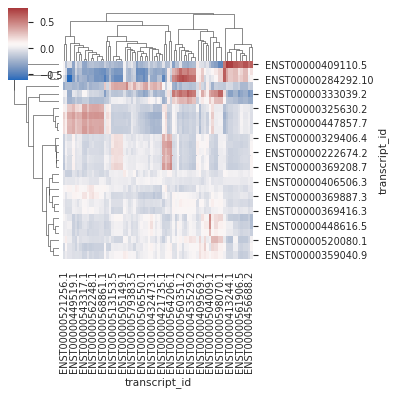

In [ ]:
sns.clustermap(newPairs, cmap='vlag', figsize=[5,5])

In [ ]:
lncSele = lncs[["ENST00000449519.1", "ENST00000528885.1", "ENST00000458615.5", "ENST00000551357.2", "ENST00000510667.5", "ENST00000579383.5", "ENST00000521256.1", "ENST00000432473.1",
"ENST00000543317.1", "ENST00000429008.1", "ENST00000560481.2", "ENST00000510667.5", "ENST00000505149.1", "ENST00000429872.1", "ENST00000552061.1", "ENST00000416502.5",
"ENST00000589360.1", "ENST00000598070.1", "ENST00000578152.5", "ENST00000565053.1", "ENST00000513153.5", "ENST00000409569.2", "ENST00000309874.2", "ENST00000544553.1",
"ENST00000552061.1", "ENST00000502514.5", "ENST00000413904.6", "ENST00000505149.1", "ENST00000506550.1", "ENST00000513358.3", "ENST00000568861.1", "ENST00000326677.9",
"ENST00000528407.1", "ENST00000504009.1", "ENST00000421735.1", "ENST00000640149.1", "ENST00000425185.2", "ENST00000625636.1", "ENST00000321214.2", "ENST00000579805.1",
"ENST00000376617.3", "ENST00000323813.3", "ENST00000561111.2", "ENST00000564206.1", "ENST00000441268.2", "ENST00000567728.1", "ENST00000562248.1", "ENST00000566583.5"
]]

In [ ]:
mergedSele = pd.merge(interest, lncSele, left_on=interest.index, right_on=lncSele.index )

mergedSele = mergedSele.set_index('key_0')
mergedSele.head(1)

transcript_id,ENST00000333039.2,ENST00000505020.1,ENST00000284292.10,ENST00000242462.4,ENST00000448616.5,ENST00000190165.2,ENST00000265404.6,ENST00000374954.3,ENST00000340524.9,ENST00000454853.6,ENST00000359040.9,ENST00000520080.1,ENST00000286380.2,ENST00000369416.3,ENST00000369887.3,ENST00000381627.3,ENST00000406506.3,ENST00000409110.5,ENST00000222674.2,ENST00000217386.2,ENST00000559816.1,ENST00000329406.4,ENST00000369208.7,ENST00000325630.2,ENST00000370445.4,ENST00000447857.7,ENST00000334134.2,ENST00000523217.5,ENST00000449519.1,ENST00000528885.1,ENST00000458615.5,ENST00000551357.2,ENST00000510667.5,ENST00000579383.5,ENST00000521256.1,ENST00000432473.1,ENST00000543317.1,ENST00000429008.1,ENST00000560481.2,ENST00000510667.5,ENST00000505149.1,ENST00000429872.1,ENST00000552061.1,ENST00000416502.5,ENST00000589360.1,ENST00000598070.1,ENST00000578152.5,ENST00000565053.1,ENST00000513153.5,ENST00000409569.2,ENST00000309874.2,ENST00000544553.1,ENST00000552061.1,ENST00000502514.5,ENST00000413904.6,ENST00000505149.1,ENST00000506550.1,ENST00000513358.3,ENST00000568861.1,ENST00000326677.9,ENST00000528407.1,ENST00000504009.1,ENST00000421735.1,ENST00000640149.1,ENST00000425185.2,ENST00000625636.1,ENST00000321214.2,ENST00000579805.1,ENST00000376617.3,ENST00000323813.3,ENST00000561111.2,ENST00000564206.1,ENST00000441268.2,ENST00000567728.1,ENST00000562248.1,ENST00000566583.5
key_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-3226-SM-5N9CT,37.31,2.09,565.7,0.03,0.4,0.08,0.0,0.17,0.0,0.0,0.0,0.67,0.0,0.04,0.26,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.24,-1.066193,1.294415,-0.635243,-0.90717,-0.314814,0.64086,0.562755,-0.707081,-1.004821,-1.358656,-0.164886,-0.314814,-0.237186,-0.999909,-0.937654,-0.48246,0.284331,1.253577,0.230244,0.05498,-0.657745,-0.048115,-0.744807,-1.786046,-0.937654,-1.188282,0.608751,-0.237186,0.445832,-0.334813,-0.910112,0.606034,-0.724496,-0.256056,-0.361511,0.569239,-0.010456,0.195513,-0.884529,0.66751,-0.663496,0.919473,0.071503,-0.430816,-0.625213,-0.76327,-1.132624,0.92213


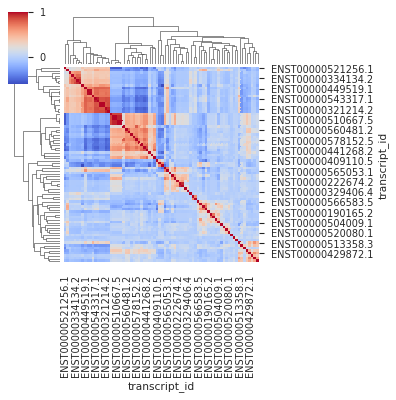

In [ ]:
sns.clustermap(mergedSele.corr(), figsize=[5,5], cmap='coolwarm')

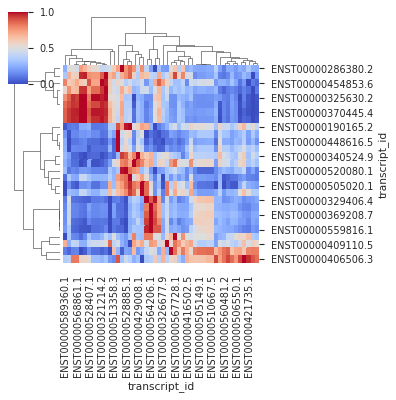

In [ ]:
scorMap = mergedSele.corr()
snewPairs = scorMap.iloc[0:27,28:76]

sns.clustermap(snewPairs, cmap='coolwarm', figsize=[5,5], 
               metric='cosine', 
               standard_scale=[0,1])

In [ ]:
snewPairs.to_csv('snewPairs.csv')

In [ ]:
snewPairs.head()

transcript_id,ENST00000449519.1,ENST00000528885.1,ENST00000458615.5,ENST00000551357.2,ENST00000510667.5,ENST00000579383.5,ENST00000521256.1,ENST00000432473.1,ENST00000543317.1,ENST00000429008.1,ENST00000560481.2,ENST00000510667.5,ENST00000505149.1,ENST00000429872.1,ENST00000552061.1,ENST00000416502.5,ENST00000589360.1,ENST00000598070.1,ENST00000578152.5,ENST00000565053.1,ENST00000513153.5,ENST00000409569.2,ENST00000309874.2,ENST00000544553.1,ENST00000552061.1,ENST00000502514.5,ENST00000413904.6,ENST00000505149.1,ENST00000506550.1,ENST00000513358.3,ENST00000568861.1,ENST00000326677.9,ENST00000528407.1,ENST00000504009.1,ENST00000421735.1,ENST00000640149.1,ENST00000425185.2,ENST00000625636.1,ENST00000321214.2,ENST00000579805.1,ENST00000376617.3,ENST00000323813.3,ENST00000561111.2,ENST00000564206.1,ENST00000441268.2,ENST00000567728.1,ENST00000562248.1,ENST00000566583.5
transcript_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENST00000333039.2,-0.004495,0.471295,-0.208952,-0.211272,-0.154675,-0.138767,0.022883,-0.065404,0.078011,0.240159,-0.298988,-0.154675,-0.141938,-0.150039,-0.075556,-0.182493,-0.252236,0.613925,-0.174866,-0.016720,-0.146579,0.112360,-0.102479,0.129452,-0.075556,0.438068,-0.235148,-0.141938,-0.227844,-0.065023,-0.115537,-0.325541,-0.019345,0.374458,-0.203866,0.175161,-0.184505,-0.082892,-0.074657,-0.016234,0.072849,-0.142359,-0.270486,-0.058589,-0.225594,-0.043825,-0.066393,0.361072
ENST00000505020.1,-0.312884,0.153193,-0.275953,-0.307839,-0.366301,-0.125820,0.048725,-0.225181,-0.313341,0.099986,-0.421565,-0.366301,-0.360407,-0.178453,-0.365598,-0.220415,-0.424240,0.225795,-0.269149,-0.229809,-0.316902,0.134011,-0.383657,0.015827,-0.365598,0.077622,-0.401370,-0.360407,-0.405658,-0.227125,-0.403618,-0.409709,-0.291313,0.031929,-0.260210,0.149719,-0.419014,-0.087998,-0.315475,0.128934,-0.312761,-0.155818,-0.372062,-0.070722,-0.290193,0.022700,-0.312056,0.249139
ENST00000284292.10,-0.333628,0.085316,-0.281359,-0.453457,-0.425024,-0.140898,-0.029916,-0.269591,-0.233101,-0.071520,-0.436246,-0.425024,-0.423286,-0.186029,-0.372862,-0.209980,-0.596526,0.222961,-0.163265,-0.262157,-0.358830,0.151419,-0.363336,0.023844,-0.372862,0.005156,-0.364986,-0.423286,-0.346642,-0.189613,-0.381423,-0.490852,-0.327437,-0.040254,-0.152449,0.145696,-0.391445,-0.109232,-0.288860,0.126871,-0.241547,-0.037453,-0.357691,-0.163733,-0.285915,0.020219,-0.288210,0.274503
ENST00000242462.4,-0.104254,0.193933,0.088900,-0.088599,0.086955,-0.034520,0.055565,0.138899,-0.007988,0.116507,0.075883,0.086955,0.089128,0.007007,-0.026328,0.001999,-0.011073,0.217754,0.057097,-0.104814,0.046654,-0.029098,-0.032081,0.059055,-0.026328,0.145347,0.007592,0.089128,0.033241,0.008619,-0.033156,-0.066423,0.000534,0.476101,0.005933,-0.115978,-0.029794,-0.002853,-0.062629,-0.059210,-0.009839,0.094587,0.067765,-0.064957,0.024541,-0.007635,-0.057406,0.180638
ENST00000448616.5,-0.094787,0.196661,0.056983,-0.076314,0.035944,-0.052983,0.005140,0.186178,-0.025697,0.148955,0.032851,0.035944,0.030867,-0.038930,-0.055385,0.015761,0.034764,0.121566,0.047580,-0.070403,0.012654,-0.024044,-0.041528,0.141084,-0.055385,0.108094,0.019089,0.030867,0.060581,-0.063469,-0.040728,-0.091497,-0.051135,0.451148,0.010506,-0.069158,-0.050562,-0.030763,-0.073553,-0.035174,-0.017816,0.109202,0.033910,-0.023368,-0.002178,-0.013924,-0.063032,0.080218


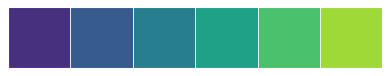

In [ ]:
sns.palplot(sns.color_palette('viridis'))

# Cerebellum

In [ ]:
gtexDF = adata.transpose().to_df()

In [ ]:
colList = pd.read_csv('cereList.csv')

In [ ]:
colList.shape

(561, 2)

In [ ]:
gtexDF.head()

,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2726-SM-5H12C,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3026-SM-5N9CA,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-0011-R10a-SM-DO941,GTEX-1192X-0011-R5a-SM-DNZZA,GTEX-1192X-0011-R6a-SM-DNZZB,GTEX-1192X-0011-R7b-SM-DNZZC,GTEX-1192X-0011-R8b-SM-DO11U,GTEX-1192X-0011-R9b-SM-DO934,GTEX-1192X-3126-SM-5N9BY,GTEX-1192X-3226-SM-5987D,GTEX-11DXW-0011-R1a-SM-DNZZD,GTEX-11DXW-0011-R3b-SM-DNZZE,GTEX-11DXW-0011-R5b-SM-DO11D,GTEX-11DXW-0011-R6a-SM-DO11N,GTEX-11DXW-0011-R7b-SM-DO119,GTEX-11DXW-1026-SM-5H11K,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-0011-R10b-SM-DO12C,GTEX-11DXY-0011-R11a-SM-DNZZN,GTEX-11DXY-0011-R5b-SM-DNZZL,GTEX-11DXY-0011-R6a-SM-DNZZF,GTEX-11DXY-0011-R7a-SM-DO11L,GTEX-11DXY-0011-R8a-SM-DO11M,GTEX-11DXY-3126-SM-5N9BT,GTEX-11DXY-3226-SM-5GIDE,GTEX-11DYG-0011-R10b-SM-DNZZO,GTEX-11DYG-0011-R11a-SM-DNZZP,GTEX-11DYG-0011-R5a-SM-DO928,GTEX-11DYG-0011-R6a-SM-DO936,GTEX-11DYG-0011-R7b-SM-EXUS6,GTEX-11DYG-0011-R8a-SM-DO93F,GTEX-11DYG-2926-SM-5H132,GTEX-11DZ1-0011-R10b-SM-DO943,GTEX-11DZ1-0011-R11b-SM-DO11W,GTEX-11DZ1-0011-R2a-SM-DNZZM,...,GTEX-14PJO-0011-R5a-SM-6AJBZ,GTEX-14PJO-0011-R7a-SM-664NR,GTEX-14PJO-0011-R8a-SM-6AJAL,GTEX-14PJO-0011-R9b-SM-62LE9,GTEX-14PJO-2926-SM-686ZI,GTEX-14PN4-0011-R10b-SM-69LP2,GTEX-14PN4-0011-R11a-SM-686ZW,GTEX-14PN4-0011-R1b-SM-69LP8,GTEX-14PN4-0011-R2a-SM-6EU2Y,GTEX-14PN4-0011-R3b-SM-686ZU,GTEX-14PN4-0011-R4a-SM-686ZT,GTEX-14PN4-0011-R5a-SM-686ZV,GTEX-14PN4-0011-R6b-SM-69LQU,GTEX-14PN4-0011-R7b-SM-69LQQ,GTEX-14PN4-0011-R8a-SM-6EU1H,GTEX-14PN4-0011-R9a-SM-6LLH9,GTEX-14PN4-3026-SM-664O4,GTEX-14PQA-0011-R10a-SM-6AJAA,GTEX-14PQA-0011-R1b-SM-6EU1G,GTEX-14PQA-0011-R3b-SM-69LQO,GTEX-14PQA-0011-R4b-SM-6AJBU,GTEX-14PQA-0011-R5b-SM-6AJC2,GTEX-14PQA-0011-R6b-SM-6AJAM,GTEX-14PQA-0011-R8b-SM-6AJAB,GTEX-15CHQ-0011-R10b-SM-6AJBV,GTEX-15CHQ-0011-R11b-SM-686ZZ,GTEX-15CHQ-0011-R1a-SM-COH27,GTEX-15CHQ-0011-R2b-SM-6AJAD,GTEX-15CHQ-0011-R3b-SM-686ZY,GTEX-15CHQ-0011-R4a-SM-686ZX,GTEX-15CHQ-0011-R5b-SM-6AJAN,GTEX-15CHQ-0011-R6b-SM-69LOX,GTEX-15CHQ-0011-R7b-SM-D4P1Q,GTEX-15CHQ-0011-R8b-SM-CNPO4,GTEX-15CHQ-0011-R9a-SM-6LLHX,GTEX-15DCD-0011-R10b-SM-6LPII,GTEX-15DCD-0011-R11a-SM-D4P1R,GTEX-15DCD-0011-R1b-SM-6LPIJ,GTEX-15DCD-0011-R2b-SM-6LPIE,GTEX-15DCD-0011-R3b-SM-D4P1P
transcript_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENST00000480067.1,-0.804860,1.580066,-0.691698,-0.390275,-0.372331,-0.412971,-0.560380,-0.788799,0.242121,-0.080569,1.956874,-0.193668,2.768280,1.861072,-0.638698,0.880145,-0.594251,0.019875,0.835349,1.336653,-0.635524,-0.520116,-0.789995,-0.267781,1.268809,0.038919,1.250455,1.316064,-0.526347,0.115311,0.543508,-0.284590,0.198171,2.259039,0.367904,0.734344,-0.599940,-0.549778,-0.540825,1.284016,...,0.605096,0.946393,0.423557,4.094781,0.077645,-0.990160,-0.803006,-0.124508,0.437198,-0.762115,0.578324,-0.376806,-0.268272,-0.035934,0.546509,2.354179,-0.303972,-0.671994,2.421869,-0.299021,-0.447599,0.918845,-0.593635,0.002635,0.195838,-0.311849,1.266790,1.749172,0.693024,1.344953,0.490224,-0.729141,1.569633,0.443704,3.029971,0.058211,-0.662102,0.688594,1.151616,0.945436
ENST00000601875.1,-1.129653,-0.116452,-1.367492,0.474550,-1.365653,0.544603,-0.478681,2.700824,0.905135,-0.586285,0.785209,1.125956,-1.231100,-0.363106,0.240733,-1.015189,-1.085471,-0.346023,-0.486537,-0.356220,-1.505274,-1.098215,0.272410,0.288362,0.187181,0.554378,-0.065499,-0.357540,-0.499087,1.292514,-1.103864,0.167518,1.103461,-1.136496,2.313985,-0.982354,-0.339730,-1.047290,-1.491371,0.946053,...,1.252228,0.892484,0.712228,0.298849,0.802633,-1.034570,2.996299,-0.968098,2.431631,-1.026885,-0.976321,1.649322,-1.040926,0.784446,1.663441,0.861640,-0.291150,0.199363,0.077856,-0.994187,0.693575,0.378501,-1.098692,-0.989980,0.048973,0.119682,-0.059678,2.165333,1.273909,0.084443,-1.173097,0.614526,-0.056653,0.580467,-0.219414,1.415027,0.697544,0.794294,-1.036437,1.160111
ENST00000523683.1,0.061507,1.115123,0.358722,1.232747,-0.798404,0.498425,

In [ ]:
a = list(colList.SAMPID)

In [ ]:
b = []
for i in a:
  if i in list(gtexDF.columns):
    b.append(i)

cellExt = gtexDF[b]

In [ ]:
tiss = cellExt.transpose()

In [ ]:
#retain the same columns

tissueMRNA = pd.read_csv('cellMRNA', sep='\t', index_col='transcript_id')
tissExt =  tissueMRNA[[#'transcript_id',
                       'GTEX-1117F-3226-SM-5N9CT',
 'GTEX-111FC-3126-SM-5GZZ2',
 'GTEX-111FC-3326-SM-5GZYV',
 'GTEX-1128S-2726-SM-5H12C',
 'GTEX-1128S-2826-SM-5N9DI',
 'GTEX-117XS-3026-SM-5N9CA',
 'GTEX-117XS-3126-SM-5GIDP',
 'GTEX-1192X-0011-R10a-SM-DO941',
 'GTEX-1192X-0011-R5a-SM-DNZZA',
 'GTEX-1192X-0011-R6a-SM-DNZZB',
 'GTEX-1192X-0011-R7b-SM-DNZZC',
 'GTEX-1192X-0011-R8b-SM-DO11U',
 'GTEX-1192X-0011-R9b-SM-DO934',
 'GTEX-1192X-3126-SM-5N9BY',
 'GTEX-1192X-3226-SM-5987D',
 'GTEX-11DXW-0011-R1a-SM-DNZZD',
 'GTEX-11DXW-0011-R3b-SM-DNZZE',
 'GTEX-11DXW-0011-R5b-SM-DO11D',
 'GTEX-11DXW-0011-R6a-SM-DO11N',
 'GTEX-11DXW-0011-R7b-SM-DO119',
 'GTEX-11DXW-1026-SM-5H11K',
 'GTEX-11DXW-1126-SM-5H12Q',
 'GTEX-11DXY-0011-R10b-SM-DO12C',
 'GTEX-11DXY-0011-R11a-SM-DNZZN',
 'GTEX-11DXY-0011-R5b-SM-DNZZL',
 'GTEX-11DXY-0011-R6a-SM-DNZZF',
 'GTEX-11DXY-0011-R7a-SM-DO11L',
 'GTEX-11DXY-0011-R8a-SM-DO11M',
 'GTEX-11DXY-3126-SM-5N9BT',
 'GTEX-11DXY-3226-SM-5GIDE',
 'GTEX-11DYG-0011-R10b-SM-DNZZO',
 'GTEX-11DYG-0011-R11a-SM-DNZZP',
 'GTEX-11DYG-0011-R5a-SM-DO928',
 'GTEX-11DYG-0011-R6a-SM-DO936',
 'GTEX-11DYG-0011-R7b-SM-EXUS6',
 'GTEX-11DYG-0011-R8a-SM-DO93F',
 'GTEX-11DYG-2926-SM-5H132',
 'GTEX-11DZ1-0011-R10b-SM-DO943',
 'GTEX-11DZ1-0011-R11b-SM-DO11W',
 'GTEX-11DZ1-0011-R2a-SM-DNZZM',
 'GTEX-11DZ1-0011-R3a-SM-DNZYY',
 'GTEX-11DZ1-0011-R5a-SM-DO11J',
 'GTEX-11DZ1-0011-R6b-SM-DNZZG',
 'GTEX-11DZ1-0011-R7a-SM-DNZZH',
 'GTEX-11DZ1-0011-R8b-SM-DNZZI',
 'GTEX-11DZ1-0011-R9a-SM-DO933',
 'GTEX-11DZ1-2926-SM-5A5KI',
 'GTEX-11EI6-0011-R10a-SM-DO93R',
 'GTEX-11EI6-0011-R11a-SM-DO11V',
 'GTEX-11EI6-0011-R1a-SM-DO93L',
 'GTEX-11EI6-0011-R8a-SM-DO93M',
 'GTEX-11EI6-2926-SM-5985U',
 'GTEX-11EI6-3026-SM-5GZZO',
 'GTEX-11EMC-0011-R10a-SM-DNZZJ',
 'GTEX-11EMC-0011-R11b-SM-DNZZK',
 'GTEX-11EMC-0011-R2b-SM-DO114',
 'GTEX-11EMC-0011-R8b-SM-DO91Z',
 'GTEX-11EMC-0011-R9b-SM-DO921',
 'GTEX-11EMC-3226-SM-5EGKW',
 'GTEX-11EMC-3326-SM-5P9JH',
 'GTEX-11GS4-0011-R1a-SM-DO129',
 'GTEX-11GS4-0011-R2a-SM-DO942',
 'GTEX-11GS4-3126-SM-5A5LH',
 'GTEX-11GSO-0011-R1b-SM-57WD3',
 'GTEX-11GSO-0011-R2a-SM-57WDF',
 'GTEX-11GSO-0011-R3b-SM-57WB2',
 'GTEX-11GSO-2926-SM-5HL73',
 'GTEX-11GSO-3026-SM-5Q5AL',
 'GTEX-11GSP-0011-R10a-SM-5NQ7J',
 'GTEX-11GSP-0011-R11b-SM-5NQ7V',
 'GTEX-11GSP-0011-R1a-SM-9QEJ3',
 'GTEX-11GSP-0011-R2b-SM-9QEGE',
 'GTEX-11GSP-0011-R3a-SM-9QEGF',
 'GTEX-11GSP-0011-R5a-SM-57WBE',
 'GTEX-11GSP-0011-R6b-SM-57WBQ',
 'GTEX-11GSP-0011-R7b-SM-57WC3',
 'GTEX-11GSP-0011-R8b-SM-5NQ79',
 'GTEX-11GSP-0011-R9b-SM-5NQ77',
 'GTEX-11GSP-3126-SM-5A5LL',
 'GTEX-11GSP-3226-SM-5986O',
 'GTEX-11H98-0011-R10b-SM-5NQ98',
 'GTEX-11H98-0011-R11b-SM-5NQ6U',
 'GTEX-11H98-0011-R5b-SM-57WCF',
 'GTEX-11H98-0011-R8a-SM-5NQ8V',
 'GTEX-11NUK-0011-R4a-SM-DO12B',
 'GTEX-11NUK-0011-R5a-SM-DO93N',
 'GTEX-11NUK-0011-R6a-SM-DO93O',
 'GTEX-11NUK-0011-R7a-SM-DO93P',
 'GTEX-11NUK-2926-SM-5A5MD',
 'GTEX-11NUK-3026-SM-5986K',
 'GTEX-11NV4-0011-R5a-SM-5NQ88',
 'GTEX-11NV4-0011-R6a-SM-57WD5',
 'GTEX-11NV4-0011-R7a-SM-57WDH',
 'GTEX-11NV4-2126-SM-5N9DS',
 'GTEX-11NV4-2226-SM-5BC4T',
 'GTEX-11O72-0011-R5a-SM-DO922',
 'GTEX-11O72-0011-R6a-SM-DNZZQ',
 'GTEX-11O72-2826-SM-5HL6W',
 'GTEX-11O72-2926-SM-5BC4V',
 'GTEX-11OC5-0626-SM-5HL6M',
 'GTEX-11OC5-0726-SM-5P9JK',
 'GTEX-11OF3-0011-R11a-SM-57WCR',
 'GTEX-11OF3-0011-R5a-SM-57WB4',
 'GTEX-11OF3-0011-R6b-SM-57WBG',
 'GTEX-11OF3-0011-R7a-SM-57WCG',
 'GTEX-11OF3-0011-R8b-SM-57WCS',
 'GTEX-11OF3-2926-SM-5HL78',
 'GTEX-11ONC-0011-R1a-SM-57WD4',
 'GTEX-11ONC-0011-R4b-SM-DO93H',
 'GTEX-11ONC-0011-R5b-SM-DO93I',
 'GTEX-11ONC-0011-R6a-SM-DO12A',
 'GTEX-11ONC-0011-R7b-SM-DO93J',
 'GTEX-11ONC-0011-R8b-SM-5NQ87',
 'GTEX-11ONC-0011-R9b-SM-5NQ8J',
 'GTEX-11ONC-2926-SM-5P9JM',
 'GTEX-11ONC-3026-SM-5985W',
 'GTEX-11PRG-0011-R10b-SM-DO93G',
 'GTEX-11PRG-0011-R11b-SM-DNZZY',
 'GTEX-11PRG-0011-R2a-SM-69LQ5',
 'GTEX-11PRG-0011-R4a-SM-DNZZR',
 'GTEX-11PRG-0011-R5b-SM-DNZZS',
 'GTEX-11PRG-0011-R6b-SM-DO923',
 'GTEX-11PRG-0011-R7a-SM-DNZZT',
 'GTEX-11PRG-2826-SM-5BC54',
 'GTEX-11PRG-2926-SM-5987A',
 'GTEX-11TTK-0011-R10b-SM-DO925',
 'GTEX-11TTK-0011-R11b-SM-DO112',
 'GTEX-11TTK-0011-R4a-SM-DNZZU',
 'GTEX-11TTK-0011-R5a-SM-DNZZV',
 'GTEX-11TTK-0011-R6b-SM-DNZZW',
 'GTEX-11TTK-0011-R7b-SM-DNZZZ',
 'GTEX-11TTK-0011-R8b-SM-DO111',
 'GTEX-11TTK-2826-SM-5GU5K',
 'GTEX-11TTK-2926-SM-5PNYP',
 'GTEX-11TUW-0011-R10a-SM-DO924',
 'GTEX-11TUW-0011-R1a-SM-DO92S',
 'GTEX-11TUW-0011-R2b-SM-DO92T',
 'GTEX-11UD1-0011-R1b-SM-5BC7D',
 'GTEX-11UD1-0011-R2b-SM-5BC6O',
 'GTEX-11UD1-0011-R3a-SM-5BC6S',
 'GTEX-11UD1-0011-R5b-SM-5P9FP',
 'GTEX-11UD2-0011-R9b-SM-DO926',
 'GTEX-11WQC-0011-R10a-SM-57WCT',
 'GTEX-11WQC-0011-R11b-SM-57WD6',
 'GTEX-11WQC-0011-R1b-SM-DO932',
 'GTEX-11WQC-0011-R2a-SM-DO927',
 'GTEX-11WQC-0011-R3a-SM-DO11T',
 'GTEX-11WQC-0011-R5a-SM-5BC74',
 'GTEX-11WQC-0011-R6a-SM-5BC77',
 'GTEX-11WQC-0011-R7b-SM-5BC7A',
 'GTEX-11WQC-0011-R8b-SM-57WCH',
 'GTEX-11WQK-0011-R10a-SM-5BC6R',
 'GTEX-11WQK-0011-R3b-SM-DO93K',
 'GTEX-11WQK-0011-R8a-SM-5BC7C',
 'GTEX-11WQK-0011-R9b-SM-5BC6N',
 'GTEX-11WQK-3026-SM-5EQL6',
 'GTEX-11ZTS-0011-R10a-SM-DO93S',
 'GTEX-11ZTS-0011-R11a-SM-DO113',
 'GTEX-11ZTS-0011-R1a-SM-5BC71',
 'GTEX-11ZTS-0011-R2b-SM-5BC75',
 'GTEX-11ZTS-0011-R3a-SM-5BC78',
 'GTEX-11ZTS-0011-R8a-SM-57WDI',
 'GTEX-11ZTS-0011-R9b-SM-DO93Q',
 'GTEX-11ZTS-3226-SM-5EGID',
 'GTEX-11ZU8-0011-R4a-SM-5BC6Y',
 'GTEX-11ZUS-0011-R11b-SM-5BC7B',
 'GTEX-11ZUS-0011-R8a-SM-5BC73',
 'GTEX-11ZUS-0011-R9b-SM-5BC76',
 'GTEX-11ZUS-2826-SM-5EQKW',
 'GTEX-11ZUS-2926-SM-5FQSL',
 'GTEX-11ZVC-0011-R1b-SM-5BC6M',
 'GTEX-11ZVC-0011-R3a-SM-5BC6V',
 'GTEX-11ZVC-0011-R4a-SM-5BC6Z',
 'GTEX-11ZVC-0011-R9a-SM-57WC5',
 'GTEX-11ZVC-3026-SM-59HJM',
 'GTEX-12126-0011-R10b-SM-5BC6T',
 'GTEX-12126-0011-R11a-SM-5BC6X',
 'GTEX-12126-0011-R9b-SM-5BC6P',
 'GTEX-12126-0926-SM-5FQTW',
 'GTEX-12126-1026-SM-5P9JJ',
 'GTEX-1212Z-0011-R1b-SM-5BC72',
 'GTEX-12584-0011-R6a-SM-5NQ7C',
 'GTEX-1269C-3126-SM-5EGI6',
 'GTEX-12WSA-0011-R10b-SM-5P9ET',
 'GTEX-12WSA-0011-R2a-SM-57WDK',
 'GTEX-12WSA-0011-R4a-SM-57WB7',
 'GTEX-12WSA-0011-R5b-SM-5GU5I',
 'GTEX-12WSA-0011-R7b-SM-5GU5U',
 'GTEX-12WSA-0011-R8a-SM-5P9EX',
 'GTEX-12WSA-2926-SM-5EQ4D',
 'GTEX-12WSC-0011-R10a-SM-5GU57',
 'GTEX-12WSC-0011-R11a-SM-5GU5J',
 'GTEX-12WSC-0011-R3a-SM-5P9F1',
 'GTEX-12WSC-0011-R5b-SM-5CVNS',
 'GTEX-12WSC-0011-R6b-SM-5LU99',
 'GTEX-12WSC-0011-R7b-SM-5LU9L',
 'GTEX-12WSC-0011-R9a-SM-5GU4U',
 'GTEX-12WSC-2926-SM-5BC5Z',
 'GTEX-12WSC-3026-SM-5GCNF',
 'GTEX-12WSD-0011-R11a-SM-9OSVC',
 'GTEX-12WSD-0011-R1b-SM-5LZVY',
 'GTEX-12WSD-0011-R2a-SM-5LZWB',
 'GTEX-12WSD-0011-R3b-SM-5LZWN',
 'GTEX-12WSD-0011-R4b-SM-5LZUA',
 'GTEX-12WSD-0011-R5b-SM-5CVNG',
 'GTEX-12WSD-0011-R6b-SM-5P9JU',
 'GTEX-12WSD-0011-R7b-SM-5PNWE',
 'GTEX-12WSD-0011-R9a-SM-5GU6W',
 'GTEX-12WSD-3026-SM-5LZU7',
 'GTEX-12WSD-3126-SM-5HL7P',
 'GTEX-12WSE-0011-R10b-SM-5P9JV',
 'GTEX-12WSE-0011-R11b-SM-5P9JW',
 'GTEX-12WSE-0011-R1b-SM-5GU4V',
 'GTEX-12WSE-0011-R6b-SM-5LZV5',
 'GTEX-12WSE-0011-R7a-SM-5PNWF',
 'GTEX-12WSE-2926-SM-5RQJ9',
 'GTEX-12WSF-0011-R10a-SM-5LZVH',
 'GTEX-12WSF-0011-R11a-SM-5LZVT',
 'GTEX-12WSF-0011-R1a-SM-5DUVI',
 'GTEX-12WSF-0011-R2a-SM-5DUVU',
 'GTEX-12WSF-0011-R3a-SM-5DUW7',
 'GTEX-12WSF-0011-R4b-SM-5HL88',
 'GTEX-12WSF-0011-R5a-SM-5HL8K',
 'GTEX-12WSF-0011-R6b-SM-5HL8W',
 'GTEX-12WSF-0011-R7b-SM-5HL99',
 'GTEX-12WSF-3126-SM-6M478',
 'GTEX-12WSH-0011-R10a-SM-5LZUS',
 'GTEX-12WSH-0011-R11a-SM-5LZVM',
 'GTEX-12WSH-0011-R1a-SM-5GU5V',
 'GTEX-12WSH-0011-R2a-SM-5GU68',
 'GTEX-12WSH-0011-R4a-SM-5GU6K',
 'GTEX-12WSH-0011-R5b-SM-5P9F3',
 'GTEX-12WSH-0011-R6b-SM-5P9F4',
 'GTEX-12WSH-0011-R9b-SM-5LZUG',
 'GTEX-12WSH-3026-SM-5CVNI',
 'GTEX-12WSH-3126-SM-5LZW8',
 'GTEX-12WSI-0011-R11b-SM-5P9EZ',
 'GTEX-12WSI-0011-R7b-SM-5GU78',
 'GTEX-12WSM-0011-R10a-SM-5DUWV',
 'GTEX-12WSM-0011-R11a-SM-5DUX8',
 'GTEX-12WSM-0011-R1a-SM-5LZW6',
 'GTEX-12WSM-0011-R3b-SM-5LZWI',
 'GTEX-12WSM-0011-R5a-SM-5EQ4Y',
 'GTEX-12WSM-0011-R6b-SM-5EQ6N',
 'GTEX-12WSM-0011-R7b-SM-5EGLD',
 'GTEX-12WSM-0011-R8a-SM-5DUWJ',
 'GTEX-12WSM-2126-SM-5GCOC',
 'GTEX-12ZZW-0011-R10b-SM-5HL9X',
 'GTEX-12ZZW-0011-R3a-SM-5DUWW',
 'GTEX-12ZZW-0011-R4a-SM-5DUX9',
 'GTEX-12ZZW-0011-R5a-SM-5DUVN',
 'GTEX-12ZZW-0011-R6a-SM-5DUVZ',
 'GTEX-12ZZW-0011-R7a-SM-5DUWC',
 'GTEX-12ZZW-2926-SM-5LZUP',
 'GTEX-12ZZX-0011-R10b-SM-5DUWK',
 'GTEX-12ZZX-0011-R11a-SM-5DUVJ',
 'GTEX-12ZZX-0011-R1a-SM-5EQ6B',
 'GTEX-12ZZX-0011-R2a-SM-5EGLG',
 'GTEX-12ZZX-0011-R3b-SM-5EGLH',
 'GTEX-12ZZX-0011-R5a-SM-5HL89',
 'GTEX-12ZZX-0011-R6a-SM-5HL8L',
 'GTEX-12ZZX-0011-R7b-SM-5DUVV',
 'GTEX-12ZZX-0011-R8a-SM-5DUW8',
 'GTEX-12ZZX-2826-SM-5BC6K',
 'GTEX-12ZZX-2926-SM-5GCOQ',
 'GTEX-12ZZY-0011-R10b-SM-5HL7W',
 'GTEX-12ZZY-0011-R5a-SM-5EGL9',
 'GTEX-12ZZY-0011-R6b-SM-5EGLA',
 'GTEX-12ZZY-0011-R7a-SM-5EGLB',
 'GTEX-12ZZY-2926-SM-5DUXO',
 'GTEX-12ZZY-3026-SM-5GCOU',
 'GTEX-12ZZZ-0011-R10a-SM-5P9HC',
 'GTEX-12ZZZ-0011-R11a-SM-5EGLC',
 'GTEX-12ZZZ-0011-R3b-SM-5DUXK',
 'GTEX-12ZZZ-0011-R4b-SM-5DUV7',
 'GTEX-12ZZZ-0011-R5a-SM-5EQ4M',
 'GTEX-12ZZZ-0011-R6b-SM-5EQ5B',
 'GTEX-12ZZZ-0011-R7b-SM-5EGLE',
 'GTEX-12ZZZ-3026-SM-5BC67',
 'GTEX-12ZZZ-3126-SM-5LZU6',
 'GTEX-13112-0011-R1b-SM-5HL7K',
 'GTEX-13112-0011-R3b-SM-5HL9L',
 'GTEX-13112-0011-R4b-SM-5DUXL',
 'GTEX-13112-0011-R5b-SM-5DUV8',
 'GTEX-13112-0011-R6b-SM-5DUVK',
 'GTEX-13112-0011-R7b-SM-5DUVW',
 'GTEX-13112-0011-R8b-SM-664OV',
 'GTEX-13112-2926-SM-5DUWT',
 'GTEX-1313W-0011-R10b-SM-5DUXA',
 'GTEX-1313W-0011-R11a-SM-5DUXN',
 'GTEX-1313W-0011-R1b-SM-5EQ4A',
 'GTEX-1313W-0011-R2a-SM-5EGLF',
 'GTEX-1313W-0011-R3a-SM-5EGLI',
 'GTEX-1313W-0011-R4b-SM-5KLZV',
 'GTEX-1313W-0011-R5b-SM-5L3EP',
 'GTEX-1313W-0011-R6a-SM-5K7XO',
 'GTEX-1313W-0011-R7b-SM-5DUWL',
 'GTEX-1313W-0011-R8a-SM-5DUVM',
 'GTEX-1313W-3026-SM-5LZUZ',
 'GTEX-1313W-3126-SM-5LZUI',
 'GTEX-131XH-0011-R10a-SM-5EGLJ',
 'GTEX-131XH-0011-R11a-SM-5EGLN',
 'GTEX-131XH-0011-R1a-SM-5DUWA',
 'GTEX-131XH-0011-R2b-SM-5DUVY',
 'GTEX-131XH-0011-R3b-SM-5DUWM',
 'GTEX-131XH-0011-R4b-SM-5DUWB',
 'GTEX-131XH-0011-R6a-SM-5KM2G',
 'GTEX-131XH-0011-R8a-SM-5EGLL',
 'GTEX-131XH-2926-SM-5LZU4',
 'GTEX-131XW-0011-R10a-SM-5DUVA',
 'GTEX-131XW-0011-R11a-SM-5DUV9',
 'GTEX-131XW-0011-R6b-SM-5K7XY',
 'GTEX-131XW-0011-R8a-SM-5DUWY',
 'GTEX-131XW-0011-R9a-SM-5N9EO',
 'GTEX-131XW-3126-SM-5LZUC',
 'GTEX-131YS-0011-R10b-SM-5EQ5N',
 'GTEX-131YS-0011-R11b-SM-5EGLM',
 'GTEX-131YS-0011-R1a-SM-5DUXC',
 'GTEX-131YS-0011-R3b-SM-5DUXB',
 'GTEX-131YS-0011-R4a-SM-5DUVL',
 'GTEX-131YS-0011-R5b-SM-5K7YB',
 'GTEX-131YS-0011-R7a-SM-5IJDA',
 'GTEX-131YS-0011-R9b-SM-5EQLY',
 'GTEX-131YS-3026-SM-5EGHY',
 'GTEX-131YS-3126-SM-5KLYT',
 'GTEX-132Q8-0011-R10b-SM-5DUWZ',
 'GTEX-132Q8-0011-R11b-SM-5DUW9',
 'GTEX-132Q8-0011-R1a-SM-5EGLK',
 'GTEX-132Q8-0011-R2b-SM-5EQ5Z',
 'GTEX-132Q8-0011-R5a-SM-5IJDM',
 'GTEX-132Q8-0011-R6a-SM-5K7YN',
 'GTEX-132Q8-0011-R7b-SM-5N9F1',
 'GTEX-132Q8-0011-R8b-SM-5DUWX',
 'GTEX-132Q8-2926-SM-5IFFP',
 'GTEX-132Q8-3026-SM-5PNVG',
 'GTEX-1399T-0011-R11a-SM-5J2O1',
 'GTEX-1399T-0011-R1b-SM-5DUWN',
 'GTEX-1399T-0011-R2b-SM-5DUXM',
 'GTEX-1399T-0011-R4b-SM-5DUVX',
 'GTEX-1399T-0011-R5b-SM-5IJDK',
 'GTEX-1399T-0011-R6b-SM-5K7YL',
 'GTEX-1399T-0011-R8b-SM-5IJD8',
 'GTEX-1399T-3026-SM-5KLZC',
 'GTEX-1399T-3126-SM-5IJFS',
 'GTEX-139T4-0011-R9b-SM-5HL6S',
 'GTEX-139T8-0011-R1a-SM-5HL75',
 'GTEX-139T8-0011-R3b-SM-5HL4R',
 'GTEX-139T8-0011-R4a-SM-5HL54',
 'GTEX-139T8-0011-R5b-SM-5J1MO',
 'GTEX-139T8-1026-SM-5J2MC',
 'GTEX-139TS-0011-R10a-SM-5K7TU',
 'GTEX-139TS-0011-R2b-SM-5J1MX',
 'GTEX-139TS-0011-R5b-SM-5J2MZ',
 'GTEX-139TS-0011-R6a-SM-5J2OB',
 'GTEX-139TS-0011-R7a-SM-5K7X7',
 'GTEX-139TS-0011-R8a-SM-5J1NP',
 'GTEX-139TS-3126-SM-5LZWX',
 'GTEX-139TT-0011-R11b-SM-5LZV1',
 'GTEX-139TT-0011-R1a-SM-5LZVD',
 'GTEX-139TT-0011-R3b-SM-5K7VL',
 'GTEX-139TT-0011-R5b-SM-5K7W8',
 'GTEX-139TT-0011-R6b-SM-5J2ON',
 'GTEX-139TT-0011-R7b-SM-5J2MN',
 'GTEX-139TT-2626-SM-5LZUB',
 'GTEX-139TU-0011-R5b-SM-5L3E1',
 'GTEX-139UW-0011-R11a-SM-5IJGN',
 'GTEX-139UW-0011-R9b-SM-5LZYT',
 'GTEX-13CF2-0011-R11b-SM-5LZXO',
 'GTEX-13CF2-0011-R1a-SM-5LZY1',
 'GTEX-13CF2-0011-R2a-SM-5L3DC',
 'GTEX-13CF2-0011-R3b-SM-5LZZ6',
 'GTEX-13CF2-0011-R5a-SM-5LZWS',
 'GTEX-13CF2-0011-R7b-SM-5K7UV',
 'GTEX-13CF2-0011-R8b-SM-5IJCX',
 'GTEX-13CF2-3026-SM-5IFFX',
 'GTEX-13CIG-0011-R3b-SM-5K7XF',
 'GTEX-13CIG-0011-R5b-SM-5L3F2',
 'GTEX-13CIG-0011-R8b-SM-5LZX5',
 'GTEX-13CIG-0011-R9a-SM-5K7VU',
 'GTEX-13CZV-0011-R10b-SM-5LZYD',
 'GTEX-13CZV-0011-R11b-SM-5N9FN',
 'GTEX-13CZV-0011-R3a-SM-5KM27',
 'GTEX-13CZV-0011-R4b-SM-5J2NY',
 'GTEX-13CZV-0011-R5a-SM-5K7XA',
 'GTEX-13CZV-0011-R7b-SM-5LZXH',
 'GTEX-13CZV-0011-R9a-SM-5LZXT',
 'GTEX-13FHO-0011-R10b-SM-5J2MM',
 'GTEX-13FHO-0011-R11b-SM-5LZYQ',
 'GTEX-13FHO-0011-R1b-SM-5KLZG',
 'GTEX-13FHO-0011-R3b-SM-5K7YA',
 'GTEX-13FHO-0011-R5b-SM-5LZZ3',
 'GTEX-13FHO-0011-R6b-SM-5LZX1',
 'GTEX-13FHO-0011-R7b-SM-5LZXD',
 'GTEX-13FHO-2926-SM-5L3ES',
 'GTEX-13FHO-3026-SM-5J1O9',
 'GTEX-13FHP-0011-R11b-SM-5LZXP',
 'GTEX-13FHP-0011-R1b-SM-5K7XL',
 'GTEX-13FHP-0011-R5b-SM-5LZY2',
 'GTEX-13FHP-0011-R6b-SM-5LZY6',
 'GTEX-13FHP-0011-R7b-SM-5LZYI',
 'GTEX-13FHP-2926-SM-5IJG9',
 'GTEX-13FHP-3026-SM-5IJBS',
 'GTEX-13FLV-0011-R10b-SM-5LZZ2',
 'GTEX-13FLV-0011-R11a-SM-5LZZ7',
 'GTEX-13FLV-0011-R3b-SM-5LZYP',
 'GTEX-13FLV-0011-R4a-SM-5LZYU',
 'GTEX-13FLV-0011-R5a-SM-5LZWT',
 'GTEX-13FLV-0011-R6a-SM-5KLZ4',
 'GTEX-13FLV-0011-R7b-SM-5K7WW',
 'GTEX-13FLV-0011-R8a-SM-5LZZE',
 'GTEX-13FLV-0011-R9b-SM-5L3DA',
 'GTEX-13FLW-0011-R10b-SM-5LZZF',
 'GTEX-13FLW-0011-R1b-SM-5LZX2',
 'GTEX-13FLW-0011-R5a-SM-5LZX6',
 'GTEX-13FLW-0011-R6b-SM-5L3EN',
 'GTEX-13FLW-0011-R7b-SM-5L3EZ',
 'GTEX-13FLW-0011-R8b-SM-5J1MZ',
 'GTEX-13FLW-1426-SM-5K7YE',
 'GTEX-13FTY-0011-R11a-SM-5IJEA',
 'GTEX-13FTY-0011-R1a-SM-5LZXE',
 'GTEX-13FTY-0011-R9b-SM-5KM2U',
 'GTEX-13FTZ-0011-R10b-SM-5KLZS',
 'GTEX-13FXS-0011-R10a-SM-5J2MA',
 'GTEX-13FXS-0011-R11a-SM-5L3DM',
 'GTEX-13FXS-0011-R1a-SM-5K7U6',
 'GTEX-13FXS-0011-R2b-SM-5K7XX',
 'GTEX-13FXS-0011-R5b-SM-5LZYE',
 'GTEX-13FXS-0011-R6b-SM-5L3F7',
 'GTEX-13FXS-0011-R7a-SM-5L3FC',
 'GTEX-13FXS-0011-R8a-SM-5J1MN',
 'GTEX-13FXS-0011-R9a-SM-5K7UI',
 'GTEX-13FXS-3026-SM-5LZYO',
 'GTEX-13FXS-3126-SM-5J2NN',
 'GTEX-13G51-0011-R10b-SM-5LZYF',
 'GTEX-13G51-0011-R11b-SM-5J2NE',
 'GTEX-13G51-0011-R1a-SM-5LZYR',
 'GTEX-13G51-0011-R2b-SM-5LZXS',
 'GTEX-13G51-0011-R5a-SM-5L3EB',
 'GTEX-13G51-0011-R6b-SM-5LZX4',
 'GTEX-13G51-0011-R7b-SM-5LZXG',
 'GTEX-13G51-0011-R8b-SM-5LZZ4',
 'GTEX-13G51-3026-SM-5IJB8',
 'GTEX-13G51-3126-SM-5IJG7',
 'GTEX-13IVO-0011-R10a-SM-5LZY3',
 'GTEX-13IVO-0011-R3b-SM-5IJBJ',
 'GTEX-13IVO-0011-R6b-SM-5K7X9',
 'GTEX-13IVO-0011-R8a-SM-5L3DY',
 'GTEX-13IVO-2926-SM-5L3CZ',
 'GTEX-13JUV-0011-R10b-SM-5LZXR',
 'GTEX-13JUV-0011-R11a-SM-5LZYH',
 'GTEX-13JUV-0011-R1a-SM-5LZY4',
 'GTEX-13JUV-0011-R5a-SM-5LZY5',
 'GTEX-13JUV-0011-R6b-SM-5LZYG',
 'GTEX-13JUV-0011-R7b-SM-5LZZG',
 'GTEX-13JUV-0011-R9a-SM-5LZX3',
 'GTEX-13JUV-2926-SM-5LZX7',
 'GTEX-13JUV-3026-SM-5K7WX',
 'GTEX-13JVG-0011-R10b-SM-5KM2P',
 'GTEX-13JVG-0011-R11a-SM-5KM53',
 'GTEX-13JVG-0011-R1a-SM-5KM32',
 'GTEX-13JVG-0011-R3b-SM-5LZXF',
 'GTEX-13JVG-0011-R4a-SM-5MR4C',
 'GTEX-13JVG-0011-R5a-SM-5MR4O',
 'GTEX-13JVG-0011-R6a-SM-5MR3E',
 'GTEX-13JVG-0011-R7b-SM-5MR3Q',
 'GTEX-13JVG-0011-R8a-SM-5KM3E',
 'GTEX-13JVG-3126-SM-5L3FH',
 'GTEX-13JVG-3226-SM-5IJGJ',
 'GTEX-13N1W-0011-R10b-SM-5MR4H',
 'GTEX-13N1W-0011-R1b-SM-5MR4T',
 'GTEX-13N1W-0011-R3a-SM-5MR5E',
 'GTEX-13N1W-0011-R4a-SM-5MR52',
 'GTEX-13N1W-0011-R5b-SM-5MR5Q',
 'GTEX-13N1W-0011-R6a-SM-5MR43',
 'GTEX-13N1W-0011-R7b-SM-5MR4F',
 'GTEX-13N1W-0011-R8a-SM-5MR56',
 'GTEX-13N1W-0011-R9b-SM-5MR4R',
 'GTEX-13N2G-0011-R10a-SM-5MR34',
 'GTEX-13N2G-0011-R11a-SM-5MR3F',
 'GTEX-13N2G-0011-R1b-SM-5MR3G',
 'GTEX-13N2G-0011-R2a-SM-5MR4Q',
 'GTEX-13N2G-0011-R3b-SM-5MR5G',
 'GTEX-13N2G-0011-R4b-SM-5MR54',
 'GTEX-13N2G-0011-R6b-SM-5MR3P',
 'GTEX-13N2G-0011-R7a-SM-5MR42',
 'GTEX-13N2G-0011-R9b-SM-5MR4E',
 'GTEX-13N2G-3126-SM-5IJGL',
 'GTEX-13NYB-0011-R10a-SM-5KM43',
 'GTEX-13NYB-0011-R11a-SM-5KM3Q',
 'GTEX-13NYB-0011-R1b-SM-5KM4F',
 'GTEX-13NYB-0011-R2a-SM-5MR3C',
 'GTEX-13NYB-0011-R3b-SM-A9SM4',
 'GTEX-13NYB-0011-R4b-SM-9QEGJ',
 'GTEX-13NYB-0011-R5a-SM-5MR45',
 'GTEX-13NYB-0011-R6b-SM-5MR51',
 'GTEX-13NYB-0011-R7a-SM-5MR5D',
 'GTEX-13NYB-0011-R8a-SM-5KM4R',
 'GTEX-13NYB-0011-R9b-SM-5MR5P',
 'GTEX-13NYB-3026-SM-5IJD7',
 'GTEX-13NYB-3226-SM-5J2ND',
 'GTEX-13NYC-2826-SM-5K7WR',
 'GTEX-13NYS-0011-R10a-SM-5MR4S',
 'GTEX-13NYS-0011-R11b-SM-5MR4P',
 'GTEX-13NYS-0011-R1b-SM-5MR55',
 'GTEX-13NYS-0011-R2b-SM-5MR4G',
 'GTEX-13NYS-0011-R3b-SM-5MR41',
 'GTEX-13NYS-0011-R4b-SM-5MR3O',
 'GTEX-13NYS-0011-R5a-SM-5MR4D',
 'GTEX-13NYS-0011-R6b-SM-5MR3R',
 'GTEX-13NYS-0011-R8a-SM-5MR5H',
 'GTEX-13NYS-0011-R9b-SM-5MR44',
 'GTEX-13NYS-3126-SM-5KLYV',
 'GTEX-13NZ8-0011-R1b-SM-5KM3V',
 'GTEX-13NZ8-0011-R8b-SM-5KM48',
 'GTEX-13NZA-0011-R10b-SM-5KM54',
 'GTEX-13NZA-0011-R11b-SM-5KM4W',
 'GTEX-13NZA-0011-R1b-SM-5LUAF',
 'GTEX-13NZA-0011-R5b-SM-5KM4K',
 'GTEX-13NZA-0011-R8b-SM-5KM2Q',
 'GTEX-13NZA-0011-R9b-SM-5MR5I',
 'GTEX-13O1R-0011-R9b-SM-5KM33',
 'GTEX-13O3O-0011-R10a-SM-5LUA9',
 'GTEX-13O3O-0011-R11b-SM-5KM4G',
 'GTEX-13O3O-0011-R1b-SM-5KM2K',
 'GTEX-13O3O-0011-R2b-SM-5P9H1',
 'GTEX-13O3O-0011-R3b-SM-5KM3R',
 'GTEX-13O3O-0011-R4b-SM-5KM3F',
 'GTEX-13O3O-0011-R5b-SM-5KM44',
 'GTEX-13O3O-0011-R6b-SM-5P9GY',
 'GTEX-13O3O-0011-R7b-SM-5P9GZ',
 'GTEX-13O3O-0011-R8b-SM-5LUAL',
 'GTEX-13O3O-3026-SM-5KM42',
 'GTEX-13O3O-3126-SM-5KM3H',
 'GTEX-13O3Q-0011-R10b-SM-5KM39',
 'GTEX-13O3Q-0011-R11b-SM-5KM2W',
 'GTEX-13O3Q-0011-R1b-SM-5KM3L',
 'GTEX-13O3Q-0011-R2b-SM-5KM3K',
 'GTEX-13O3Q-0011-R3a-SM-5P9H3',
 'GTEX-13O3Q-0011-R4a-SM-5P9H2',
 'GTEX-13O3Q-0011-R5b-SM-5P9H4',
 'GTEX-13O3Q-0011-R6a-SM-5KM2V',
 'GTEX-13O3Q-0011-R7a-SM-5KM38',
 'GTEX-13O3Q-0011-R8b-SM-5KM2J',
 'GTEX-13O3Q-2926-SM-5KM45',
 'GTEX-13O3Q-3026-SM-5IJGD',
 'GTEX-13OVH-0011-R11b-SM-5KM4X',
 'GTEX-13OVH-0011-R3a-SM-5KM49',
 'GTEX-13OVH-0011-R4a-SM-5KM3W',
 'GTEX-13OVH-0011-R5b-SM-5KM4L',
 'GTEX-13OVH-0011-R6b-SM-5LUAX',
 'GTEX-13OVH-0011-R8b-SM-5MR35',
 'GTEX-13OVH-2926-SM-5IJFH',
 'GTEX-13OVH-3026-SM-5MR4N',
 'GTEX-13OVJ-0011-R10b-SM-5L3HT',
 'GTEX-13OVJ-0011-R11a-SM-5P9H8',
 'GTEX-13OVJ-0011-R1b-SM-5L3I6',
 'GTEX-13OVJ-0011-R2b-SM-5L3GP',
 'GTEX-13OVJ-0011-R4b-SM-5P9H5',
 'GTEX-13OVJ-0011-R5a-SM-5P9H7',
 'GTEX-13OVJ-0011-R6b-SM-5L3GH',
 'GTEX-13OVJ-0011-R7a-SM-5L3G1',
 'GTEX-13OVJ-0011-R8b-SM-5L3FS',
 'GTEX-13OVJ-0011-R9b-SM-5L3GD',
 'GTEX-13OVJ-2726-SM-5IJG6',
 'GTEX-13OVJ-2826-SM-5L3GW',
 'GTEX-13OVL-0011-R10a-SM-5L3GS',
 'GTEX-13OVL-0011-R11b-SM-5L3G7',
 'GTEX-13OVL-0011-R1a-SM-5L3H5',
 'GTEX-13OVL-0011-R3b-SM-5L3I8',
 'GTEX-13OVL-0011-R4b-SM-5L3HV',
 'GTEX-13OVL-0011-R5b-SM-5L3FU',
 'GTEX-13OVL-0011-R6a-SM-5L3G4',
 'GTEX-13OVL-0011-R7a-SM-5P9GW',
 'GTEX-13OVL-0011-R8a-SM-5L3HH',
 'GTEX-13OVL-0011-R9a-SM-5P9GX',
 'GTEX-13OVL-3026-SM-5IJF1',
 'GTEX-13OW5-0011-R11b-SM-5L3GG',
 'GTEX-13OW5-0011-R1b-SM-5L3GE',
 'GTEX-13OW5-0011-R3a-SM-5L3I5',
 'GTEX-13OW5-0011-R4b-SM-5L3HS',
 'GTEX-13OW5-0011-R5b-SM-5L3FR',
 'GTEX-13OW5-0011-R6b-SM-5O9BW',
 'GTEX-13OW5-0011-R7a-SM-5O9C9',
 'GTEX-13OW5-0011-R8a-SM-5L3GQ',
 'GTEX-13OW5-0011-R9b-SM-5O9CL',
 'GTEX-13OW5-3126-SM-5MR3Y',
 'GTEX-13OW6-0011-R10a-SM-5L3HE',
 'GTEX-13OW6-0011-R11a-SM-5L3H2',
 'GTEX-13OW6-0011-R1a-SM-5L3HQ',
 'GTEX-13OW6-0011-R2a-SM-5L3HG',
 'GTEX-13OW6-0011-R4a-SM-5O9DX',
 'GTEX-13OW6-0011-R5a-SM-5O9BK',
 'GTEX-13OW6-0011-R6b-SM-5L3GR',
 'GTEX-13OW6-0011-R7b-SM-5L3H4',
 'GTEX-13OW6-0011-R8a-SM-5L3GF',
 'GTEX-13OW6-2926-SM-5KM29',
 'GTEX-13OW6-3026-SM-5J2MI',
 'GTEX-13OW7-0011-R10a-SM-5L3H3',
 'GTEX-13OW7-0011-R11a-SM-5O9DY',
 'GTEX-13OW7-0011-R1b-SM-5L3HF',
 'GTEX-13OW7-0011-R3a-SM-5O9DA',
 'GTEX-13OW7-0011-R4b-SM-5O9CX',
 'GTEX-13OW7-0011-R5b-SM-5O9DM',
 'GTEX-13OW7-0011-R8b-SM-5L3HR',
 'GTEX-13OW7-2926-SM-5MR3Z',
 'GTEX-13OW7-3026-SM-5L3GY',
 'GTEX-13OW8-0011-R10a-SM-5L3H6',
 'GTEX-13OW8-0011-R11a-SM-5L3GT',
 'GTEX-13OW8-0011-R1a-SM-5L3HI',
 'GTEX-13OW8-0011-R2a-SM-5L3G2',
 'GTEX-13OW8-0011-R3a-SM-5L3I4',
 'GTEX-13OW8-0011-R4a-SM-9WG6V',
 'GTEX-13OW8-0011-R5b-SM-5L3FQ',
 'GTEX-13OW8-0011-R6b-SM-5L3I3',
 'GTEX-13OW8-0011-R7a-SM-5L3FP',
 'GTEX-13OW8-0011-R8a-SM-5L3G5',
 'GTEX-13OW8-2826-SM-5L3GC',
 'GTEX-13OW8-2926-SM-5L3FV',
 'GTEX-13PDP-0011-R1a-SM-5PNX5',
 'GTEX-13PDP-0011-R2b-SM-5O9DH',
 'GTEX-13PDP-0011-R6b-SM-5O9D5',
 'GTEX-13PDP-0011-R8b-SM-5O9CS',
 'GTEX-13PL6-0011-R5b-SM-5O9BI',
 'GTEX-13PL6-0011-R6a-SM-5O9C5',
 'GTEX-13PL6-0011-R9b-SM-5O9CH',
 'GTEX-13PL6-3126-SM-5LUAR',
 'GTEX-13PLJ-0011-R11b-SM-5O9BS',
 'GTEX-13PLJ-0011-R3a-SM-5O9DT',
 'GTEX-13PLJ-0011-R5a-SM-5O9BG',
 'GTEX-13PLJ-0011-R9b-SM-5O9DV',
 'GTEX-13PVQ-0011-R11a-SM-5O9DU',
 'GTEX-13PVQ-0011-R3b-SM-5O9D6',
 'GTEX-13PVQ-0011-R4a-SM-5O9CT',
 'GTEX-13PVQ-0011-R5b-SM-5O9DI',
 'GTEX-13PVQ-0011-R7a-SM-5L3G3',
 'GTEX-13PVQ-0011-R9b-SM-5LU3B',
 'GTEX-13PVQ-2926-SM-5L3HJ',
 'GTEX-13PVQ-3026-SM-5SI93',
 'GTEX-13QIC-0011-R10a-SM-5O9C7',
 'GTEX-13QIC-0011-R11b-SM-5O9BU',
 'GTEX-13QIC-0011-R1a-SM-5O9CJ',
 'GTEX-13QIC-0011-R3a-SM-5P9HT',
 'GTEX-13QIC-0011-R4a-SM-5PNX8',
 'GTEX-13QIC-0011-R8b-SM-5O9CV',
 'GTEX-13QIC-2926-SM-5J2NF',
 'GTEX-13QIC-3026-SM-5LU58',
 'GTEX-13QJC-0011-R10a-SM-5SI63',
 'GTEX-13QJC-0011-R1b-SM-5S2UU',
 'GTEX-13QJC-0011-R2b-SM-5PNUN',
 'GTEX-13QJC-0011-R6a-SM-5S2VI',
 'GTEX-13QJC-0011-R7b-SM-5PNUM',
 'GTEX-13QJC-0011-R8b-SM-5S2U6',
 'GTEX-13QJC-0011-R9b-SM-5PNX3',
 'GTEX-13RTJ-0011-R10b-SM-5O9CW',
 'GTEX-13RTJ-0011-R11a-SM-5O9CK',
 'GTEX-13RTJ-0011-R1a-SM-5O9D9',
 'GTEX-13RTJ-0011-R2a-SM-5PNW9',
 'GTEX-13RTJ-0011-R3a-SM-5PNX7',
 'GTEX-13RTJ-0011-R4b-SM-5PNX1',
 'GTEX-13RTJ-0011-R5a-SM-5P9HR',
 'GTEX-13RTJ-0011-R6a-SM-5SI74',
 'GTEX-13RTJ-0011-R7b-SM-5P9JS',
 'GTEX-13RTJ-0011-R8b-SM-5O9DL',
 'GTEX-13RTJ-0011-R9a-SM-5Q5AY',
 'GTEX-13RTJ-3126-SM-5S2Q4',
 'GTEX-13RTL-0011-R1a-SM-5PNZ8',
 'GTEX-13RTL-0011-R3a-SM-5P9JP',
 'GTEX-13S7M-0011-R10b-SM-5PNZB',
 'GTEX-13S7M-0011-R11b-SM-5P9HU',
 'GTEX-13S7M-0011-R1b-SM-5PNZE',
 'GTEX-13S7M-0011-R3a-SM-5PNX2',
 'GTEX-13S7M-0011-R5b-SM-5P9HS',
 'GTEX-13S7M-0011-R6b-SM-5O9D8',
 'GTEX-13S7M-0011-R7a-SM-5O9DK',
 'GTEX-13S7M-0011-R9a-SM-5O9DW',
 'GTEX-13S7M-3026-SM-5S2QQ',
 'GTEX-13S7M-3126-SM-5RQJQ',
 'GTEX-13SLW-0011-R10a-SM-5S2UI',
 'GTEX-13SLW-0011-R11a-SM-5SI8Q',
 'GTEX-13SLW-0011-R1a-SM-5S2W7',
 'GTEX-13SLW-0011-R2b-SM-5O9C6',
 'GTEX-13SLW-0011-R3b-SM-5SI6Y',
 'GTEX-13SLW-0011-R4b-SM-5S2W2',
 'GTEX-13SLW-0011-R5b-SM-5SI6Z',
 'GTEX-13SLW-0011-R6a-SM-5O9BH',
 'GTEX-13SLW-0011-R8b-SM-5SI64',
 'GTEX-13SLW-0011-R9a-SM-5O9BT',
 'GTEX-13SLX-0011-R10a-SM-5P9HV',
 'GTEX-13SLX-0011-R11b-SM-5O9C8',
 'GTEX-13SLX-0011-R2b-SM-5S2VP',
 'GTEX-13SLX-0011-R4a-SM-5O9BJ',
 'GTEX-13SLX-0011-R5a-SM-5O9BV',
 'GTEX-13SLX-0011-R6a-SM-5PNX4',
 'GTEX-13SLX-0011-R8b-SM-5PNWZ',
 'GTEX-13SLX-0011-R9b-SM-5SI6X',
 'GTEX-13SLX-3126-SM-5S2Q5',
 'GTEX-13SLX-3226-SM-5YYA6',
 'GTEX-13VXU-0011-R11b-SM-5O9DJ',
 'GTEX-13VXU-0011-R3b-SM-5O9CU',
 'GTEX-13VXU-0011-R4b-SM-5O9CI',
 'GTEX-13VXU-0011-R5a-SM-5O9D7',
 'GTEX-13VXU-0011-R6a-SM-5SI71',
 'GTEX-13VXU-0011-R7b-SM-5SI72',
 'GTEX-13VXU-0011-R9b-SM-5SI73',
 'GTEX-13VXU-2926-SM-5LU5C',
 'GTEX-13VXU-3026-SM-5LU3K',
 'GTEX-13X6I-0011-R10a-SM-5PNWI',
 'GTEX-13X6I-0011-R11a-SM-5P9HN',
 'GTEX-13X6I-0011-R1b-SM-5PNZC',
 'GTEX-13X6I-0011-R2b-SM-5PNWQ',
 'GTEX-13X6I-0011-R3b-SM-5P9HM',
 'GTEX-13X6I-0011-R4b-SM-5PNU9',
 'GTEX-13X6I-0011-R5a-SM-5PNWW',
 'GTEX-13X6I-0011-R7b-SM-5PNWP',
 'GTEX-13X6I-0011-R8a-SM-5PNZF',
 'GTEX-13X6I-0011-R9b-SM-5PNZJ',
 'GTEX-13X6I-2926-SM-5Q5C3',
 'GTEX-13X6J-0011-R10b-SM-5PNWA',
 'GTEX-13X6J-0011-R11a-SM-5P9HE',
 'GTEX-13X6J-0011-R3b-SM-5P9K5',
 'GTEX-13X6J-0011-R4b-SM-5P9K4',
 'GTEX-13X6J-0011-R5b-SM-5PNWT',
 'GTEX-13X6J-0011-R6a-SM-5PNUB',
 'GTEX-13X6J-0011-R7b-SM-5PNUC',
 'GTEX-13X6J-0011-R8b-SM-5PNUA',
 'GTEX-13X6J-2926-SM-7EPGP',
 'GTEX-13X6J-3026-SM-5Q5CU',
 'GTEX-13X6K-0011-R10a-SM-5P9JR',
 'GTEX-13X6K-0011-R11a-SM-5P9F5',
 'GTEX-13X6K-0011-R2b-SM-5P9K3',
 'GTEX-13X6K-0011-R3b-SM-5PNUD',
 'GTEX-13X6K-0011-R4b-SM-5P9HO',
 'GTEX-13X6K-0011-R5b-SM-5PNUE',
 'GTEX-13X6K-0011-R6a-SM-5P9K6',
 'GTEX-13X6K-0011-R7b-SM-5P9K7',
 'GTEX-13X6K-0011-R8b-SM-5PNZ4',
 'GTEX-13X6K-2826-SM-5O9DS',
 'GTEX-13X6K-2926-SM-5Q5D5',
 'GTEX-1445S-0011-R10a-SM-5PNWB',
 'GTEX-1445S-0011-R2b-SM-5PNUH',
 'GTEX-1445S-0011-R3a-SM-5P9HY',
 'GTEX-1445S-0011-R4a-SM-5PNWN',
 'GTEX-1445S-0011-R5a-SM-5PNUS',
 'GTEX-1445S-0011-R6b-SM-5PNUF',
 'GTEX-1445S-0011-R7b-SM-5PNUG',
 'GTEX-1445S-0011-R8a-SM-5PNWX',
 'GTEX-1445S-3026-SM-5O9BR',
 'GTEX-144FL-3026-SM-5O99C',
 'GTEX-144GL-0011-R11b-SM-5P9F6',
 'GTEX-144GL-0011-R1a-SM-5PNZ5',
 'GTEX-144GL-0011-R3a-SM-5P9HP',
 'GTEX-144GL-0011-R4a-SM-5PNUI',
 'GTEX-144GL-0011-R5b-SM-5PNUJ',
 'GTEX-144GL-0011-R6a-SM-5P9HW',
 'GTEX-144GL-0011-R7b-SM-5P9HX',
 'GTEX-144GL-0011-R8a-SM-5Q5B1',
 'GTEX-144GL-2926-SM-5O99F',
 'GTEX-144GL-3026-SM-5Q5CW',
 'GTEX-144GO-0011-R1a-SM-5PNWO',
 'GTEX-144GO-0011-R5a-SM-5PNUR',
 'GTEX-144GO-0011-R6b-SM-5S2V7',
 'GTEX-144GO-0011-R7b-SM-5S2TT',
 'GTEX-145LS-0011-R10a-SM-5PNUQ',
 'GTEX-145LS-0011-R1b-SM-5PNUP',
 'GTEX-145LS-0011-R2a-SM-5PNZI',
 'GTEX-145LS-0011-R3a-SM-5S2VJ',
 'GTEX-145LS-0011-R4b-SM-5S2UT',
 'GTEX-145LS-0011-R5a-SM-5SI65',
 'GTEX-145LS-0011-R6b-SM-5PNWL',
 'GTEX-145LS-0011-R7a-SM-5PNWM',
 'GTEX-145LS-0011-R8b-SM-5PNXA',
 'GTEX-145LS-3026-SM-5O99S',
 'GTEX-145LS-3126-SM-5Q5BY',
 'GTEX-145LU-0011-R10a-SM-5PNWJ',
 'GTEX-145LU-0011-R11b-SM-5P9JX',
 'GTEX-145LU-0011-R1a-SM-5Q5CE',
 'GTEX-145LU-0011-R3a-SM-5P9K2',
 'GTEX-145LU-0011-R6a-SM-5S2V6',
 'GTEX-145LU-0011-R8b-SM-5PNZG',
 'GTEX-145LU-0011-R9b-SM-5SI66',
 'GTEX-145LU-2626-SM-5LU9Z',
 'GTEX-145MF-2726-SM-5O995',
 'GTEX-145MF-2826-SM-7EPGU',
 'GTEX-145MG-0011-R10a-SM-5PNWG',
 'GTEX-145MG-0011-R3b-SM-5SI67',
 'GTEX-145MG-0011-R5b-SM-5S2VU',
 'GTEX-145MG-0011-R7b-SM-5P9JY',
 'GTEX-145MG-3026-SM-5RQJA',
 'GTEX-145MG-3126-SM-5Q5D3',
 'GTEX-145MH-0011-R10b-SM-5PNUK',
 'GTEX-145MH-0011-R11a-SM-5P9HQ',
 'GTEX-145MH-0011-R1b-SM-5PNWY',
 'GTEX-145MH-0011-R3b-SM-5P9JQ',
 'GTEX-145MH-0011-R5a-SM-5P9JT',
 'GTEX-145MH-0011-R6a-SM-5PNZ7',
 'GTEX-145MH-0011-R7a-SM-5PNWH',
 'GTEX-145MH-0011-R8a-SM-5PNUL',
 'GTEX-145MH-2926-SM-5Q5D2',
 'GTEX-145MH-3026-SM-5Q5DZ',
 'GTEX-145MI-0011-R10a-SM-5PNZD',
 'GTEX-145MI-0011-R11a-SM-5P9JZ',
 'GTEX-145MI-0011-R4b-SM-5PNZH',
 'GTEX-145MI-0011-R6a-SM-5PNZA',
 'GTEX-145MI-0011-R8b-SM-5PNZ9',
 'GTEX-14753-0011-R10b-SM-5S2WE',
 'GTEX-14753-0011-R5a-SM-5S2VW',
 'GTEX-14753-0011-R6b-SM-5S2UD',
 'GTEX-14753-0011-R8b-SM-5S2U1',
 'GTEX-1477Z-0011-R10b-SM-5S2RF',
 'GTEX-1477Z-0011-R3b-SM-5PNX9',
 'GTEX-1477Z-0011-R5b-SM-5PNUO',
 'GTEX-1477Z-0011-R8b-SM-5S2RG',
 'GTEX-147F4-0011-R10b-SM-5S2WC',
 'GTEX-147F4-0011-R6b-SM-5S2UP',
 'GTEX-147F4-0011-R8b-SM-5S2UN',
 'GTEX-147F4-3026-SM-5Q5BJ',
 'GTEX-147GR-0011-R10b-SM-5S2UM',
 'GTEX-147GR-0011-R2b-SM-5S2RQ',
 'GTEX-147GR-0011-R4a-SM-5S2V2',
 'GTEX-147GR-0011-R6b-SM-5S2RO',
 'GTEX-147GR-0011-R7a-SM-5S2RP',
 'GTEX-147GR-0011-R9a-SM-5S2UY',
 'GTEX-147GR-3026-SM-5S2ML',
 'GTEX-147GR-3126-SM-5S2PM',
 'GTEX-148VJ-0011-R3b-SM-69LQJ',
 'GTEX-148VJ-0011-R9b-SM-5SI77',
 'GTEX-14A5I-2826-SM-5SIBF',
 'GTEX-14A5I-2926-SM-5Q5CQ',
 'GTEX-14ABY-0011-R11a-SM-5SI7C',
 'GTEX-14ABY-0011-R1a-SM-6EU2W',
 'GTEX-14ABY-0011-R4b-SM-5S2VN',
 'GTEX-14ABY-0011-R5b-SM-5SI7B',
 'GTEX-14ABY-0011-R6a-SM-5PNWR',
 'GTEX-14ABY-0011-R7b-SM-5PNWS',
 'GTEX-14ABY-0011-R9a-SM-5PNZK',
 'GTEX-14ABY-3026-SM-664NE',
 'GTEX-14ASI-0011-R10b-SM-5S2VZ',
 'GTEX-14ASI-0011-R11b-SM-6AJBJ',
 'GTEX-14ASI-0011-R1b-SM-5S2TY',
 'GTEX-14ASI-0011-R2b-SM-5YY9H',
 'GTEX-14ASI-0011-R4a-SM-69LQ4',
 'GTEX-14ASI-0011-R5b-SM-6EU2M',
 'GTEX-14ASI-0011-R6a-SM-5S2UZ',
 'GTEX-14ASI-0011-R7b-SM-5YY9G',
 'GTEX-14ASI-0011-R8b-SM-5S2UB',
 'GTEX-14ASI-2926-SM-5Q5DG',
 'GTEX-14ASI-3026-SM-5S2PN',
 'GTEX-14BIL-0011-R10a-SM-5SI75',
 'GTEX-14BIL-0011-R8b-SM-69LQK',
 'GTEX-14BIL-0011-R9a-SM-5SI7A',
 'GTEX-14BIL-3026-SM-7EWD4',
 'GTEX-14BIM-0011-R11b-SM-5S2RN',
 'GTEX-14BIM-0011-R1a-SM-69LQI',
 'GTEX-14BIM-0011-R2b-SM-69LQ6',
 'GTEX-14BIM-0011-R3b-SM-5S2RL',
 'GTEX-14BIM-0011-R4b-SM-5S2RK',
 'GTEX-14BIM-0011-R5b-SM-5S2RM',
 'GTEX-14BIM-0011-R6b-SM-5S2VB',
 'GTEX-14BIM-0011-R9a-SM-6LLJL',
 'GTEX-14BIM-3026-SM-7EWCY',
 'GTEX-14BIM-3126-SM-5Q5C7',
 'GTEX-14BIN-0011-R10a-SM-5S2UA',
 'GTEX-14BIN-0011-R11a-SM-5SI79',
 'GTEX-14BIN-0011-R2a-SM-5S2RJ',
 'GTEX-14BIN-0011-R3b-SM-6AJBL',
 'GTEX-14BIN-0011-R5b-SM-5SI78',
 'GTEX-14BIN-0011-R6a-SM-5S2RH',
 'GTEX-14BIN-0011-R7b-SM-5S2RI',
 'GTEX-14BIN-0011-R9a-SM-5SI76',
 'GTEX-14BIN-3226-SM-62LDR',
 'GTEX-14BIN-3326-SM-5Q5E6',
 'GTEX-14BMV-0011-R3a-SM-5ZZU7',
 'GTEX-14BMV-0011-R5b-SM-62LFT',
 'GTEX-14BMV-0011-R6b-SM-5YY9I',
 'GTEX-14BMV-0011-R7b-SM-5YY9J',
 'GTEX-14BMV-0011-R9b-SM-5ZZUA',
 'GTEX-14BMV-2926-SM-5TDEE',
 'GTEX-14BMV-3026-SM-5S2PQ',
 'GTEX-14C39-0011-R11b-SM-5YYAF',
 'GTEX-14C39-0011-R3b-SM-5YYA3',
 'GTEX-14C39-0011-R5b-SM-5ZZV1',
 'GTEX-14C39-3026-SM-5S2QE',
 'GTEX-14C39-3126-SM-5ZZW6',
 'GTEX-14C5O-0011-R10a-SM-6872F',
 'GTEX-14C5O-0011-R11b-SM-6872H',
 'GTEX-14C5O-0011-R1b-SM-6AJBW',
 'GTEX-14C5O-0011-R2a-SM-5ZZV2',
 'GTEX-14C5O-0011-R6a-SM-5YYB6',
 'GTEX-14C5O-0011-R7b-SM-5YYAH',
 'GTEX-14C5O-0011-R8a-SM-5YYAG',
 'GTEX-14C5O-2926-SM-5RQI1',
 'GTEX-14C5O-3026-SM-5YYB2',
 'GTEX-14DAQ-0011-R11a-SM-664NO',
 'GTEX-14DAQ-0011-R3b-SM-5YYAJ',
 'GTEX-14DAQ-0011-R4a-SM-5YYAI',
 'GTEX-14DAQ-0011-R5b-SM-5YYAK',
 'GTEX-14DAQ-3026-SM-5S2QZ',
 'GTEX-14DAQ-3126-SM-62LDS',
 'GTEX-14E6C-0011-R9a-SM-6EU33',
 'GTEX-14E6D-0011-R10a-SM-5YY9C',
 'GTEX-14E6D-0011-R11b-SM-664NP',
 'GTEX-14E6D-0011-R1b-SM-5YYAW',
 'GTEX-14E6D-0011-R5b-SM-69LQR',
 'GTEX-14E6D-2926-SM-664OP',
 'GTEX-14E7W-0011-R10a-SM-5YYAX',
 'GTEX-14E7W-0011-R11a-SM-5ZZVA',
 'GTEX-14E7W-0011-R1b-SM-5YYAT',
 'GTEX-14E7W-0011-R3b-SM-5YYB5',
 'GTEX-14E7W-0011-R4b-SM-62LEA',
 'GTEX-14E7W-0011-R6b-SM-5ZZV3',
 'GTEX-14E7W-0011-R7b-SM-5ZZV4',
 'GTEX-14E7W-0011-R9a-SM-62LE6',
 'GTEX-14E7W-2926-SM-5S2R8',
 'GTEX-14JFF-0011-R4a-SM-5ZZV5',
 'GTEX-14JFF-2826-SM-6871Q',
 'GTEX-14JG1-0011-R2a-SM-5ZZVE',
 'GTEX-14JG1-0011-R3a-SM-62LEC',
 'GTEX-14JG1-0011-R4b-SM-62LEB',
 'GTEX-14JG1-0011-R5a-SM-62LED',
 'GTEX-14JG1-0011-R6b-SM-5YYAU',
 'GTEX-14JG1-0011-R7b-SM-5YYAV',
 'GTEX-14JG1-2926-SM-686ZK',
 'GTEX-14JG1-3026-SM-5YYAA',
 'GTEX-14JIY-0011-R10a-SM-6AJAO',
 'GTEX-14JIY-0011-R1a-SM-68713',
 'GTEX-14JIY-0011-R3a-SM-5YYAQ',
 'GTEX-14JIY-0011-R4b-SM-5ZZV7',
 'GTEX-14JIY-0011-R5b-SM-62LE7',
 'GTEX-14JIY-0011-R6b-SM-68714',
 'GTEX-14JIY-0011-R8a-SM-6AJAP',
 'GTEX-14JIY-0011-R9a-SM-6EU34',
 'GTEX-14JIY-2326-SM-6AJAJ',
 'GTEX-14JIY-2926-SM-69LPT',
 'GTEX-14LLW-0011-R1a-SM-5ZZVD',
 'GTEX-14LLW-0011-R3b-SM-62LFW',
 'GTEX-14LLW-0011-R5b-SM-5ZZU6',
 'GTEX-14LLW-0011-R8a-SM-62LFG',
 'GTEX-14LZ3-0011-R10b-SM-6AJA9',
 'GTEX-14LZ3-0011-R1a-SM-69LP5',
 'GTEX-14LZ3-0011-R3a-SM-664NQ',
 'GTEX-14LZ3-0011-R5b-SM-5ZZV8',
 'GTEX-14LZ3-0011-R6a-SM-D3L8C',
 'GTEX-14LZ3-0011-R7a-SM-69LQN',
 'GTEX-14LZ3-0011-R8b-SM-COH3M',
 'GTEX-14LZ3-3026-SM-5ZZVU',
 'GTEX-14PHW-0011-R6b-SM-5YYAR',
 'GTEX-14PJM-0011-R10a-SM-686ZP',
 'GTEX-14PJM-0011-R1a-SM-CNPO3',
 'GTEX-14PJM-0011-R3b-SM-5ZZV9',
 'GTEX-14PJM-0011-R4a-SM-5YYAS',
 'GTEX-14PJM-0011-R6a-SM-6872G',
 'GTEX-14PJM-0011-R7a-SM-6AJBX',
 'GTEX-14PJM-0011-R8b-SM-69LPD',
 'GTEX-14PJM-0011-R9b-SM-6EU35',
 'GTEX-14PJM-3026-SM-6LLHM',
 'GTEX-14PJM-3126-SM-6EU2R',
 'GTEX-14PJO-0011-R10a-SM-686ZS',
 'GTEX-14PJO-0011-R1b-SM-6AJAK',
 'GTEX-14PJO-0011-R2a-SM-5ZZVF',
 'GTEX-14PJO-0011-R3a-SM-6AJBY',
 'GTEX-14PJO-0011-R5a-SM-6AJBZ',
 'GTEX-14PJO-0011-R7a-SM-664NR',
 'GTEX-14PJO-0011-R8a-SM-6AJAL',
 'GTEX-14PJO-0011-R9b-SM-62LE9',
 'GTEX-14PJO-2926-SM-686ZI',
 'GTEX-14PN4-0011-R10b-SM-69LP2',
 'GTEX-14PN4-0011-R11a-SM-686ZW',
 'GTEX-14PN4-0011-R1b-SM-69LP8',
 'GTEX-14PN4-0011-R2a-SM-6EU2Y',
 'GTEX-14PN4-0011-R3b-SM-686ZU',
 'GTEX-14PN4-0011-R4a-SM-686ZT',
 'GTEX-14PN4-0011-R5a-SM-686ZV',
 'GTEX-14PN4-0011-R6b-SM-69LQU',
 'GTEX-14PN4-0011-R7b-SM-69LQQ',
 'GTEX-14PN4-0011-R8a-SM-6EU1H',
 'GTEX-14PN4-0011-R9a-SM-6LLH9',
 'GTEX-14PN4-3026-SM-664O4',
 'GTEX-14PQA-0011-R10a-SM-6AJAA',
 'GTEX-14PQA-0011-R1b-SM-6EU1G',
 'GTEX-14PQA-0011-R3b-SM-69LQO',
 'GTEX-14PQA-0011-R4b-SM-6AJBU',
 'GTEX-14PQA-0011-R5b-SM-6AJC2',
 'GTEX-14PQA-0011-R6b-SM-6AJAM',
 'GTEX-14PQA-0011-R8b-SM-6AJAB',
 'GTEX-15CHQ-0011-R10b-SM-6AJBV',
 'GTEX-15CHQ-0011-R11b-SM-686ZZ',
 'GTEX-15CHQ-0011-R1a-SM-COH27',
 'GTEX-15CHQ-0011-R2b-SM-6AJAD',
 'GTEX-15CHQ-0011-R3b-SM-686ZY',
 'GTEX-15CHQ-0011-R4a-SM-686ZX',
 'GTEX-15CHQ-0011-R5b-SM-6AJAN',
 'GTEX-15CHQ-0011-R6b-SM-69LOX',
 'GTEX-15CHQ-0011-R7b-SM-D4P1Q',
 'GTEX-15CHQ-0011-R8b-SM-CNPO4',
 'GTEX-15CHQ-0011-R9a-SM-6LLHX',
 'GTEX-15DCD-0011-R10b-SM-6LPII',
 'GTEX-15DCD-0011-R11a-SM-D4P1R',
 'GTEX-15DCD-0011-R1b-SM-6LPIJ',
 'GTEX-15DCD-0011-R2b-SM-6LPIE',
 'GTEX-15DCD-0011-R3b-SM-D4P1P']]

In [ ]:
tiss = tissExt.transpose()

In [ ]:
'ENST00000254821.10' in list(tiss.columns)

True

In [ ]:
#extract mrNA transcripts of interest
interest = tiss[['ENST00000254821.10', 'ENST00000370920.7', 'ENST00000253693.6', 'ENST00000463417.5', 'ENST00000322602.9', 'ENST00000290650.8',
'ENST00000636887.1', 'ENST00000397394.6', 'ENST00000354992.6', 'ENST00000417718.6', 'ENST00000342032.7', 'ENST00000465261.6',
'ENST00000275954.3', 'ENST00000395876.6', 'ENST00000311597.9', 'ENST00000376945.3', 'ENST00000247207.6', 'ENST00000265748.6',
'ENST00000452959.6', 'ENST00000424090.5',
'ENST00000360772.7', 'ENST00000578202.1', 'ENST00000354792.9', 'ENST00000583087.5', 'ENST00000418370.6', 'ENST00000310157.6']]

In [ ]:
gtexTrans = gtexDF.transpose()

In [ ]:
cellnc = gtexTrans[[
'ENST00000449519.1',
'ENST00000543317.1',
'ENST00000589360.1',
'ENST00000552061.1',
'ENST00000528407.1',
'ENST00000376617.3',
'ENST00000521256.1',
'ENST00000552061.1',
'ENST00000309874.2',
'ENST00000568861.1',
'ENST00000321214.2',
'ENST00000562248.1']]

In [ ]:
mergedC=pd.merge(interest, cellnc, left_on=interest.index, right_on=cellnc.index)

In [ ]:
len(list(mergedC.columns))

39

In [ ]:
mergedC.shape

(1000, 39)

In [ ]:
corMap = mergedC.corr()
newPairs = corMap.iloc[0:26,26:39]

In [ ]:
newPairs.shape

(26, 12)

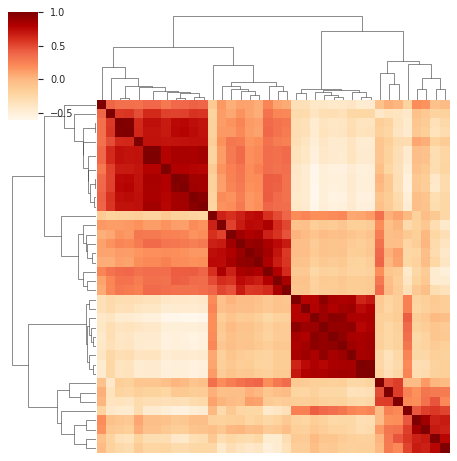

In [ ]:
pPlot = sns.clustermap(corMap, cmap= 'OrRd', figsize=[7.5,7.5], )
#plt.xticks(ticks=None, labels=None)
pPlot.ax_heatmap.set_axis_off()

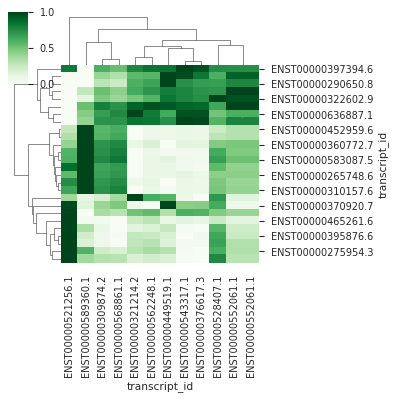

In [ ]:
sns.clustermap(newPairs, cmap='Greens', figsize=[5,5], standard_scale=0)

In [ ]:
corMap.to_csv('fullPairs.tsv', sep='\t', index=None)
newPairs.to_csv('extracttedPairs.tsv', sep='\t', index_label='transcript_id')

In [ ]:
newPairs.head()

transcript_id,ENST00000449519.1,ENST00000543317.1,ENST00000589360.1,ENST00000552061.1,ENST00000528407.1,ENST00000376617.3,ENST00000521256.1,ENST00000552061.1,ENST00000309874.2,ENST00000568861.1,ENST00000321214.2,ENST00000562248.1
transcript_id,,,,,,,,,,,,
ENST00000254821.10,0.196709,0.194354,0.099428,0.187891,0.158326,0.179637,0.100128,0.187891,0.138011,0.130475,0.153204,0.154928
ENST00000370920.7,-0.128822,-0.178762,-0.204164,-0.211836,-0.162138,-0.177827,-0.130127,-0.211836,-0.182195,-0.175597,-0.211204,-0.217275
ENST00000253693.6,0.316038,0.307118,0.172406,0.367106,0.287653,0.293065,0.101757,0.367106,0.240883,0.216181,0.267284,0.290370
ENST00000463417.5,0.166840,0.122324,0.127059,0.129039,0.177622,0.116010,0.149691,0.129039,0.133012,0.148038,0.204202,0.169919
ENST00000322602.9,0.264593,0.249564,0.081252,0.296012,0.308447,0.239284,0.046751,0.296012,0.169718,0.149350,0.174578,0.198685


In [ ]:
plotts = pd.read_csv("extracttedPaired.tsv", sep='\t', index_col='transcript_id',)

In [ ]:
plotts.head()

,ENST00000449519.1,ENST00000543317.1,ENST00000589360.1,ENST00000552061.1,ENST00000528407.1,ENST00000376617.3,ENST00000521256.1,ENST00000552061.1.1,ENST00000309874.2,ENST00000568861.1,ENST00000321214.2,ENST00000562248.1,cell type
transcript_id,,,,,,,,,,,,,
ENST00000254821.10,0.196709,0.194354,0.099428,0.187891,0.158326,0.179637,0.100128,0.187891,0.138011,0.130475,0.153204,0.154928,granule cell
ENST00000370920.7,-0.128822,-0.178762,-0.204164,-0.211836,-0.162138,-0.177827,-0.130127,-0.211836,-0.182195,-0.175597,-0.211204,-0.217275,granule cell
ENST00000253693.6,0.316038,0.307118,0.172406,0.367106,0.287653,0.293065,0.101757,0.367106,0.240883,0.216181,0.267284,0.290370,granule cell
ENST00000463417.5,0.166840,0.122324,0.127059,0.129039,0.177622,0.116010,0.149691,0.129039,0.133012,0.148038,0.204202,0.169919,granule cell
ENST00000322602.9,0.264593,0.249564,0.081252,0.296012,0.308447,0.239284,0.046751,0.296012,0.169718,0.149350,0.174578,0.198685,granule cell


In [ ]:
cerebellum_cell_type = plotts.pop('cell type')


In [ ]:
from matplotlib.patches import Patch

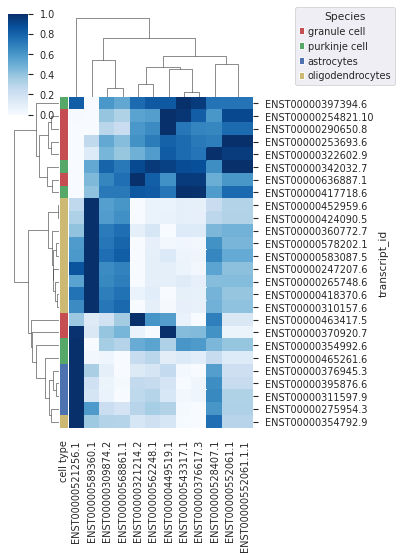

In [ ]:
lut = dict(zip(cerebellum_cell_type.unique(), "rgby"))
row_colors = cerebellum_cell_type.map(lut)
g = sns.clustermap(plotts, row_colors=row_colors, cmap='Blues', figsize=[5,7], standard_scale=0)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Species',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.savefig('finalplot.png', dpi=300)

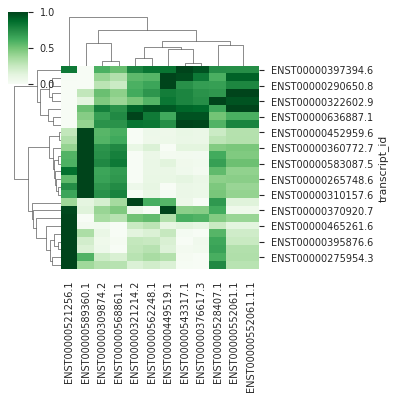

In [ ]:
sns.clustermap(plotts, cmap='Greens', figsize=[5,5], standard_scale=0)

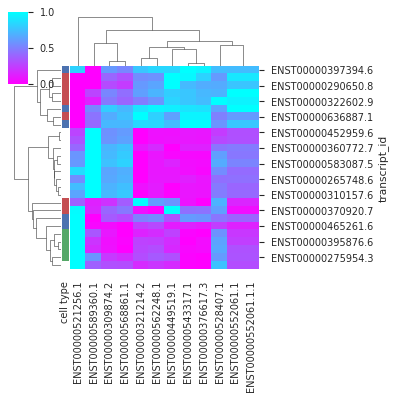

In [ ]:
g = sns.clustermap(plotts, row_colors=row_colors, cmap='cool_r', figsize=[5,5], standard_scale=0)

In [ ]:
lut

{'astrocytes': 'b', 'granule cell': 'r', 'purkinje cell': 'g'}